In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import censusgeocode as cg
#import plotly
import plotly.express as px

import re
plt.rcParams['figure.figsize']=12,10


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10000)

In [3]:
data = pd.read_csv('SFSU customers.csv')
data

id             street_1 street_2            city state    zip  \
0       fe-100001       4601 North AVE      NaN      Sacramento    CA  95821   
1       fe-100004     63 N Pagosa Blvd      NaN  Pagosa Springs    CO  81147   
2       fe-100007       9297 S Judd LN      NaN     West Jordan    UT  84088   
3       fe-100007       9297 S Judd LN      NaN     West Jordan    UT  84088   
4       fe-100007       9297 S Judd LN      NaN     West Jordan    UT  84088   
...           ...                  ...      ...             ...   ...    ...   
236698    wc-9979  1041 Clearspring Dr      NaN      Charleston    SC  29412   
236699   wc-99802                  NaN      NaN             NaN    NC  28433   
236700   wc-99962                  NaN      NaN             NaN    CO  80224   
236701   wc-99980                  NaN      NaN             NaN   NaN  86001   
236702   wc-99993                  NaN      NaN             NaN   NaN  84739   

              country Sub_PublicationName  Detail_Paid Order_Date Sub_SubType  \
0       United States     HighCountryNews        69.00    9/14/21           R   
1       United States        ResearchFund       475.00    7/11/02           R   
2       United States     HighCountryNews        37.00     5/1/18           R   
3       United States        ResearchFund         3.00    3/23/17           R   
4       United States    WebAccessDigital        21.95    11/9/15           G   
...               ...                 ...          ...        ...         ...   
236698            NaN                 NaN          NaN        NaN         NaN   
236699            NaN                 NaN          NaN        NaN         NaN   
236700            NaN                 NaN          NaN        NaN         NaN   
236701            NaN                 NaN          NaN        NaN         NaN   
236702            NaN                 NaN          NaN        NaN         NaN   

       Sub_SubStatus  Sub_NumberOfRenewals  
0                  A                  19.0  
1                  E                   0.0  
2                  E                   9.0  
3                  E                   0.0  
4                  E                   2.0  
...              ...                   ...  
236698           NaN                   NaN  
236699           NaN                   NaN  
236700           NaN                   NaN  
236701           NaN                   NaN  
236702           NaN                   NaN  

[236703 rows x 13 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236703 entries, 0 to 236702
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    236703 non-null  object 
 1   street_1              222643 non-null  object 
 2   street_2              3515 non-null    object 
 3   city                  218915 non-null  object 
 4   state                 219484 non-null  object 
 5   zip                   236701 non-null  object 
 6   country               218918 non-null  object 
 7   Sub_PublicationName   214640 non-null  object 
 8   Detail_Paid           213941 non-null  float64
 9   Order_Date            214640 non-null  object 
 10  Sub_SubType           214640 non-null  object 
 11  Sub_SubStatus         214638 non-null  object 
 12  Sub_NumberOfRenewals  214640 non-null  float64
dtypes: float64(2), object(11)
memory usage: 23.5+ MB


In [5]:
# Finding null values in existing data
((data.isna().sum())/236703)*100

id                       0.000000
street_1                 5.939933
street_2                98.515017
city                     7.514903
state                    7.274517
zip                      0.000845
country                  7.513635
Sub_PublicationName      9.320963
Detail_Paid              9.616270
Order_Date               9.320963
Sub_SubType              9.320963
Sub_SubStatus            9.321808
Sub_NumberOfRenewals     9.320963
dtype: float64

In [6]:
# clean Zip code column
# convert to int type and fill null values as 0

data.zip =pd.to_numeric(data.zip, errors ='coerce').fillna(0).astype('int')
data['zip'] = data['zip'].astype(int)

data.head()

id          street_1 street_2            city state    zip  \
0  fe-100001    4601 North AVE      NaN      Sacramento    CA  95821   
1  fe-100004  63 N Pagosa Blvd      NaN  Pagosa Springs    CO  81147   
2  fe-100007    9297 S Judd LN      NaN     West Jordan    UT  84088   
3  fe-100007    9297 S Judd LN      NaN     West Jordan    UT  84088   
4  fe-100007    9297 S Judd LN      NaN     West Jordan    UT  84088   

         country Sub_PublicationName  Detail_Paid Order_Date Sub_SubType  \
0  United States     HighCountryNews        69.00    9/14/21           R   
1  United States        ResearchFund       475.00    7/11/02           R   
2  United States     HighCountryNews        37.00     5/1/18           R   
3  United States        ResearchFund         3.00    3/23/17           R   
4  United States    WebAccessDigital        21.95    11/9/15           G   

  Sub_SubStatus  Sub_NumberOfRenewals  
0             A                  19.0  
1             E                   0.0  
2             E                   9.0  
3             E                   0.0  
4             E                   2.0

In [7]:

#to add leading zeros to zip codes which are less than 5 in length. #Zip codes in US ranges from 00501 to 99,950 
#Example zip code 1246 would be turned to 01246. 

data['zip'] = data['zip'].apply(lambda x: '{0:0>5}'.format(x))

In [8]:
#zip code with 00000 is the one with nan values initally. 
data['zip'].value_counts()

00000    14602
59715     1426
81301     1407
80521     1331
80304     1053
         ...  
43054        1
46361        1
68714        1
33327        1
61084        1
Name: zip, Length: 15566, dtype: int64

In [9]:
data.country.unique()

array(['United States', 'Canada', 'New Zealand', 'United Kingdom',
       'Switzerland', 'Norway', 'Australia', 'France', 'Singapore',
       'Japan', 'Finland', 'Portugal', 'Ireland', 'Italy', 'Germany',
       'India', 'Belgium', 'Morocco', 'Bangladesh', 'Thailand', 'Austria',
       'South Africa', 'Netherlands', 'Kenya', 'Brazil', 'Sweden',
       'Sri Lanka', 'Iceland', 'Ghana', 'Pakistan', 'Chile', 'US', nan,
       'USA', 'GB'], dtype=object)

In [10]:
## since we only need to focus on US lets filter data based only on country
options =["US","USA","United States"]
US_data = data[data['country'].isin(options)]

In [21]:
for i, rows in US_data.iterrows():
    try:
        ifor_val = US_data.iloc[i]['zip']
        if re.match(r"^\d{9}$", ifor_val):
            zipc = ifor_val[:5]
            plus4 = ifor_val[5:]
            strings = [zipc,plus4]
            ifor_val = '-'.join(strings)
        elif re.match(r"^\d{5}-$", ifor_val):
            zipc = ifor_val[:5]
            ifor_val = zipc
        elif re.match(r"^\d{5}-\d{4}$", ifor_val):
            ifor_val = US_data.iloc[i]['zip']  
        elif re.match(r"^\d{5}$", ifor_val):
            ifor_val = US_data.iloc[i]['zip']
        else:
            ifor_val = 'invalid'
        US_data.at[i,'zip'] = ifor_val
    except:
        print("Exception at index: %s : %s;  %s",(i, US_data.iloc[i], repr(e)))

IndexError: single positional indexer is out-of-bounds

In [22]:
US_data[US_data['country'] == "US"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 217865 to 236690
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    872 non-null    object 
 1   street_1              508 non-null    object 
 2   street_2              20 non-null     object 
 3   city                  865 non-null    object 
 4   state                 714 non-null    object 
 5   zip                   872 non-null    object 
 6   country               872 non-null    object 
 7   Sub_PublicationName   0 non-null      object 
 8   Detail_Paid           0 non-null      float64
 9   Order_Date            0 non-null      object 
 10  Sub_SubType           0 non-null      object 
 11  Sub_SubStatus         0 non-null      object 
 12  Sub_NumberOfRenewals  0 non-null      float64
dtypes: float64(2), object(11)
memory usage: 95.4+ KB


In [24]:
US_data[US_data['country'] == "USA"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 218529 to 236540
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    180 non-null    object 
 1   street_1              134 non-null    object 
 2   street_2              3 non-null      object 
 3   city                  134 non-null    object 
 4   state                 142 non-null    object 
 5   zip                   180 non-null    object 
 6   country               180 non-null    object 
 7   Sub_PublicationName   0 non-null      object 
 8   Detail_Paid           0 non-null      float64
 9   Order_Date            0 non-null      object 
 10  Sub_SubType           0 non-null      object 
 11  Sub_SubStatus         0 non-null      object 
 12  Sub_NumberOfRenewals  0 non-null      float64
dtypes: float64(2), object(11)
memory usage: 19.7+ KB


##### It is observed that for country "US" & "USA" we have null values for Sub_PublicationName, Detail_Paid, Order_Date, Sub_SubType, Sub_SubStatus & Sub_NumberOfRenewals, hence we plan to remove those rows 

In [25]:
US_data.drop(US_data[US_data['country'].isin(['US','USA'])].index, inplace =True)

In [26]:
US_data.dropna(subset = ['Sub_PublicationName'], inplace = True)

In [27]:
US_data

id              street_1 street_2            city state    zip  \
0       fe-100001        4601 North AVE      NaN      Sacramento    CA  95821   
1       fe-100004      63 N Pagosa Blvd      NaN  Pagosa Springs    CO  81147   
2       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
3       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
4       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
...           ...                   ...      ...             ...   ...    ...   
217860    fe-9998        2071 ALBION ST      NaN          Denver    CO  80309   
217861   fe-99990      4470 Ridgeway DR      NaN      Los Alamos    NM  99522   
217862   fe-99990      4470 Ridgeway DR      NaN      Los Alamos    NM  88003   
217863   fe-99993  1258 E ROOSEVELT AVE      NaN  Salt Lake City    UT  87047   
217864   fe-99996       6 BLACKSMITH RD      NaN          Milton    MA  83611   

              country Sub_PublicationName  Detail_Paid Order_Date Sub_SubType  \
0       United States     HighCountryNews        69.00    9/14/21           R   
1       United States        ResearchFund       475.00    7/11/02           R   
2       United States     HighCountryNews        37.00     5/1/18           R   
3       United States        ResearchFund         3.00    3/23/17           R   
4       United States    WebAccessDigital        21.95    11/9/15           G   
...               ...                 ...          ...        ...         ...   
217860  United States        ResearchFund        55.00    11/6/07           R   
217861  United States     HighCountryNews        37.00    8/25/21           R   
217862  United States        ResearchFund        63.00    7/16/15           R   
217863  United States        ResearchFund        50.00     1/6/03           R   
217864  United States     HighCountryNews        66.00   11/28/06           R   

       Sub_SubStatus  Sub_NumberOfRenewals  
0                  A                  19.0  
1                  E                   0.0  
2                  E                   9.0  
3                  E                   0.0  
4                  E                   2.0  
...              ...                   ...  
217860             E                  15.0  
217861             A                  16.0  
217862             E                   5.0  
217863             E                   0.0  
217864             E                   3.0  

[214135 rows x 13 columns]

In [28]:
#Let's check how many are from US so we can manually fill zipcodes 

US_nan_zip = US_data[(US_data.zip == '00000')]
print("Rows with Nan zip codes in US {}".format(US_nan_zip.shape))
#There are 13302 rows with nan zip codes in US 

#Confirm how many unique customers are those 
print("Number of unique customers from US {}".format(US_nan_zip['id'].nunique()))
#11405 unique customers. 

Rows with Nan zip codes in US (13255, 13)
Number of unique customers from US 11853


<AxesSubplot:xlabel='Sub_PublicationName', ylabel='count'>

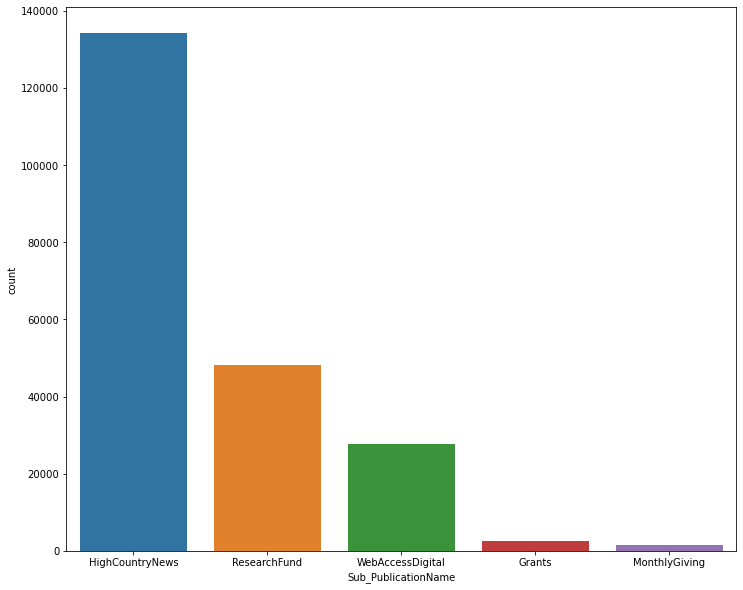

In [29]:
sns.countplot(US_data['Sub_PublicationName'])

In [30]:
US_data[US_data['country'] == "United States"].zip.value_counts()

00000    13255
59715     1316
81301     1289
80521     1273
80304     1001
         ...  
91507        1
99158        1
94927        1
03782        1
30331        1
Name: zip, Length: 13737, dtype: int64

In [ ]:
#US_data = pd.get_dummies(US_data, columns = ['Sub_PublicationName'])

In [31]:
US_data

id              street_1 street_2            city state    zip  \
0       fe-100001        4601 North AVE      NaN      Sacramento    CA  95821   
1       fe-100004      63 N Pagosa Blvd      NaN  Pagosa Springs    CO  81147   
2       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
3       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
4       fe-100007        9297 S Judd LN      NaN     West Jordan    UT  84088   
...           ...                   ...      ...             ...   ...    ...   
217860    fe-9998        2071 ALBION ST      NaN          Denver    CO  80309   
217861   fe-99990      4470 Ridgeway DR      NaN      Los Alamos    NM  99522   
217862   fe-99990      4470 Ridgeway DR      NaN      Los Alamos    NM  88003   
217863   fe-99993  1258 E ROOSEVELT AVE      NaN  Salt Lake City    UT  87047   
217864   fe-99996       6 BLACKSMITH RD      NaN          Milton    MA  83611   

              country Sub_PublicationName  Detail_Paid Order_Date Sub_SubType  \
0       United States     HighCountryNews        69.00    9/14/21           R   
1       United States        ResearchFund       475.00    7/11/02           R   
2       United States     HighCountryNews        37.00     5/1/18           R   
3       United States        ResearchFund         3.00    3/23/17           R   
4       United States    WebAccessDigital        21.95    11/9/15           G   
...               ...                 ...          ...        ...         ...   
217860  United States        ResearchFund        55.00    11/6/07           R   
217861  United States     HighCountryNews        37.00    8/25/21           R   
217862  United States        ResearchFund        63.00    7/16/15           R   
217863  United States        ResearchFund        50.00     1/6/03           R   
217864  United States     HighCountryNews        66.00   11/28/06           R   

       Sub_SubStatus  Sub_NumberOfRenewals  
0                  A                  19.0  
1                  E                   0.0  
2                  E                   9.0  
3                  E                   0.0  
4                  E                   2.0  
...              ...                   ...  
217860             E                  15.0  
217861             A                  16.0  
217862             E                   5.0  
217863             E                   0.0  
217864             E                   3.0  

[214135 rows x 13 columns]

In [32]:
(US_data.groupby(["id","Sub_PublicationName"]).Detail_Paid.sum()).unstack()

Sub_PublicationName  Grants  HighCountryNews  MonthlyGiving  ResearchFund  \
id                                                                          
fe-100001               NaN             69.0            NaN           NaN   
fe-100004               NaN              NaN            NaN         475.0   
fe-100007               NaN             37.0            NaN           3.0   
fe-10001                NaN              NaN            NaN          50.0   
fe-10002                NaN              NaN            NaN         100.0   
...                     ...              ...            ...           ...   
fe-99974                NaN             99.0            NaN         100.0   
fe-9998                 NaN             37.0            NaN          55.0   
fe-99990                NaN             37.0            NaN          63.0   
fe-99993                NaN              NaN            NaN          50.0   
fe-99996                NaN             66.0            NaN           NaN   

Sub_PublicationName  WebAccessDigital  
id                                     
fe-100001                         NaN  
fe-100004                         NaN  
fe-100007                       21.95  
fe-10001                          NaN  
fe-10002                          NaN  
...                               ...  
fe-99974                          NaN  
fe-9998                           NaN  
fe-99990                          NaN  
fe-99993                          NaN  
fe-99996                          NaN  

[161845 rows x 5 columns]

In [33]:
table = pd.pivot_table(US_data,index=['id',], columns= ["Sub_PublicationName"] , aggfunc={'Detail_Paid':sum})

In [ ]:
table

In [34]:
US_data.zip[1]

'81147'

In [35]:
constant = cg.address(street=US_data.street_1[1] , city = US_data.city[1], state = US_data.state[1], zip =US_data.zip[1])

In [36]:
constant

[{'tigerLine': {'side': 'R', 'tigerLineId': '650551793'},
  'geographies': {'States': [{'STATENS': '01779779',
     'GEOID': '08',
     'CENTLAT': '+38.9976179',
     'AREAWATER': 1185761089,
     'STATE': '08',
     'BASENAME': 'Colorado',
     'STUSAB': 'CO',
     'OID': '2749086215995',
     'LSADC': '00',
     'FUNCSTAT': 'A',
     'INTPTLAT': '+38.9937669',
     'DIVISION': '8',
     'NAME': 'Colorado',
     'REGION': '4',
     'OBJECTID': 27,
     'CENTLON': '-105.5478280',
     'AREALAND': 268418753784,
     'INTPTLON': '-105.5087122',
     'MTFCC': 'G4000'}],
   'County Subdivisions': [{'COUSUB': '92812',
     'GEOID': '0800792812',
     'CENTLAT': '+37.1798004',
     'AREAWATER': 2632303,
     'STATE': '08',
     'BASENAME': 'Pagosa Springs',
     'OID': '276901334572677',
     'LSADC': '22',
     'FUNCSTAT': 'S',
     'INTPTLAT': '+37.1776436',
     'NAME': 'Pagosa Springs CCD',
     'OBJECTID': 25536,
     'CENTLON': '-106.8880296',
     'COUSUBCC': 'Z5',
     'AREALAND': 22

In [37]:
tract=constant[0]['geographies']['2020 Census Blocks'][0].get('TRACT')
geoid=constant[0]['geographies']['2020 Census Blocks'][0].get('GEOID')
block=constant[0]['geographies']['2020 Census Blocks'][0].get('BLOCK')
blkgrp=constant[0]['geographies']['2020 Census Blocks'][0].get('BLKGRP')
latitude= constant[0]['geographies']['2020 Census Blocks'][0].get('CENTLAT')
longitude= constant[0]['geographies']['2020 Census Blocks'][0].get('CENTLON')

In [38]:
#['TRACT','GEOID','BLOCK','BLKGRP','CENTLAT','CENTLON']
print(tract,geoid, block, blkgrp, latitude, longitude)

974202 080079742022022 2022 2 +37.2547398 -107.0777459


In [39]:
from uszipcode import SearchEngine

In [40]:
sr = SearchEngine()
z = sr.by_zipcode(US_data.zip[1])

In [42]:
print(z)

SimpleZipcode(zipcode='81147', zipcode_type='STANDARD', major_city='Pagosa Springs', post_office_city='Pagosa Springs, CO', common_city_list=['Pagosa Springs', 'Chimney Rock', 'Pagosa Spgs'], county='Archuleta County', state='CO', lat=37.24, lng=-107.03, timezone='America/Denver', radius_in_miles=35.0, area_code_list='970', population=11446, population_density=8.0, land_area_in_sqmi=1349.41, water_area_in_sqmi=6.64, housing_units=8323, occupied_housing_units=4971, median_home_value=282500, median_household_income=49176, bounds_west=-107.4822, bounds_east=-106.648303, bounds_north=37.774128, bounds_south=36.999999)


In [41]:
Colorado = US_data[US_data['state'] =="CO"]

In [43]:
Colorado.shape

(53333, 13)

In [44]:
Colorado = Colorado.reset_index()  # make sure indexes pair with number of rows

In [45]:
Colorado["tract"]= 0
Colorado["geoid"] = 0
Colorado["block"] = 0
Colorado["blkgrp"] =0
Colorado["latitude"] =0
Colorado["longitude"] =0

In [53]:
Colorado

index         id                  street_1 street_2            city  \
0           1  fe-100004          63 N Pagosa Blvd      NaN  Pagosa Springs   
1           5   fe-10001             905 S Gaylord      NaN          Denver   
2           6   fe-10002                PO Box 128      NaN     Woody Creek   
3           7   fe-10003        10500 Wildlife Way      NaN       Littleton   
4           8   fe-10003        10500 Wildlife Way      NaN       Littleton   
...       ...        ...                       ...      ...             ...   
53328  217851    fe-9995  1700 Lincoln ST STE 4100      NaN          Denver   
53329  217855    fe-9997             PO Box 173364      NaN          Denver   
53330  217856    fe-9997             PO Box 173364      NaN          Denver   
53331  217859    fe-9998            2071 ALBION ST      NaN          Denver   
53332  217860    fe-9998            2071 ALBION ST      NaN          Denver   

      state    zip        country Sub_PublicationName  Detail_Paid Order_Date  \
0        CO  81147  United States        ResearchFund        475.0    7/11/02   
1        CO  00000  United States        ResearchFund         50.0    5/17/93   
2        CO  81656  United States        ResearchFund        100.0    4/22/93   
3        CO  80125  United States     HighCountryNews          0.0    5/18/22   
4        CO  80125  United States        ResearchFund          NaN    12/1/22   
...     ...    ...            ...                 ...          ...        ...   
53328    CO  89503  United States     HighCountryNews         37.0     2/6/18   
53329    CO  97227  United States     HighCountryNews         78.0    4/28/05   
53330    CO  84512  United States        ResearchFund         50.0     5/5/06   
53331    CO  94952  United States     HighCountryNews         37.0     5/4/07   
53332    CO  80309  United States        ResearchFund         55.0    11/6/07   

      Sub_SubType Sub_SubStatus  Sub_NumberOfRenewals  tract  geoid  block  \
0               R             E                   0.0      0      0      0   
1               R             E                   1.0      0      0      0   
2               R             E                   0.0      0      0      0   
3               C             A                  17.0      0      0      0   
4               R             E                  25.0      0      0      0   
...           ...           ...                   ...    ...    ...    ...   
53328           L             R                  30.0      0      0      0   
53329           R             E                   9.0      0      0      0   
53330           R             E                   1.0      0      0      0   
53331           R             E                  16.0      0      0      0   
53332           R             E                  15.0      0      0      0   

       blkgrp  latitude  longitude  
0           0         0          0  
1           0         0          0  
2           0         0          0  
3           0         0          0  
4           0         0          0  
...       ...       ...        ...  
53328       0         0          0  
53329       0         0          0  
53330       0         0          0  
53331       0         0          0  
53332       0         0          0  

[53333 rows x 20 columns]

In [54]:
Colorado.drop(columns ='index')

id                  street_1 street_2            city state  \
0      fe-100004          63 N Pagosa Blvd      NaN  Pagosa Springs    CO   
1       fe-10001             905 S Gaylord      NaN          Denver    CO   
2       fe-10002                PO Box 128      NaN     Woody Creek    CO   
3       fe-10003        10500 Wildlife Way      NaN       Littleton    CO   
4       fe-10003        10500 Wildlife Way      NaN       Littleton    CO   
...          ...                       ...      ...             ...   ...   
53328    fe-9995  1700 Lincoln ST STE 4100      NaN          Denver    CO   
53329    fe-9997             PO Box 173364      NaN          Denver    CO   
53330    fe-9997             PO Box 173364      NaN          Denver    CO   
53331    fe-9998            2071 ALBION ST      NaN          Denver    CO   
53332    fe-9998            2071 ALBION ST      NaN          Denver    CO   

         zip        country Sub_PublicationName  Detail_Paid Order_Date  \
0      81147  United States        ResearchFund        475.0    7/11/02   
1      00000  United States        ResearchFund         50.0    5/17/93   
2      81656  United States        ResearchFund        100.0    4/22/93   
3      80125  United States     HighCountryNews          0.0    5/18/22   
4      80125  United States        ResearchFund          NaN    12/1/22   
...      ...            ...                 ...          ...        ...   
53328  89503  United States     HighCountryNews         37.0     2/6/18   
53329  97227  United States     HighCountryNews         78.0    4/28/05   
53330  84512  United States        ResearchFund         50.0     5/5/06   
53331  94952  United States     HighCountryNews         37.0     5/4/07   
53332  80309  United States        ResearchFund         55.0    11/6/07   

      Sub_SubType Sub_SubStatus  Sub_NumberOfRenewals  tract  geoid  block  \
0               R             E                   0.0      0      0      0   
1               R             E                   1.0      0      0      0   
2               R             E                   0.0      0      0      0   
3               C             A                  17.0      0      0      0   
4               R             E                  25.0      0      0      0   
...           ...           ...                   ...    ...    ...    ...   
53328           L             R                  30.0      0      0      0   
53329           R             E                   9.0      0      0      0   
53330           R             E                   1.0      0      0      0   
53331           R             E                  16.0      0      0      0   
53332           R             E                  15.0      0      0      0   

       blkgrp  latitude  longitude  
0           0         0          0  
1           0         0          0  
2           0         0          0  
3           0         0          0  
4           0         0          0  
...       ...       ...        ...  
53328       0         0          0  
53329       0         0          0  
53330       0         0          0  
53331       0         0          0  
53332       0         0          0  

[53333 rows x 19 columns]

In [55]:
for i, rows  in Colorado.iterrows():
    try:
        constant = cg.address(street=Colorado.street_1[i] , city = Colorado.city[i], state = Colorado.state[i], zip =Colorado.zip[i])
    except Exception as e:
        print("Exception at index: %s : %s;  %s",(i, Colorado.iloc[i], repr(e)))
    try:
        Colorado["tract"].iloc[i]=constant[0]['geographies']['2020 Census Blocks'][0].get('TRACT')
    except:
        print("Exception in tract: %s"%i)
    try:
        Colorado["geoid"].iloc[i]=constant[0]['geographies']['2020 Census Blocks'][0].get('GEOID')
    except:
        print("Exception in geoid: %s"%i)
    try:
        Colorado["block"].iloc[i]=constant[0]['geographies']['2020 Census Blocks'][0].get('BLOCK')
    except:
        print("Exception in block: %s"%i)
    try:
        Colorado["blkgrp"].iloc[i]=constant[0]['geographies']['2020 Census Blocks'][0].get('BLKGRP')
    except:
        print("Exception in blkgrp: %s"%i)
    try:
        Colorado["latitude"].iloc[i]= constant[0]['geographies']['2020 Census Blocks'][0].get('CENTLAT')
    except:
        print("Exception in latitude: %s"%i)
    try:
        Colorado["longitude"].iloc[i]= constant[0]['geographies']['2020 Census Blocks'][0].get('CENTLON')
    except:
        print("Exception in longitude: %s"%i)

Exception in tract: 1
Exception in geoid: 1
Exception in block: 1
Exception in blkgrp: 1
Exception in latitude: 1
Exception in longitude: 1
Exception in tract: 2
Exception in geoid: 2
Exception in block: 2
Exception in blkgrp: 2
Exception in latitude: 2
Exception in longitude: 2
Exception in tract: 3
Exception in geoid: 3
Exception in block: 3
Exception in blkgrp: 3
Exception in latitude: 3
Exception in longitude: 3
Exception in tract: 4
Exception in geoid: 4
Exception in block: 4
Exception in blkgrp: 4
Exception in latitude: 4
Exception in longitude: 4
Exception in tract: 9
Exception in geoid: 9
Exception in block: 9
Exception in blkgrp: 9
Exception in latitude: 9
Exception in longitude: 9
Exception in tract: 10
Exception in geoid: 10
Exception in block: 10
Exception in blkgrp: 10
Exception in latitude: 10
Exception in longitude: 10
Exception in tract: 11
Exception in geoid: 11
Exception in block: 11
Exception in blkgrp: 11
Exception in latitude: 11
Exception in longitude: 11
Exceptio

Exception in tract: 261
Exception in geoid: 261
Exception in block: 261
Exception in blkgrp: 261
Exception in latitude: 261
Exception in longitude: 261
Exception in tract: 262
Exception in geoid: 262
Exception in block: 262
Exception in blkgrp: 262
Exception in latitude: 262
Exception in longitude: 262
Exception in tract: 263
Exception in geoid: 263
Exception in block: 263
Exception in blkgrp: 263
Exception in latitude: 263
Exception in longitude: 263
Exception in tract: 268
Exception in geoid: 268
Exception in block: 268
Exception in blkgrp: 268
Exception in latitude: 268
Exception in longitude: 268
Exception in tract: 269
Exception in geoid: 269
Exception in block: 269
Exception in blkgrp: 269
Exception in latitude: 269
Exception in longitude: 269
Exception in tract: 274
Exception in geoid: 274
Exception in block: 274
Exception in blkgrp: 274
Exception in latitude: 274
Exception in longitude: 274
Exception in tract: 280
Exception in geoid: 280
Exception in block: 280
Exception in blk

Exception in tract: 456
Exception in geoid: 456
Exception in block: 456
Exception in blkgrp: 456
Exception in latitude: 456
Exception in longitude: 456
Exception in tract: 461
Exception in geoid: 461
Exception in block: 461
Exception in blkgrp: 461
Exception in latitude: 461
Exception in longitude: 461
Exception in tract: 462
Exception in geoid: 462
Exception in block: 462
Exception in blkgrp: 462
Exception in latitude: 462
Exception in longitude: 462
Exception in tract: 475
Exception in geoid: 475
Exception in block: 475
Exception in blkgrp: 475
Exception in latitude: 475
Exception in longitude: 475
Exception in tract: 476
Exception in geoid: 476
Exception in block: 476
Exception in blkgrp: 476
Exception in latitude: 476
Exception in longitude: 476
Exception in tract: 483
Exception in geoid: 483
Exception in block: 483
Exception in blkgrp: 483
Exception in latitude: 483
Exception in longitude: 483
Exception in tract: 488
Exception in geoid: 488
Exception in block: 488
Exception in blk

Exception in tract: 770
Exception in geoid: 770
Exception in block: 770
Exception in blkgrp: 770
Exception in latitude: 770
Exception in longitude: 770
Exception in tract: 771
Exception in geoid: 771
Exception in block: 771
Exception in blkgrp: 771
Exception in latitude: 771
Exception in longitude: 771
Exception in tract: 772
Exception in geoid: 772
Exception in block: 772
Exception in blkgrp: 772
Exception in latitude: 772
Exception in longitude: 772
Exception in tract: 774
Exception in geoid: 774
Exception in block: 774
Exception in blkgrp: 774
Exception in latitude: 774
Exception in longitude: 774
Exception in tract: 775
Exception in geoid: 775
Exception in block: 775
Exception in blkgrp: 775
Exception in latitude: 775
Exception in longitude: 775
Exception in tract: 786
Exception in geoid: 786
Exception in block: 786
Exception in blkgrp: 786
Exception in latitude: 786
Exception in longitude: 786
Exception in tract: 787
Exception in geoid: 787
Exception in block: 787
Exception in blk

Exception in tract: 914
Exception in geoid: 914
Exception in block: 914
Exception in blkgrp: 914
Exception in latitude: 914
Exception in longitude: 914
Exception in tract: 915
Exception in geoid: 915
Exception in block: 915
Exception in blkgrp: 915
Exception in latitude: 915
Exception in longitude: 915
Exception in tract: 918
Exception in geoid: 918
Exception in block: 918
Exception in blkgrp: 918
Exception in latitude: 918
Exception in longitude: 918
Exception in tract: 919
Exception in geoid: 919
Exception in block: 919
Exception in blkgrp: 919
Exception in latitude: 919
Exception in longitude: 919
Exception in tract: 924
Exception in geoid: 924
Exception in block: 924
Exception in blkgrp: 924
Exception in latitude: 924
Exception in longitude: 924
Exception in tract: 925
Exception in geoid: 925
Exception in block: 925
Exception in blkgrp: 925
Exception in latitude: 925
Exception in longitude: 925
Exception in tract: 926
Exception in geoid: 926
Exception in block: 926
Exception in blk

Exception in tract: 1043
Exception in geoid: 1043
Exception in block: 1043
Exception in blkgrp: 1043
Exception in latitude: 1043
Exception in longitude: 1043
Exception in tract: 1044
Exception in geoid: 1044
Exception in block: 1044
Exception in blkgrp: 1044
Exception in latitude: 1044
Exception in longitude: 1044
Exception in tract: 1048
Exception in geoid: 1048
Exception in block: 1048
Exception in blkgrp: 1048
Exception in latitude: 1048
Exception in longitude: 1048
Exception in tract: 1058
Exception in geoid: 1058
Exception in block: 1058
Exception in blkgrp: 1058
Exception in latitude: 1058
Exception in longitude: 1058
Exception in tract: 1059
Exception in geoid: 1059
Exception in block: 1059
Exception in blkgrp: 1059
Exception in latitude: 1059
Exception in longitude: 1059
Exception in tract: 1069
Exception in geoid: 1069
Exception in block: 1069
Exception in blkgrp: 1069
Exception in latitude: 1069
Exception in longitude: 1069
Exception in tract: 1076
Exception in geoid: 1076
Ex

Exception in tract: 1236
Exception in geoid: 1236
Exception in block: 1236
Exception in blkgrp: 1236
Exception in latitude: 1236
Exception in longitude: 1236
Exception in tract: 1242
Exception in geoid: 1242
Exception in block: 1242
Exception in blkgrp: 1242
Exception in latitude: 1242
Exception in longitude: 1242
Exception in tract: 1246
Exception in geoid: 1246
Exception in block: 1246
Exception in blkgrp: 1246
Exception in latitude: 1246
Exception in longitude: 1246
Exception in tract: 1276
Exception in geoid: 1276
Exception in block: 1276
Exception in blkgrp: 1276
Exception in latitude: 1276
Exception in longitude: 1276
Exception in tract: 1277
Exception in geoid: 1277
Exception in block: 1277
Exception in blkgrp: 1277
Exception in latitude: 1277
Exception in longitude: 1277
Exception in tract: 1278
Exception in geoid: 1278
Exception in block: 1278
Exception in blkgrp: 1278
Exception in latitude: 1278
Exception in longitude: 1278
Exception in tract: 1283
Exception in geoid: 1283
Ex

Exception in tract: 1449
Exception in geoid: 1449
Exception in block: 1449
Exception in blkgrp: 1449
Exception in latitude: 1449
Exception in longitude: 1449
Exception in tract: 1452
Exception in geoid: 1452
Exception in block: 1452
Exception in blkgrp: 1452
Exception in latitude: 1452
Exception in longitude: 1452
Exception in tract: 1453
Exception in geoid: 1453
Exception in block: 1453
Exception in blkgrp: 1453
Exception in latitude: 1453
Exception in longitude: 1453
Exception in tract: 1454
Exception in geoid: 1454
Exception in block: 1454
Exception in blkgrp: 1454
Exception in latitude: 1454
Exception in longitude: 1454
Exception in tract: 1457
Exception in geoid: 1457
Exception in block: 1457
Exception in blkgrp: 1457
Exception in latitude: 1457
Exception in longitude: 1457
Exception in tract: 1458
Exception in geoid: 1458
Exception in block: 1458
Exception in blkgrp: 1458
Exception in latitude: 1458
Exception in longitude: 1458
Exception in tract: 1459
Exception in geoid: 1459
Ex

Exception in tract: 1581
Exception in geoid: 1581
Exception in block: 1581
Exception in blkgrp: 1581
Exception in latitude: 1581
Exception in longitude: 1581
Exception in tract: 1595
Exception in geoid: 1595
Exception in block: 1595
Exception in blkgrp: 1595
Exception in latitude: 1595
Exception in longitude: 1595
Exception in tract: 1596
Exception in geoid: 1596
Exception in block: 1596
Exception in blkgrp: 1596
Exception in latitude: 1596
Exception in longitude: 1596
Exception in tract: 1597
Exception in geoid: 1597
Exception in block: 1597
Exception in blkgrp: 1597
Exception in latitude: 1597
Exception in longitude: 1597
Exception in tract: 1598
Exception in geoid: 1598
Exception in block: 1598
Exception in blkgrp: 1598
Exception in latitude: 1598
Exception in longitude: 1598
Exception in tract: 1601
Exception in geoid: 1601
Exception in block: 1601
Exception in blkgrp: 1601
Exception in latitude: 1601
Exception in longitude: 1601
Exception in tract: 1606
Exception in geoid: 1606
Ex

Exception in tract: 1756
Exception in geoid: 1756
Exception in block: 1756
Exception in blkgrp: 1756
Exception in latitude: 1756
Exception in longitude: 1756
Exception in tract: 1758
Exception in geoid: 1758
Exception in block: 1758
Exception in blkgrp: 1758
Exception in latitude: 1758
Exception in longitude: 1758
Exception in tract: 1770
Exception in geoid: 1770
Exception in block: 1770
Exception in blkgrp: 1770
Exception in latitude: 1770
Exception in longitude: 1770
Exception in tract: 1771
Exception in geoid: 1771
Exception in block: 1771
Exception in blkgrp: 1771
Exception in latitude: 1771
Exception in longitude: 1771
Exception in tract: 1772
Exception in geoid: 1772
Exception in block: 1772
Exception in blkgrp: 1772
Exception in latitude: 1772
Exception in longitude: 1772
Exception in tract: 1777
Exception in geoid: 1777
Exception in block: 1777
Exception in blkgrp: 1777
Exception in latitude: 1777
Exception in longitude: 1777
Exception in tract: 1778
Exception in geoid: 1778
Ex

Exception in tract: 1874
Exception in geoid: 1874
Exception in block: 1874
Exception in blkgrp: 1874
Exception in latitude: 1874
Exception in longitude: 1874
Exception in tract: 1879
Exception in geoid: 1879
Exception in block: 1879
Exception in blkgrp: 1879
Exception in latitude: 1879
Exception in longitude: 1879
Exception in tract: 1883
Exception in geoid: 1883
Exception in block: 1883
Exception in blkgrp: 1883
Exception in latitude: 1883
Exception in longitude: 1883
Exception in tract: 1884
Exception in geoid: 1884
Exception in block: 1884
Exception in blkgrp: 1884
Exception in latitude: 1884
Exception in longitude: 1884
Exception in tract: 1885
Exception in geoid: 1885
Exception in block: 1885
Exception in blkgrp: 1885
Exception in latitude: 1885
Exception in longitude: 1885
Exception in tract: 1886
Exception in geoid: 1886
Exception in block: 1886
Exception in blkgrp: 1886
Exception in latitude: 1886
Exception in longitude: 1886
Exception in tract: 1887
Exception in geoid: 1887
Ex

Exception in tract: 2012
Exception in geoid: 2012
Exception in block: 2012
Exception in blkgrp: 2012
Exception in latitude: 2012
Exception in longitude: 2012
Exception in tract: 2014
Exception in geoid: 2014
Exception in block: 2014
Exception in blkgrp: 2014
Exception in latitude: 2014
Exception in longitude: 2014
Exception in tract: 2015
Exception in geoid: 2015
Exception in block: 2015
Exception in blkgrp: 2015
Exception in latitude: 2015
Exception in longitude: 2015
Exception in tract: 2016
Exception in geoid: 2016
Exception in block: 2016
Exception in blkgrp: 2016
Exception in latitude: 2016
Exception in longitude: 2016
Exception in tract: 2019
Exception in geoid: 2019
Exception in block: 2019
Exception in blkgrp: 2019
Exception in latitude: 2019
Exception in longitude: 2019
Exception in tract: 2020
Exception in geoid: 2020
Exception in block: 2020
Exception in blkgrp: 2020
Exception in latitude: 2020
Exception in longitude: 2020
Exception in tract: 2035
Exception in geoid: 2035
Ex

Exception in tract: 2127
Exception in geoid: 2127
Exception in block: 2127
Exception in blkgrp: 2127
Exception in latitude: 2127
Exception in longitude: 2127
Exception in tract: 2128
Exception in geoid: 2128
Exception in block: 2128
Exception in blkgrp: 2128
Exception in latitude: 2128
Exception in longitude: 2128
Exception in tract: 2129
Exception in geoid: 2129
Exception in block: 2129
Exception in blkgrp: 2129
Exception in latitude: 2129
Exception in longitude: 2129
Exception in tract: 2131
Exception in geoid: 2131
Exception in block: 2131
Exception in blkgrp: 2131
Exception in latitude: 2131
Exception in longitude: 2131
Exception in tract: 2132
Exception in geoid: 2132
Exception in block: 2132
Exception in blkgrp: 2132
Exception in latitude: 2132
Exception in longitude: 2132
Exception in tract: 2133
Exception in geoid: 2133
Exception in block: 2133
Exception in blkgrp: 2133
Exception in latitude: 2133
Exception in longitude: 2133
Exception in tract: 2134
Exception in geoid: 2134
Ex

Exception in tract: 2237
Exception in geoid: 2237
Exception in block: 2237
Exception in blkgrp: 2237
Exception in latitude: 2237
Exception in longitude: 2237
Exception in tract: 2238
Exception in geoid: 2238
Exception in block: 2238
Exception in blkgrp: 2238
Exception in latitude: 2238
Exception in longitude: 2238
Exception in tract: 2239
Exception in geoid: 2239
Exception in block: 2239
Exception in blkgrp: 2239
Exception in latitude: 2239
Exception in longitude: 2239
Exception in tract: 2245
Exception in geoid: 2245
Exception in block: 2245
Exception in blkgrp: 2245
Exception in latitude: 2245
Exception in longitude: 2245
Exception in tract: 2254
Exception in geoid: 2254
Exception in block: 2254
Exception in blkgrp: 2254
Exception in latitude: 2254
Exception in longitude: 2254
Exception in tract: 2270
Exception in geoid: 2270
Exception in block: 2270
Exception in blkgrp: 2270
Exception in latitude: 2270
Exception in longitude: 2270
Exception in tract: 2271
Exception in geoid: 2271
Ex

Exception in tract: 2433
Exception in geoid: 2433
Exception in block: 2433
Exception in blkgrp: 2433
Exception in latitude: 2433
Exception in longitude: 2433
Exception in tract: 2437
Exception in geoid: 2437
Exception in block: 2437
Exception in blkgrp: 2437
Exception in latitude: 2437
Exception in longitude: 2437
Exception in tract: 2438
Exception in geoid: 2438
Exception in block: 2438
Exception in blkgrp: 2438
Exception in latitude: 2438
Exception in longitude: 2438
Exception in tract: 2439
Exception in geoid: 2439
Exception in block: 2439
Exception in blkgrp: 2439
Exception in latitude: 2439
Exception in longitude: 2439
Exception in tract: 2443
Exception in geoid: 2443
Exception in block: 2443
Exception in blkgrp: 2443
Exception in latitude: 2443
Exception in longitude: 2443
Exception in tract: 2444
Exception in geoid: 2444
Exception in block: 2444
Exception in blkgrp: 2444
Exception in latitude: 2444
Exception in longitude: 2444
Exception in tract: 2450
Exception in geoid: 2450
Ex

Exception in tract: 2616
Exception in geoid: 2616
Exception in block: 2616
Exception in blkgrp: 2616
Exception in latitude: 2616
Exception in longitude: 2616
Exception in tract: 2623
Exception in geoid: 2623
Exception in block: 2623
Exception in blkgrp: 2623
Exception in latitude: 2623
Exception in longitude: 2623
Exception in tract: 2636
Exception in geoid: 2636
Exception in block: 2636
Exception in blkgrp: 2636
Exception in latitude: 2636
Exception in longitude: 2636
Exception in tract: 2637
Exception in geoid: 2637
Exception in block: 2637
Exception in blkgrp: 2637
Exception in latitude: 2637
Exception in longitude: 2637
Exception in tract: 2640
Exception in geoid: 2640
Exception in block: 2640
Exception in blkgrp: 2640
Exception in latitude: 2640
Exception in longitude: 2640
Exception in tract: 2643
Exception in geoid: 2643
Exception in block: 2643
Exception in blkgrp: 2643
Exception in latitude: 2643
Exception in longitude: 2643
Exception in tract: 2644
Exception in geoid: 2644
Ex

Exception in tract: 2773
Exception in geoid: 2773
Exception in block: 2773
Exception in blkgrp: 2773
Exception in latitude: 2773
Exception in longitude: 2773
Exception in tract: 2774
Exception in geoid: 2774
Exception in block: 2774
Exception in blkgrp: 2774
Exception in latitude: 2774
Exception in longitude: 2774
Exception in tract: 2775
Exception in geoid: 2775
Exception in block: 2775
Exception in blkgrp: 2775
Exception in latitude: 2775
Exception in longitude: 2775
Exception in tract: 2784
Exception in geoid: 2784
Exception in block: 2784
Exception in blkgrp: 2784
Exception in latitude: 2784
Exception in longitude: 2784
Exception in tract: 2789
Exception in geoid: 2789
Exception in block: 2789
Exception in blkgrp: 2789
Exception in latitude: 2789
Exception in longitude: 2789
Exception in tract: 2798
Exception in geoid: 2798
Exception in block: 2798
Exception in blkgrp: 2798
Exception in latitude: 2798
Exception in longitude: 2798
Exception in tract: 2799
Exception in geoid: 2799
Ex

Exception in tract: 2952
Exception in geoid: 2952
Exception in block: 2952
Exception in blkgrp: 2952
Exception in latitude: 2952
Exception in longitude: 2952
Exception in tract: 2953
Exception in geoid: 2953
Exception in block: 2953
Exception in blkgrp: 2953
Exception in latitude: 2953
Exception in longitude: 2953
Exception in tract: 2956
Exception in geoid: 2956
Exception in block: 2956
Exception in blkgrp: 2956
Exception in latitude: 2956
Exception in longitude: 2956
Exception in tract: 2957
Exception in geoid: 2957
Exception in block: 2957
Exception in blkgrp: 2957
Exception in latitude: 2957
Exception in longitude: 2957
Exception in tract: 2964
Exception in geoid: 2964
Exception in block: 2964
Exception in blkgrp: 2964
Exception in latitude: 2964
Exception in longitude: 2964
Exception in tract: 2967
Exception in geoid: 2967
Exception in block: 2967
Exception in blkgrp: 2967
Exception in latitude: 2967
Exception in longitude: 2967
Exception in tract: 2970
Exception in geoid: 2970
Ex

Exception in tract: 3081
Exception in geoid: 3081
Exception in block: 3081
Exception in blkgrp: 3081
Exception in latitude: 3081
Exception in longitude: 3081
Exception in tract: 3083
Exception in geoid: 3083
Exception in block: 3083
Exception in blkgrp: 3083
Exception in latitude: 3083
Exception in longitude: 3083
Exception in tract: 3084
Exception in geoid: 3084
Exception in block: 3084
Exception in blkgrp: 3084
Exception in latitude: 3084
Exception in longitude: 3084
Exception in tract: 3093
Exception in geoid: 3093
Exception in block: 3093
Exception in blkgrp: 3093
Exception in latitude: 3093
Exception in longitude: 3093
Exception in tract: 3094
Exception in geoid: 3094
Exception in block: 3094
Exception in blkgrp: 3094
Exception in latitude: 3094
Exception in longitude: 3094
Exception in tract: 3095
Exception in geoid: 3095
Exception in block: 3095
Exception in blkgrp: 3095
Exception in latitude: 3095
Exception in longitude: 3095
Exception in tract: 3097
Exception in geoid: 3097
Ex

Exception in tract: 3240
Exception in geoid: 3240
Exception in block: 3240
Exception in blkgrp: 3240
Exception in latitude: 3240
Exception in longitude: 3240
Exception in tract: 3241
Exception in geoid: 3241
Exception in block: 3241
Exception in blkgrp: 3241
Exception in latitude: 3241
Exception in longitude: 3241
Exception in tract: 3242
Exception in geoid: 3242
Exception in block: 3242
Exception in blkgrp: 3242
Exception in latitude: 3242
Exception in longitude: 3242
Exception in tract: 3245
Exception in geoid: 3245
Exception in block: 3245
Exception in blkgrp: 3245
Exception in latitude: 3245
Exception in longitude: 3245
Exception in tract: 3246
Exception in geoid: 3246
Exception in block: 3246
Exception in blkgrp: 3246
Exception in latitude: 3246
Exception in longitude: 3246
Exception in tract: 3247
Exception in geoid: 3247
Exception in block: 3247
Exception in blkgrp: 3247
Exception in latitude: 3247
Exception in longitude: 3247
Exception in tract: 3252
Exception in geoid: 3252
Ex

Exception in tract: 3398
Exception in geoid: 3398
Exception in block: 3398
Exception in blkgrp: 3398
Exception in latitude: 3398
Exception in longitude: 3398
Exception in tract: 3405
Exception in geoid: 3405
Exception in block: 3405
Exception in blkgrp: 3405
Exception in latitude: 3405
Exception in longitude: 3405
Exception in tract: 3413
Exception in geoid: 3413
Exception in block: 3413
Exception in blkgrp: 3413
Exception in latitude: 3413
Exception in longitude: 3413
Exception in tract: 3414
Exception in geoid: 3414
Exception in block: 3414
Exception in blkgrp: 3414
Exception in latitude: 3414
Exception in longitude: 3414
Exception in tract: 3417
Exception in geoid: 3417
Exception in block: 3417
Exception in blkgrp: 3417
Exception in latitude: 3417
Exception in longitude: 3417
Exception in tract: 3418
Exception in geoid: 3418
Exception in block: 3418
Exception in blkgrp: 3418
Exception in latitude: 3418
Exception in longitude: 3418
Exception in tract: 3431
Exception in geoid: 3431
Ex

Exception in tract: 3573
Exception in geoid: 3573
Exception in block: 3573
Exception in blkgrp: 3573
Exception in latitude: 3573
Exception in longitude: 3573
Exception in tract: 3574
Exception in geoid: 3574
Exception in block: 3574
Exception in blkgrp: 3574
Exception in latitude: 3574
Exception in longitude: 3574
Exception in tract: 3578
Exception in geoid: 3578
Exception in block: 3578
Exception in blkgrp: 3578
Exception in latitude: 3578
Exception in longitude: 3578
Exception in tract: 3579
Exception in geoid: 3579
Exception in block: 3579
Exception in blkgrp: 3579
Exception in latitude: 3579
Exception in longitude: 3579
Exception in tract: 3582
Exception in geoid: 3582
Exception in block: 3582
Exception in blkgrp: 3582
Exception in latitude: 3582
Exception in longitude: 3582
Exception in tract: 3583
Exception in geoid: 3583
Exception in block: 3583
Exception in blkgrp: 3583
Exception in latitude: 3583
Exception in longitude: 3583
Exception in tract: 3584
Exception in geoid: 3584
Ex

Exception in tract: 3725
Exception in geoid: 3725
Exception in block: 3725
Exception in blkgrp: 3725
Exception in latitude: 3725
Exception in longitude: 3725
Exception in tract: 3726
Exception in geoid: 3726
Exception in block: 3726
Exception in blkgrp: 3726
Exception in latitude: 3726
Exception in longitude: 3726
Exception in tract: 3727
Exception in geoid: 3727
Exception in block: 3727
Exception in blkgrp: 3727
Exception in latitude: 3727
Exception in longitude: 3727
Exception in tract: 3728
Exception in geoid: 3728
Exception in block: 3728
Exception in blkgrp: 3728
Exception in latitude: 3728
Exception in longitude: 3728
Exception in tract: 3729
Exception in geoid: 3729
Exception in block: 3729
Exception in blkgrp: 3729
Exception in latitude: 3729
Exception in longitude: 3729
Exception in tract: 3738
Exception in geoid: 3738
Exception in block: 3738
Exception in blkgrp: 3738
Exception in latitude: 3738
Exception in longitude: 3738
Exception in tract: 3740
Exception in geoid: 3740
Ex

Exception in tract: 3964
Exception in geoid: 3964
Exception in block: 3964
Exception in blkgrp: 3964
Exception in latitude: 3964
Exception in longitude: 3964
Exception in tract: 3969
Exception in geoid: 3969
Exception in block: 3969
Exception in blkgrp: 3969
Exception in latitude: 3969
Exception in longitude: 3969
Exception in tract: 3973
Exception in geoid: 3973
Exception in block: 3973
Exception in blkgrp: 3973
Exception in latitude: 3973
Exception in longitude: 3973
Exception in tract: 3974
Exception in geoid: 3974
Exception in block: 3974
Exception in blkgrp: 3974
Exception in latitude: 3974
Exception in longitude: 3974
Exception in tract: 3975
Exception in geoid: 3975
Exception in block: 3975
Exception in blkgrp: 3975
Exception in latitude: 3975
Exception in longitude: 3975
Exception in tract: 3988
Exception in geoid: 3988
Exception in block: 3988
Exception in blkgrp: 3988
Exception in latitude: 3988
Exception in longitude: 3988
Exception in tract: 3989
Exception in geoid: 3989
Ex

Exception in tract: 4135
Exception in geoid: 4135
Exception in block: 4135
Exception in blkgrp: 4135
Exception in latitude: 4135
Exception in longitude: 4135
Exception in tract: 4149
Exception in geoid: 4149
Exception in block: 4149
Exception in blkgrp: 4149
Exception in latitude: 4149
Exception in longitude: 4149
Exception in tract: 4150
Exception in geoid: 4150
Exception in block: 4150
Exception in blkgrp: 4150
Exception in latitude: 4150
Exception in longitude: 4150
Exception in tract: 4151
Exception in geoid: 4151
Exception in block: 4151
Exception in blkgrp: 4151
Exception in latitude: 4151
Exception in longitude: 4151
Exception in tract: 4152
Exception in geoid: 4152
Exception in block: 4152
Exception in blkgrp: 4152
Exception in latitude: 4152
Exception in longitude: 4152
Exception in tract: 4154
Exception in geoid: 4154
Exception in block: 4154
Exception in blkgrp: 4154
Exception in latitude: 4154
Exception in longitude: 4154
Exception in tract: 4159
Exception in geoid: 4159
Ex

Exception in tract: 4300
Exception in geoid: 4300
Exception in block: 4300
Exception in blkgrp: 4300
Exception in latitude: 4300
Exception in longitude: 4300
Exception in tract: 4303
Exception in geoid: 4303
Exception in block: 4303
Exception in blkgrp: 4303
Exception in latitude: 4303
Exception in longitude: 4303
Exception in tract: 4304
Exception in geoid: 4304
Exception in block: 4304
Exception in blkgrp: 4304
Exception in latitude: 4304
Exception in longitude: 4304
Exception in tract: 4305
Exception in geoid: 4305
Exception in block: 4305
Exception in blkgrp: 4305
Exception in latitude: 4305
Exception in longitude: 4305
Exception in tract: 4306
Exception in geoid: 4306
Exception in block: 4306
Exception in blkgrp: 4306
Exception in latitude: 4306
Exception in longitude: 4306
Exception in tract: 4309
Exception in geoid: 4309
Exception in block: 4309
Exception in blkgrp: 4309
Exception in latitude: 4309
Exception in longitude: 4309
Exception in tract: 4310
Exception in geoid: 4310
Ex

Exception in tract: 4448
Exception in geoid: 4448
Exception in block: 4448
Exception in blkgrp: 4448
Exception in latitude: 4448
Exception in longitude: 4448
Exception in tract: 4449
Exception in geoid: 4449
Exception in block: 4449
Exception in blkgrp: 4449
Exception in latitude: 4449
Exception in longitude: 4449
Exception in tract: 4453
Exception in geoid: 4453
Exception in block: 4453
Exception in blkgrp: 4453
Exception in latitude: 4453
Exception in longitude: 4453
Exception in tract: 4456
Exception in geoid: 4456
Exception in block: 4456
Exception in blkgrp: 4456
Exception in latitude: 4456
Exception in longitude: 4456
Exception in tract: 4457
Exception in geoid: 4457
Exception in block: 4457
Exception in blkgrp: 4457
Exception in latitude: 4457
Exception in longitude: 4457
Exception in tract: 4458
Exception in geoid: 4458
Exception in block: 4458
Exception in blkgrp: 4458
Exception in latitude: 4458
Exception in longitude: 4458
Exception in tract: 4466
Exception in geoid: 4466
Ex

Exception in tract: 4624
Exception in geoid: 4624
Exception in block: 4624
Exception in blkgrp: 4624
Exception in latitude: 4624
Exception in longitude: 4624
Exception in tract: 4625
Exception in geoid: 4625
Exception in block: 4625
Exception in blkgrp: 4625
Exception in latitude: 4625
Exception in longitude: 4625
Exception in tract: 4626
Exception in geoid: 4626
Exception in block: 4626
Exception in blkgrp: 4626
Exception in latitude: 4626
Exception in longitude: 4626
Exception in tract: 4632
Exception in geoid: 4632
Exception in block: 4632
Exception in blkgrp: 4632
Exception in latitude: 4632
Exception in longitude: 4632
Exception in tract: 4633
Exception in geoid: 4633
Exception in block: 4633
Exception in blkgrp: 4633
Exception in latitude: 4633
Exception in longitude: 4633
Exception in tract: 4634
Exception in geoid: 4634
Exception in block: 4634
Exception in blkgrp: 4634
Exception in latitude: 4634
Exception in longitude: 4634
Exception in tract: 4635
Exception in geoid: 4635
Ex

Exception in tract: 4803
Exception in geoid: 4803
Exception in block: 4803
Exception in blkgrp: 4803
Exception in latitude: 4803
Exception in longitude: 4803
Exception in tract: 4804
Exception in geoid: 4804
Exception in block: 4804
Exception in blkgrp: 4804
Exception in latitude: 4804
Exception in longitude: 4804
Exception in tract: 4805
Exception in geoid: 4805
Exception in block: 4805
Exception in blkgrp: 4805
Exception in latitude: 4805
Exception in longitude: 4805
Exception in tract: 4806
Exception in geoid: 4806
Exception in block: 4806
Exception in blkgrp: 4806
Exception in latitude: 4806
Exception in longitude: 4806
Exception in tract: 4807
Exception in geoid: 4807
Exception in block: 4807
Exception in blkgrp: 4807
Exception in latitude: 4807
Exception in longitude: 4807
Exception in tract: 4816
Exception in geoid: 4816
Exception in block: 4816
Exception in blkgrp: 4816
Exception in latitude: 4816
Exception in longitude: 4816
Exception in tract: 4822
Exception in geoid: 4822
Ex

Exception in tract: 4990
Exception in geoid: 4990
Exception in block: 4990
Exception in blkgrp: 4990
Exception in latitude: 4990
Exception in longitude: 4990
Exception in tract: 4992
Exception in geoid: 4992
Exception in block: 4992
Exception in blkgrp: 4992
Exception in latitude: 4992
Exception in longitude: 4992
Exception in tract: 4997
Exception in geoid: 4997
Exception in block: 4997
Exception in blkgrp: 4997
Exception in latitude: 4997
Exception in longitude: 4997
Exception in tract: 5000
Exception in geoid: 5000
Exception in block: 5000
Exception in blkgrp: 5000
Exception in latitude: 5000
Exception in longitude: 5000
Exception in tract: 5015
Exception in geoid: 5015
Exception in block: 5015
Exception in blkgrp: 5015
Exception in latitude: 5015
Exception in longitude: 5015
Exception in tract: 5016
Exception in geoid: 5016
Exception in block: 5016
Exception in blkgrp: 5016
Exception in latitude: 5016
Exception in longitude: 5016
Exception in tract: 5024
Exception in geoid: 5024
Ex

Exception in tract: 5133
Exception in geoid: 5133
Exception in block: 5133
Exception in blkgrp: 5133
Exception in latitude: 5133
Exception in longitude: 5133
Exception in tract: 5136
Exception in geoid: 5136
Exception in block: 5136
Exception in blkgrp: 5136
Exception in latitude: 5136
Exception in longitude: 5136
Exception in tract: 5139
Exception in geoid: 5139
Exception in block: 5139
Exception in blkgrp: 5139
Exception in latitude: 5139
Exception in longitude: 5139
Exception in tract: 5140
Exception in geoid: 5140
Exception in block: 5140
Exception in blkgrp: 5140
Exception in latitude: 5140
Exception in longitude: 5140
Exception in tract: 5146
Exception in geoid: 5146
Exception in block: 5146
Exception in blkgrp: 5146
Exception in latitude: 5146
Exception in longitude: 5146
Exception in tract: 5147
Exception in geoid: 5147
Exception in block: 5147
Exception in blkgrp: 5147
Exception in latitude: 5147
Exception in longitude: 5147
Exception in tract: 5148
Exception in geoid: 5148
Ex

Exception in tract: 5336
Exception in geoid: 5336
Exception in block: 5336
Exception in blkgrp: 5336
Exception in latitude: 5336
Exception in longitude: 5336
Exception in tract: 5337
Exception in geoid: 5337
Exception in block: 5337
Exception in blkgrp: 5337
Exception in latitude: 5337
Exception in longitude: 5337
Exception in tract: 5343
Exception in geoid: 5343
Exception in block: 5343
Exception in blkgrp: 5343
Exception in latitude: 5343
Exception in longitude: 5343
Exception in tract: 5344
Exception in geoid: 5344
Exception in block: 5344
Exception in blkgrp: 5344
Exception in latitude: 5344
Exception in longitude: 5344
Exception in tract: 5349
Exception in geoid: 5349
Exception in block: 5349
Exception in blkgrp: 5349
Exception in latitude: 5349
Exception in longitude: 5349
Exception in tract: 5356
Exception in geoid: 5356
Exception in block: 5356
Exception in blkgrp: 5356
Exception in latitude: 5356
Exception in longitude: 5356
Exception in tract: 5357
Exception in geoid: 5357
Ex

Exception in tract: 5505
Exception in geoid: 5505
Exception in block: 5505
Exception in blkgrp: 5505
Exception in latitude: 5505
Exception in longitude: 5505
Exception in tract: 5506
Exception in geoid: 5506
Exception in block: 5506
Exception in blkgrp: 5506
Exception in latitude: 5506
Exception in longitude: 5506
Exception in tract: 5507
Exception in geoid: 5507
Exception in block: 5507
Exception in blkgrp: 5507
Exception in latitude: 5507
Exception in longitude: 5507
Exception in tract: 5508
Exception in geoid: 5508
Exception in block: 5508
Exception in blkgrp: 5508
Exception in latitude: 5508
Exception in longitude: 5508
Exception in tract: 5521
Exception in geoid: 5521
Exception in block: 5521
Exception in blkgrp: 5521
Exception in latitude: 5521
Exception in longitude: 5521
Exception in tract: 5523
Exception in geoid: 5523
Exception in block: 5523
Exception in blkgrp: 5523
Exception in latitude: 5523
Exception in longitude: 5523
Exception in tract: 5524
Exception in geoid: 5524
Ex

Exception in tract: 5646
Exception in geoid: 5646
Exception in block: 5646
Exception in blkgrp: 5646
Exception in latitude: 5646
Exception in longitude: 5646
Exception in tract: 5647
Exception in geoid: 5647
Exception in block: 5647
Exception in blkgrp: 5647
Exception in latitude: 5647
Exception in longitude: 5647
Exception in tract: 5648
Exception in geoid: 5648
Exception in block: 5648
Exception in blkgrp: 5648
Exception in latitude: 5648
Exception in longitude: 5648
Exception in tract: 5655
Exception in geoid: 5655
Exception in block: 5655
Exception in blkgrp: 5655
Exception in latitude: 5655
Exception in longitude: 5655
Exception in tract: 5656
Exception in geoid: 5656
Exception in block: 5656
Exception in blkgrp: 5656
Exception in latitude: 5656
Exception in longitude: 5656
Exception in tract: 5661
Exception in geoid: 5661
Exception in block: 5661
Exception in blkgrp: 5661
Exception in latitude: 5661
Exception in longitude: 5661
Exception in tract: 5663
Exception in geoid: 5663
Ex

Exception in tract: 5815
Exception in geoid: 5815
Exception in block: 5815
Exception in blkgrp: 5815
Exception in latitude: 5815
Exception in longitude: 5815
Exception in tract: 5816
Exception in geoid: 5816
Exception in block: 5816
Exception in blkgrp: 5816
Exception in latitude: 5816
Exception in longitude: 5816
Exception in tract: 5817
Exception in geoid: 5817
Exception in block: 5817
Exception in blkgrp: 5817
Exception in latitude: 5817
Exception in longitude: 5817
Exception in tract: 5824
Exception in geoid: 5824
Exception in block: 5824
Exception in blkgrp: 5824
Exception in latitude: 5824
Exception in longitude: 5824
Exception in tract: 5825
Exception in geoid: 5825
Exception in block: 5825
Exception in blkgrp: 5825
Exception in latitude: 5825
Exception in longitude: 5825
Exception in tract: 5829
Exception in geoid: 5829
Exception in block: 5829
Exception in blkgrp: 5829
Exception in latitude: 5829
Exception in longitude: 5829
Exception in tract: 5830
Exception in geoid: 5830
Ex

Exception in tract: 5990
Exception in geoid: 5990
Exception in block: 5990
Exception in blkgrp: 5990
Exception in latitude: 5990
Exception in longitude: 5990
Exception in tract: 5992
Exception in geoid: 5992
Exception in block: 5992
Exception in blkgrp: 5992
Exception in latitude: 5992
Exception in longitude: 5992
Exception in tract: 5993
Exception in geoid: 5993
Exception in block: 5993
Exception in blkgrp: 5993
Exception in latitude: 5993
Exception in longitude: 5993
Exception in tract: 5994
Exception in geoid: 5994
Exception in block: 5994
Exception in blkgrp: 5994
Exception in latitude: 5994
Exception in longitude: 5994
Exception in tract: 5995
Exception in geoid: 5995
Exception in block: 5995
Exception in blkgrp: 5995
Exception in latitude: 5995
Exception in longitude: 5995
Exception in tract: 5997
Exception in geoid: 5997
Exception in block: 5997
Exception in blkgrp: 5997
Exception in latitude: 5997
Exception in longitude: 5997
Exception in tract: 6008
Exception in geoid: 6008
Ex

Exception in tract: 6156
Exception in geoid: 6156
Exception in block: 6156
Exception in blkgrp: 6156
Exception in latitude: 6156
Exception in longitude: 6156
Exception in tract: 6157
Exception in geoid: 6157
Exception in block: 6157
Exception in blkgrp: 6157
Exception in latitude: 6157
Exception in longitude: 6157
Exception in tract: 6161
Exception in geoid: 6161
Exception in block: 6161
Exception in blkgrp: 6161
Exception in latitude: 6161
Exception in longitude: 6161
Exception in tract: 6163
Exception in geoid: 6163
Exception in block: 6163
Exception in blkgrp: 6163
Exception in latitude: 6163
Exception in longitude: 6163
Exception in tract: 6164
Exception in geoid: 6164
Exception in block: 6164
Exception in blkgrp: 6164
Exception in latitude: 6164
Exception in longitude: 6164
Exception in tract: 6165
Exception in geoid: 6165
Exception in block: 6165
Exception in blkgrp: 6165
Exception in latitude: 6165
Exception in longitude: 6165
Exception in tract: 6166
Exception in geoid: 6166
Ex

Exception in tract: 6304
Exception in geoid: 6304
Exception in block: 6304
Exception in blkgrp: 6304
Exception in latitude: 6304
Exception in longitude: 6304
Exception in tract: 6313
Exception in geoid: 6313
Exception in block: 6313
Exception in blkgrp: 6313
Exception in latitude: 6313
Exception in longitude: 6313
Exception in tract: 6315
Exception in geoid: 6315
Exception in block: 6315
Exception in blkgrp: 6315
Exception in latitude: 6315
Exception in longitude: 6315
Exception in tract: 6318
Exception in geoid: 6318
Exception in block: 6318
Exception in blkgrp: 6318
Exception in latitude: 6318
Exception in longitude: 6318
Exception in tract: 6323
Exception in geoid: 6323
Exception in block: 6323
Exception in blkgrp: 6323
Exception in latitude: 6323
Exception in longitude: 6323
Exception in tract: 6333
Exception in geoid: 6333
Exception in block: 6333
Exception in blkgrp: 6333
Exception in latitude: 6333
Exception in longitude: 6333
Exception in tract: 6346
Exception in geoid: 6346
Ex

Exception in tract: 6571
Exception in geoid: 6571
Exception in block: 6571
Exception in blkgrp: 6571
Exception in latitude: 6571
Exception in longitude: 6571
Exception in tract: 6573
Exception in geoid: 6573
Exception in block: 6573
Exception in blkgrp: 6573
Exception in latitude: 6573
Exception in longitude: 6573
Exception in tract: 6575
Exception in geoid: 6575
Exception in block: 6575
Exception in blkgrp: 6575
Exception in latitude: 6575
Exception in longitude: 6575
Exception in tract: 6583
Exception in geoid: 6583
Exception in block: 6583
Exception in blkgrp: 6583
Exception in latitude: 6583
Exception in longitude: 6583
Exception in tract: 6587
Exception in geoid: 6587
Exception in block: 6587
Exception in blkgrp: 6587
Exception in latitude: 6587
Exception in longitude: 6587
Exception in tract: 6589
Exception in geoid: 6589
Exception in block: 6589
Exception in blkgrp: 6589
Exception in latitude: 6589
Exception in longitude: 6589
Exception in tract: 6591
Exception in geoid: 6591
Ex

Exception in tract: 6778
Exception in geoid: 6778
Exception in block: 6778
Exception in blkgrp: 6778
Exception in latitude: 6778
Exception in longitude: 6778
Exception in tract: 6780
Exception in geoid: 6780
Exception in block: 6780
Exception in blkgrp: 6780
Exception in latitude: 6780
Exception in longitude: 6780
Exception in tract: 6781
Exception in geoid: 6781
Exception in block: 6781
Exception in blkgrp: 6781
Exception in latitude: 6781
Exception in longitude: 6781
Exception in tract: 6784
Exception in geoid: 6784
Exception in block: 6784
Exception in blkgrp: 6784
Exception in latitude: 6784
Exception in longitude: 6784
Exception in tract: 6788
Exception in geoid: 6788
Exception in block: 6788
Exception in blkgrp: 6788
Exception in latitude: 6788
Exception in longitude: 6788
Exception in tract: 6789
Exception in geoid: 6789
Exception in block: 6789
Exception in blkgrp: 6789
Exception in latitude: 6789
Exception in longitude: 6789
Exception in tract: 6802
Exception in geoid: 6802
Ex

Exception in tract: 6918
Exception in geoid: 6918
Exception in block: 6918
Exception in blkgrp: 6918
Exception in latitude: 6918
Exception in longitude: 6918
Exception in tract: 6920
Exception in geoid: 6920
Exception in block: 6920
Exception in blkgrp: 6920
Exception in latitude: 6920
Exception in longitude: 6920
Exception in tract: 6923
Exception in geoid: 6923
Exception in block: 6923
Exception in blkgrp: 6923
Exception in latitude: 6923
Exception in longitude: 6923
Exception in tract: 6924
Exception in geoid: 6924
Exception in block: 6924
Exception in blkgrp: 6924
Exception in latitude: 6924
Exception in longitude: 6924
Exception in tract: 6925
Exception in geoid: 6925
Exception in block: 6925
Exception in blkgrp: 6925
Exception in latitude: 6925
Exception in longitude: 6925
Exception in tract: 6932
Exception in geoid: 6932
Exception in block: 6932
Exception in blkgrp: 6932
Exception in latitude: 6932
Exception in longitude: 6932
Exception in tract: 6936
Exception in geoid: 6936
Ex

Exception in tract: 7058
Exception in geoid: 7058
Exception in block: 7058
Exception in blkgrp: 7058
Exception in latitude: 7058
Exception in longitude: 7058
Exception in tract: 7059
Exception in geoid: 7059
Exception in block: 7059
Exception in blkgrp: 7059
Exception in latitude: 7059
Exception in longitude: 7059
Exception in tract: 7069
Exception in geoid: 7069
Exception in block: 7069
Exception in blkgrp: 7069
Exception in latitude: 7069
Exception in longitude: 7069
Exception in tract: 7080
Exception in geoid: 7080
Exception in block: 7080
Exception in blkgrp: 7080
Exception in latitude: 7080
Exception in longitude: 7080
Exception in tract: 7081
Exception in geoid: 7081
Exception in block: 7081
Exception in blkgrp: 7081
Exception in latitude: 7081
Exception in longitude: 7081
Exception in tract: 7082
Exception in geoid: 7082
Exception in block: 7082
Exception in blkgrp: 7082
Exception in latitude: 7082
Exception in longitude: 7082
Exception in tract: 7083
Exception in geoid: 7083
Ex

Exception in tract: 7246
Exception in geoid: 7246
Exception in block: 7246
Exception in blkgrp: 7246
Exception in latitude: 7246
Exception in longitude: 7246
Exception in tract: 7258
Exception in geoid: 7258
Exception in block: 7258
Exception in blkgrp: 7258
Exception in latitude: 7258
Exception in longitude: 7258
Exception in tract: 7259
Exception in geoid: 7259
Exception in block: 7259
Exception in blkgrp: 7259
Exception in latitude: 7259
Exception in longitude: 7259
Exception in tract: 7260
Exception in geoid: 7260
Exception in block: 7260
Exception in blkgrp: 7260
Exception in latitude: 7260
Exception in longitude: 7260
Exception in tract: 7261
Exception in geoid: 7261
Exception in block: 7261
Exception in blkgrp: 7261
Exception in latitude: 7261
Exception in longitude: 7261
Exception in tract: 7268
Exception in geoid: 7268
Exception in block: 7268
Exception in blkgrp: 7268
Exception in latitude: 7268
Exception in longitude: 7268
Exception in tract: 7269
Exception in geoid: 7269
Ex

Exception in tract: 7461
Exception in geoid: 7461
Exception in block: 7461
Exception in blkgrp: 7461
Exception in latitude: 7461
Exception in longitude: 7461
Exception in tract: 7462
Exception in geoid: 7462
Exception in block: 7462
Exception in blkgrp: 7462
Exception in latitude: 7462
Exception in longitude: 7462
Exception in tract: 7463
Exception in geoid: 7463
Exception in block: 7463
Exception in blkgrp: 7463
Exception in latitude: 7463
Exception in longitude: 7463
Exception in tract: 7473
Exception in geoid: 7473
Exception in block: 7473
Exception in blkgrp: 7473
Exception in latitude: 7473
Exception in longitude: 7473
Exception in tract: 7474
Exception in geoid: 7474
Exception in block: 7474
Exception in blkgrp: 7474
Exception in latitude: 7474
Exception in longitude: 7474
Exception in tract: 7475
Exception in geoid: 7475
Exception in block: 7475
Exception in blkgrp: 7475
Exception in latitude: 7475
Exception in longitude: 7475
Exception in tract: 7477
Exception in geoid: 7477
Ex

Exception in tract: 7680
Exception in geoid: 7680
Exception in block: 7680
Exception in blkgrp: 7680
Exception in latitude: 7680
Exception in longitude: 7680
Exception in tract: 7682
Exception in geoid: 7682
Exception in block: 7682
Exception in blkgrp: 7682
Exception in latitude: 7682
Exception in longitude: 7682
Exception in tract: 7684
Exception in geoid: 7684
Exception in block: 7684
Exception in blkgrp: 7684
Exception in latitude: 7684
Exception in longitude: 7684
Exception in tract: 7685
Exception in geoid: 7685
Exception in block: 7685
Exception in blkgrp: 7685
Exception in latitude: 7685
Exception in longitude: 7685
Exception in tract: 7686
Exception in geoid: 7686
Exception in block: 7686
Exception in blkgrp: 7686
Exception in latitude: 7686
Exception in longitude: 7686
Exception in tract: 7691
Exception in geoid: 7691
Exception in block: 7691
Exception in blkgrp: 7691
Exception in latitude: 7691
Exception in longitude: 7691
Exception in tract: 7703
Exception in geoid: 7703
Ex

Exception in tract: 7886
Exception in geoid: 7886
Exception in block: 7886
Exception in blkgrp: 7886
Exception in latitude: 7886
Exception in longitude: 7886
Exception in tract: 7888
Exception in geoid: 7888
Exception in block: 7888
Exception in blkgrp: 7888
Exception in latitude: 7888
Exception in longitude: 7888
Exception in tract: 7889
Exception in geoid: 7889
Exception in block: 7889
Exception in blkgrp: 7889
Exception in latitude: 7889
Exception in longitude: 7889
Exception in tract: 7891
Exception in geoid: 7891
Exception in block: 7891
Exception in blkgrp: 7891
Exception in latitude: 7891
Exception in longitude: 7891
Exception in tract: 7892
Exception in geoid: 7892
Exception in block: 7892
Exception in blkgrp: 7892
Exception in latitude: 7892
Exception in longitude: 7892
Exception in tract: 7895
Exception in geoid: 7895
Exception in block: 7895
Exception in blkgrp: 7895
Exception in latitude: 7895
Exception in longitude: 7895
Exception in tract: 7896
Exception in geoid: 7896
Ex

Exception in tract: 8067
Exception in geoid: 8067
Exception in block: 8067
Exception in blkgrp: 8067
Exception in latitude: 8067
Exception in longitude: 8067
Exception in tract: 8068
Exception in geoid: 8068
Exception in block: 8068
Exception in blkgrp: 8068
Exception in latitude: 8068
Exception in longitude: 8068
Exception in tract: 8069
Exception in geoid: 8069
Exception in block: 8069
Exception in blkgrp: 8069
Exception in latitude: 8069
Exception in longitude: 8069
Exception in tract: 8081
Exception in geoid: 8081
Exception in block: 8081
Exception in blkgrp: 8081
Exception in latitude: 8081
Exception in longitude: 8081
Exception in tract: 8082
Exception in geoid: 8082
Exception in block: 8082
Exception in blkgrp: 8082
Exception in latitude: 8082
Exception in longitude: 8082
Exception in tract: 8083
Exception in geoid: 8083
Exception in block: 8083
Exception in blkgrp: 8083
Exception in latitude: 8083
Exception in longitude: 8083
Exception in tract: 8087
Exception in geoid: 8087
Ex

Exception in tract: 8250
Exception in geoid: 8250
Exception in block: 8250
Exception in blkgrp: 8250
Exception in latitude: 8250
Exception in longitude: 8250
Exception in tract: 8255
Exception in geoid: 8255
Exception in block: 8255
Exception in blkgrp: 8255
Exception in latitude: 8255
Exception in longitude: 8255
Exception in tract: 8259
Exception in geoid: 8259
Exception in block: 8259
Exception in blkgrp: 8259
Exception in latitude: 8259
Exception in longitude: 8259
Exception in tract: 8260
Exception in geoid: 8260
Exception in block: 8260
Exception in blkgrp: 8260
Exception in latitude: 8260
Exception in longitude: 8260
Exception in tract: 8261
Exception in geoid: 8261
Exception in block: 8261
Exception in blkgrp: 8261
Exception in latitude: 8261
Exception in longitude: 8261
Exception in tract: 8262
Exception in geoid: 8262
Exception in block: 8262
Exception in blkgrp: 8262
Exception in latitude: 8262
Exception in longitude: 8262
Exception in tract: 8266
Exception in geoid: 8266
Ex

Exception in tract: 8419
Exception in geoid: 8419
Exception in block: 8419
Exception in blkgrp: 8419
Exception in latitude: 8419
Exception in longitude: 8419
Exception in tract: 8425
Exception in geoid: 8425
Exception in block: 8425
Exception in blkgrp: 8425
Exception in latitude: 8425
Exception in longitude: 8425
Exception in tract: 8427
Exception in geoid: 8427
Exception in block: 8427
Exception in blkgrp: 8427
Exception in latitude: 8427
Exception in longitude: 8427
Exception in tract: 8431
Exception in geoid: 8431
Exception in block: 8431
Exception in blkgrp: 8431
Exception in latitude: 8431
Exception in longitude: 8431
Exception in tract: 8432
Exception in geoid: 8432
Exception in block: 8432
Exception in blkgrp: 8432
Exception in latitude: 8432
Exception in longitude: 8432
Exception in tract: 8433
Exception in geoid: 8433
Exception in block: 8433
Exception in blkgrp: 8433
Exception in latitude: 8433
Exception in longitude: 8433
Exception in tract: 8436
Exception in geoid: 8436
Ex

Exception in tract: 8625
Exception in geoid: 8625
Exception in block: 8625
Exception in blkgrp: 8625
Exception in latitude: 8625
Exception in longitude: 8625
Exception in tract: 8626
Exception in geoid: 8626
Exception in block: 8626
Exception in blkgrp: 8626
Exception in latitude: 8626
Exception in longitude: 8626
Exception in tract: 8629
Exception in geoid: 8629
Exception in block: 8629
Exception in blkgrp: 8629
Exception in latitude: 8629
Exception in longitude: 8629
Exception in tract: 8630
Exception in geoid: 8630
Exception in block: 8630
Exception in blkgrp: 8630
Exception in latitude: 8630
Exception in longitude: 8630
Exception in tract: 8642
Exception in geoid: 8642
Exception in block: 8642
Exception in blkgrp: 8642
Exception in latitude: 8642
Exception in longitude: 8642
Exception in tract: 8643
Exception in geoid: 8643
Exception in block: 8643
Exception in blkgrp: 8643
Exception in latitude: 8643
Exception in longitude: 8643
Exception in tract: 8649
Exception in geoid: 8649
Ex

Exception in tract: 8829
Exception in geoid: 8829
Exception in block: 8829
Exception in blkgrp: 8829
Exception in latitude: 8829
Exception in longitude: 8829
Exception in tract: 8830
Exception in geoid: 8830
Exception in block: 8830
Exception in blkgrp: 8830
Exception in latitude: 8830
Exception in longitude: 8830
Exception in tract: 8831
Exception in geoid: 8831
Exception in block: 8831
Exception in blkgrp: 8831
Exception in latitude: 8831
Exception in longitude: 8831
Exception in tract: 8832
Exception in geoid: 8832
Exception in block: 8832
Exception in blkgrp: 8832
Exception in latitude: 8832
Exception in longitude: 8832
Exception in tract: 8833
Exception in geoid: 8833
Exception in block: 8833
Exception in blkgrp: 8833
Exception in latitude: 8833
Exception in longitude: 8833
Exception in tract: 8834
Exception in geoid: 8834
Exception in block: 8834
Exception in blkgrp: 8834
Exception in latitude: 8834
Exception in longitude: 8834
Exception in tract: 8840
Exception in geoid: 8840
Ex

Exception in tract: 9063
Exception in geoid: 9063
Exception in block: 9063
Exception in blkgrp: 9063
Exception in latitude: 9063
Exception in longitude: 9063
Exception in tract: 9064
Exception in geoid: 9064
Exception in block: 9064
Exception in blkgrp: 9064
Exception in latitude: 9064
Exception in longitude: 9064
Exception in tract: 9065
Exception in geoid: 9065
Exception in block: 9065
Exception in blkgrp: 9065
Exception in latitude: 9065
Exception in longitude: 9065
Exception in tract: 9071
Exception in geoid: 9071
Exception in block: 9071
Exception in blkgrp: 9071
Exception in latitude: 9071
Exception in longitude: 9071
Exception in tract: 9072
Exception in geoid: 9072
Exception in block: 9072
Exception in blkgrp: 9072
Exception in latitude: 9072
Exception in longitude: 9072
Exception in tract: 9084
Exception in geoid: 9084
Exception in block: 9084
Exception in blkgrp: 9084
Exception in latitude: 9084
Exception in longitude: 9084
Exception in tract: 9093
Exception in geoid: 9093
Ex

Exception in tract: 9254
Exception in geoid: 9254
Exception in block: 9254
Exception in blkgrp: 9254
Exception in latitude: 9254
Exception in longitude: 9254
Exception in tract: 9255
Exception in geoid: 9255
Exception in block: 9255
Exception in blkgrp: 9255
Exception in latitude: 9255
Exception in longitude: 9255
Exception in tract: 9261
Exception in geoid: 9261
Exception in block: 9261
Exception in blkgrp: 9261
Exception in latitude: 9261
Exception in longitude: 9261
Exception in tract: 9267
Exception in geoid: 9267
Exception in block: 9267
Exception in blkgrp: 9267
Exception in latitude: 9267
Exception in longitude: 9267
Exception in tract: 9270
Exception in geoid: 9270
Exception in block: 9270
Exception in blkgrp: 9270
Exception in latitude: 9270
Exception in longitude: 9270
Exception in tract: 9275
Exception in geoid: 9275
Exception in block: 9275
Exception in blkgrp: 9275
Exception in latitude: 9275
Exception in longitude: 9275
Exception in tract: 9276
Exception in geoid: 9276
Ex

Exception in tract: 9440
Exception in geoid: 9440
Exception in block: 9440
Exception in blkgrp: 9440
Exception in latitude: 9440
Exception in longitude: 9440
Exception in tract: 9456
Exception in geoid: 9456
Exception in block: 9456
Exception in blkgrp: 9456
Exception in latitude: 9456
Exception in longitude: 9456
Exception in tract: 9457
Exception in geoid: 9457
Exception in block: 9457
Exception in blkgrp: 9457
Exception in latitude: 9457
Exception in longitude: 9457
Exception in tract: 9463
Exception in geoid: 9463
Exception in block: 9463
Exception in blkgrp: 9463
Exception in latitude: 9463
Exception in longitude: 9463
Exception in tract: 9464
Exception in geoid: 9464
Exception in block: 9464
Exception in blkgrp: 9464
Exception in latitude: 9464
Exception in longitude: 9464
Exception in tract: 9468
Exception in geoid: 9468
Exception in block: 9468
Exception in blkgrp: 9468
Exception in latitude: 9468
Exception in longitude: 9468
Exception in tract: 9472
Exception in geoid: 9472
Ex

Exception in tract: 9626
Exception in geoid: 9626
Exception in block: 9626
Exception in blkgrp: 9626
Exception in latitude: 9626
Exception in longitude: 9626
Exception in tract: 9631
Exception in geoid: 9631
Exception in block: 9631
Exception in blkgrp: 9631
Exception in latitude: 9631
Exception in longitude: 9631
Exception in tract: 9632
Exception in geoid: 9632
Exception in block: 9632
Exception in blkgrp: 9632
Exception in latitude: 9632
Exception in longitude: 9632
Exception in tract: 9636
Exception in geoid: 9636
Exception in block: 9636
Exception in blkgrp: 9636
Exception in latitude: 9636
Exception in longitude: 9636
Exception in tract: 9637
Exception in geoid: 9637
Exception in block: 9637
Exception in blkgrp: 9637
Exception in latitude: 9637
Exception in longitude: 9637
Exception in tract: 9638
Exception in geoid: 9638
Exception in block: 9638
Exception in blkgrp: 9638
Exception in latitude: 9638
Exception in longitude: 9638
Exception in tract: 9639
Exception in geoid: 9639
Ex

Exception in tract: 9834
Exception in geoid: 9834
Exception in block: 9834
Exception in blkgrp: 9834
Exception in latitude: 9834
Exception in longitude: 9834
Exception in tract: 9839
Exception in geoid: 9839
Exception in block: 9839
Exception in blkgrp: 9839
Exception in latitude: 9839
Exception in longitude: 9839
Exception in tract: 9844
Exception in geoid: 9844
Exception in block: 9844
Exception in blkgrp: 9844
Exception in latitude: 9844
Exception in longitude: 9844
Exception in tract: 9845
Exception in geoid: 9845
Exception in block: 9845
Exception in blkgrp: 9845
Exception in latitude: 9845
Exception in longitude: 9845
Exception in tract: 9847
Exception in geoid: 9847
Exception in block: 9847
Exception in blkgrp: 9847
Exception in latitude: 9847
Exception in longitude: 9847
Exception in tract: 9849
Exception in geoid: 9849
Exception in block: 9849
Exception in blkgrp: 9849
Exception in latitude: 9849
Exception in longitude: 9849
Exception in tract: 9851
Exception in geoid: 9851
Ex

Exception in tract: 10087
Exception in geoid: 10087
Exception in block: 10087
Exception in blkgrp: 10087
Exception in latitude: 10087
Exception in longitude: 10087
Exception in tract: 10101
Exception in geoid: 10101
Exception in block: 10101
Exception in blkgrp: 10101
Exception in latitude: 10101
Exception in longitude: 10101
Exception in tract: 10107
Exception in geoid: 10107
Exception in block: 10107
Exception in blkgrp: 10107
Exception in latitude: 10107
Exception in longitude: 10107
Exception in tract: 10109
Exception in geoid: 10109
Exception in block: 10109
Exception in blkgrp: 10109
Exception in latitude: 10109
Exception in longitude: 10109
Exception in tract: 10110
Exception in geoid: 10110
Exception in block: 10110
Exception in blkgrp: 10110
Exception in latitude: 10110
Exception in longitude: 10110
Exception in tract: 10111
Exception in geoid: 10111
Exception in block: 10111
Exception in blkgrp: 10111
Exception in latitude: 10111
Exception in longitude: 10111
Exception in tra

Exception in tract: 10269
Exception in geoid: 10269
Exception in block: 10269
Exception in blkgrp: 10269
Exception in latitude: 10269
Exception in longitude: 10269
Exception in tract: 10271
Exception in geoid: 10271
Exception in block: 10271
Exception in blkgrp: 10271
Exception in latitude: 10271
Exception in longitude: 10271
Exception in tract: 10280
Exception in geoid: 10280
Exception in block: 10280
Exception in blkgrp: 10280
Exception in latitude: 10280
Exception in longitude: 10280
Exception in tract: 10281
Exception in geoid: 10281
Exception in block: 10281
Exception in blkgrp: 10281
Exception in latitude: 10281
Exception in longitude: 10281
Exception in tract: 10282
Exception in geoid: 10282
Exception in block: 10282
Exception in blkgrp: 10282
Exception in latitude: 10282
Exception in longitude: 10282
Exception in tract: 10286
Exception in geoid: 10286
Exception in block: 10286
Exception in blkgrp: 10286
Exception in latitude: 10286
Exception in longitude: 10286
Exception in tra

Exception in tract: 10461
Exception in geoid: 10461
Exception in block: 10461
Exception in blkgrp: 10461
Exception in latitude: 10461
Exception in longitude: 10461
Exception in tract: 10463
Exception in geoid: 10463
Exception in block: 10463
Exception in blkgrp: 10463
Exception in latitude: 10463
Exception in longitude: 10463
Exception in tract: 10466
Exception in geoid: 10466
Exception in block: 10466
Exception in blkgrp: 10466
Exception in latitude: 10466
Exception in longitude: 10466
Exception in tract: 10467
Exception in geoid: 10467
Exception in block: 10467
Exception in blkgrp: 10467
Exception in latitude: 10467
Exception in longitude: 10467
Exception in tract: 10471
Exception in geoid: 10471
Exception in block: 10471
Exception in blkgrp: 10471
Exception in latitude: 10471
Exception in longitude: 10471
Exception in tract: 10472
Exception in geoid: 10472
Exception in block: 10472
Exception in blkgrp: 10472
Exception in latitude: 10472
Exception in longitude: 10472
Exception in tra

Exception in tract: 10666
Exception in geoid: 10666
Exception in block: 10666
Exception in blkgrp: 10666
Exception in latitude: 10666
Exception in longitude: 10666
Exception in tract: 10670
Exception in geoid: 10670
Exception in block: 10670
Exception in blkgrp: 10670
Exception in latitude: 10670
Exception in longitude: 10670
Exception in tract: 10671
Exception in geoid: 10671
Exception in block: 10671
Exception in blkgrp: 10671
Exception in latitude: 10671
Exception in longitude: 10671
Exception in tract: 10676
Exception in geoid: 10676
Exception in block: 10676
Exception in blkgrp: 10676
Exception in latitude: 10676
Exception in longitude: 10676
Exception in tract: 10677
Exception in geoid: 10677
Exception in block: 10677
Exception in blkgrp: 10677
Exception in latitude: 10677
Exception in longitude: 10677
Exception in tract: 10682
Exception in geoid: 10682
Exception in block: 10682
Exception in blkgrp: 10682
Exception in latitude: 10682
Exception in longitude: 10682
Exception in tra

Exception in tract: 10845
Exception in geoid: 10845
Exception in block: 10845
Exception in blkgrp: 10845
Exception in latitude: 10845
Exception in longitude: 10845
Exception in tract: 10853
Exception in geoid: 10853
Exception in block: 10853
Exception in blkgrp: 10853
Exception in latitude: 10853
Exception in longitude: 10853
Exception in tract: 10854
Exception in geoid: 10854
Exception in block: 10854
Exception in blkgrp: 10854
Exception in latitude: 10854
Exception in longitude: 10854
Exception in tract: 10861
Exception in geoid: 10861
Exception in block: 10861
Exception in blkgrp: 10861
Exception in latitude: 10861
Exception in longitude: 10861
Exception in tract: 10864
Exception in geoid: 10864
Exception in block: 10864
Exception in blkgrp: 10864
Exception in latitude: 10864
Exception in longitude: 10864
Exception in tract: 10865
Exception in geoid: 10865
Exception in block: 10865
Exception in blkgrp: 10865
Exception in latitude: 10865
Exception in longitude: 10865
Exception in tra

Exception in tract: 11044
Exception in geoid: 11044
Exception in block: 11044
Exception in blkgrp: 11044
Exception in latitude: 11044
Exception in longitude: 11044
Exception in tract: 11045
Exception in geoid: 11045
Exception in block: 11045
Exception in blkgrp: 11045
Exception in latitude: 11045
Exception in longitude: 11045
Exception in tract: 11052
Exception in geoid: 11052
Exception in block: 11052
Exception in blkgrp: 11052
Exception in latitude: 11052
Exception in longitude: 11052
Exception in tract: 11053
Exception in geoid: 11053
Exception in block: 11053
Exception in blkgrp: 11053
Exception in latitude: 11053
Exception in longitude: 11053
Exception in tract: 11056
Exception in geoid: 11056
Exception in block: 11056
Exception in blkgrp: 11056
Exception in latitude: 11056
Exception in longitude: 11056
Exception in tract: 11057
Exception in geoid: 11057
Exception in block: 11057
Exception in blkgrp: 11057
Exception in latitude: 11057
Exception in longitude: 11057
Exception in tra

Exception in tract: 11267
Exception in geoid: 11267
Exception in block: 11267
Exception in blkgrp: 11267
Exception in latitude: 11267
Exception in longitude: 11267
Exception in tract: 11278
Exception in geoid: 11278
Exception in block: 11278
Exception in blkgrp: 11278
Exception in latitude: 11278
Exception in longitude: 11278
Exception in tract: 11283
Exception in geoid: 11283
Exception in block: 11283
Exception in blkgrp: 11283
Exception in latitude: 11283
Exception in longitude: 11283
Exception in tract: 11286
Exception in geoid: 11286
Exception in block: 11286
Exception in blkgrp: 11286
Exception in latitude: 11286
Exception in longitude: 11286
Exception in tract: 11288
Exception in geoid: 11288
Exception in block: 11288
Exception in blkgrp: 11288
Exception in latitude: 11288
Exception in longitude: 11288
Exception in tract: 11289
Exception in geoid: 11289
Exception in block: 11289
Exception in blkgrp: 11289
Exception in latitude: 11289
Exception in longitude: 11289
Exception in tra

Exception in tract: 11495
Exception in geoid: 11495
Exception in block: 11495
Exception in blkgrp: 11495
Exception in latitude: 11495
Exception in longitude: 11495
Exception in tract: 11500
Exception in geoid: 11500
Exception in block: 11500
Exception in blkgrp: 11500
Exception in latitude: 11500
Exception in longitude: 11500
Exception in tract: 11501
Exception in geoid: 11501
Exception in block: 11501
Exception in blkgrp: 11501
Exception in latitude: 11501
Exception in longitude: 11501
Exception in tract: 11506
Exception in geoid: 11506
Exception in block: 11506
Exception in blkgrp: 11506
Exception in latitude: 11506
Exception in longitude: 11506
Exception in tract: 11507
Exception in geoid: 11507
Exception in block: 11507
Exception in blkgrp: 11507
Exception in latitude: 11507
Exception in longitude: 11507
Exception in tract: 11508
Exception in geoid: 11508
Exception in block: 11508
Exception in blkgrp: 11508
Exception in latitude: 11508
Exception in longitude: 11508
Exception in tra

Exception in tract: 11628
Exception in geoid: 11628
Exception in block: 11628
Exception in blkgrp: 11628
Exception in latitude: 11628
Exception in longitude: 11628
Exception in tract: 11629
Exception in geoid: 11629
Exception in block: 11629
Exception in blkgrp: 11629
Exception in latitude: 11629
Exception in longitude: 11629
Exception in tract: 11630
Exception in geoid: 11630
Exception in block: 11630
Exception in blkgrp: 11630
Exception in latitude: 11630
Exception in longitude: 11630
Exception in tract: 11631
Exception in geoid: 11631
Exception in block: 11631
Exception in blkgrp: 11631
Exception in latitude: 11631
Exception in longitude: 11631
Exception in tract: 11632
Exception in geoid: 11632
Exception in block: 11632
Exception in blkgrp: 11632
Exception in latitude: 11632
Exception in longitude: 11632
Exception in tract: 11633
Exception in geoid: 11633
Exception in block: 11633
Exception in blkgrp: 11633
Exception in latitude: 11633
Exception in longitude: 11633
Exception in tra

Exception in tract: 11761
Exception in geoid: 11761
Exception in block: 11761
Exception in blkgrp: 11761
Exception in latitude: 11761
Exception in longitude: 11761
Exception in tract: 11764
Exception in geoid: 11764
Exception in block: 11764
Exception in blkgrp: 11764
Exception in latitude: 11764
Exception in longitude: 11764
Exception in tract: 11765
Exception in geoid: 11765
Exception in block: 11765
Exception in blkgrp: 11765
Exception in latitude: 11765
Exception in longitude: 11765
Exception in tract: 11768
Exception in geoid: 11768
Exception in block: 11768
Exception in blkgrp: 11768
Exception in latitude: 11768
Exception in longitude: 11768
Exception in tract: 11770
Exception in geoid: 11770
Exception in block: 11770
Exception in blkgrp: 11770
Exception in latitude: 11770
Exception in longitude: 11770
Exception in tract: 11771
Exception in geoid: 11771
Exception in block: 11771
Exception in blkgrp: 11771
Exception in latitude: 11771
Exception in longitude: 11771
Exception in tra

Exception in tract: 11894
Exception in geoid: 11894
Exception in block: 11894
Exception in blkgrp: 11894
Exception in latitude: 11894
Exception in longitude: 11894
Exception in tract: 11897
Exception in geoid: 11897
Exception in block: 11897
Exception in blkgrp: 11897
Exception in latitude: 11897
Exception in longitude: 11897
Exception in tract: 11903
Exception in geoid: 11903
Exception in block: 11903
Exception in blkgrp: 11903
Exception in latitude: 11903
Exception in longitude: 11903
Exception in tract: 11904
Exception in geoid: 11904
Exception in block: 11904
Exception in blkgrp: 11904
Exception in latitude: 11904
Exception in longitude: 11904
Exception in tract: 11907
Exception in geoid: 11907
Exception in block: 11907
Exception in blkgrp: 11907
Exception in latitude: 11907
Exception in longitude: 11907
Exception in tract: 11913
Exception in geoid: 11913
Exception in block: 11913
Exception in blkgrp: 11913
Exception in latitude: 11913
Exception in longitude: 11913
Exception in tra

Exception in tract: 12026
Exception in geoid: 12026
Exception in block: 12026
Exception in blkgrp: 12026
Exception in latitude: 12026
Exception in longitude: 12026
Exception in tract: 12032
Exception in geoid: 12032
Exception in block: 12032
Exception in blkgrp: 12032
Exception in latitude: 12032
Exception in longitude: 12032
Exception in tract: 12051
Exception in geoid: 12051
Exception in block: 12051
Exception in blkgrp: 12051
Exception in latitude: 12051
Exception in longitude: 12051
Exception in tract: 12058
Exception in geoid: 12058
Exception in block: 12058
Exception in blkgrp: 12058
Exception in latitude: 12058
Exception in longitude: 12058
Exception in tract: 12064
Exception in geoid: 12064
Exception in block: 12064
Exception in blkgrp: 12064
Exception in latitude: 12064
Exception in longitude: 12064
Exception in tract: 12065
Exception in geoid: 12065
Exception in block: 12065
Exception in blkgrp: 12065
Exception in latitude: 12065
Exception in longitude: 12065
Exception in tra

Exception in tract: 12234
Exception in geoid: 12234
Exception in block: 12234
Exception in blkgrp: 12234
Exception in latitude: 12234
Exception in longitude: 12234
Exception in tract: 12240
Exception in geoid: 12240
Exception in block: 12240
Exception in blkgrp: 12240
Exception in latitude: 12240
Exception in longitude: 12240
Exception in tract: 12242
Exception in geoid: 12242
Exception in block: 12242
Exception in blkgrp: 12242
Exception in latitude: 12242
Exception in longitude: 12242
Exception in tract: 12243
Exception in geoid: 12243
Exception in block: 12243
Exception in blkgrp: 12243
Exception in latitude: 12243
Exception in longitude: 12243
Exception in tract: 12245
Exception in geoid: 12245
Exception in block: 12245
Exception in blkgrp: 12245
Exception in latitude: 12245
Exception in longitude: 12245
Exception in tract: 12246
Exception in geoid: 12246
Exception in block: 12246
Exception in blkgrp: 12246
Exception in latitude: 12246
Exception in longitude: 12246
Exception in tra

Exception in tract: 12442
Exception in geoid: 12442
Exception in block: 12442
Exception in blkgrp: 12442
Exception in latitude: 12442
Exception in longitude: 12442
Exception in tract: 12447
Exception in geoid: 12447
Exception in block: 12447
Exception in blkgrp: 12447
Exception in latitude: 12447
Exception in longitude: 12447
Exception in tract: 12456
Exception in geoid: 12456
Exception in block: 12456
Exception in blkgrp: 12456
Exception in latitude: 12456
Exception in longitude: 12456
Exception in tract: 12457
Exception in geoid: 12457
Exception in block: 12457
Exception in blkgrp: 12457
Exception in latitude: 12457
Exception in longitude: 12457
Exception in tract: 12458
Exception in geoid: 12458
Exception in block: 12458
Exception in blkgrp: 12458
Exception in latitude: 12458
Exception in longitude: 12458
Exception in tract: 12459
Exception in geoid: 12459
Exception in block: 12459
Exception in blkgrp: 12459
Exception in latitude: 12459
Exception in longitude: 12459
Exception in tra

Exception in tract: 12640
Exception in geoid: 12640
Exception in block: 12640
Exception in blkgrp: 12640
Exception in latitude: 12640
Exception in longitude: 12640
Exception in tract: 12641
Exception in geoid: 12641
Exception in block: 12641
Exception in blkgrp: 12641
Exception in latitude: 12641
Exception in longitude: 12641
Exception in tract: 12654
Exception in geoid: 12654
Exception in block: 12654
Exception in blkgrp: 12654
Exception in latitude: 12654
Exception in longitude: 12654
Exception in tract: 12656
Exception in geoid: 12656
Exception in block: 12656
Exception in blkgrp: 12656
Exception in latitude: 12656
Exception in longitude: 12656
Exception in tract: 12658
Exception in geoid: 12658
Exception in block: 12658
Exception in blkgrp: 12658
Exception in latitude: 12658
Exception in longitude: 12658
Exception in tract: 12661
Exception in geoid: 12661
Exception in block: 12661
Exception in blkgrp: 12661
Exception in latitude: 12661
Exception in longitude: 12661
Exception in tra

Exception in tract: 12829
Exception in geoid: 12829
Exception in block: 12829
Exception in blkgrp: 12829
Exception in latitude: 12829
Exception in longitude: 12829
Exception in tract: 12836
Exception in geoid: 12836
Exception in block: 12836
Exception in blkgrp: 12836
Exception in latitude: 12836
Exception in longitude: 12836
Exception in tract: 12837
Exception in geoid: 12837
Exception in block: 12837
Exception in blkgrp: 12837
Exception in latitude: 12837
Exception in longitude: 12837
Exception in tract: 12838
Exception in geoid: 12838
Exception in block: 12838
Exception in blkgrp: 12838
Exception in latitude: 12838
Exception in longitude: 12838
Exception in tract: 12839
Exception in geoid: 12839
Exception in block: 12839
Exception in blkgrp: 12839
Exception in latitude: 12839
Exception in longitude: 12839
Exception in tract: 12840
Exception in geoid: 12840
Exception in block: 12840
Exception in blkgrp: 12840
Exception in latitude: 12840
Exception in longitude: 12840
Exception in tra

Exception in tract: 13006
Exception in geoid: 13006
Exception in block: 13006
Exception in blkgrp: 13006
Exception in latitude: 13006
Exception in longitude: 13006
Exception in tract: 13008
Exception in geoid: 13008
Exception in block: 13008
Exception in blkgrp: 13008
Exception in latitude: 13008
Exception in longitude: 13008
Exception in tract: 13009
Exception in geoid: 13009
Exception in block: 13009
Exception in blkgrp: 13009
Exception in latitude: 13009
Exception in longitude: 13009
Exception in tract: 13011
Exception in geoid: 13011
Exception in block: 13011
Exception in blkgrp: 13011
Exception in latitude: 13011
Exception in longitude: 13011
Exception in tract: 13018
Exception in geoid: 13018
Exception in block: 13018
Exception in blkgrp: 13018
Exception in latitude: 13018
Exception in longitude: 13018
Exception in tract: 13036
Exception in geoid: 13036
Exception in block: 13036
Exception in blkgrp: 13036
Exception in latitude: 13036
Exception in longitude: 13036
Exception in tra

Exception in tract: 13238
Exception in geoid: 13238
Exception in block: 13238
Exception in blkgrp: 13238
Exception in latitude: 13238
Exception in longitude: 13238
Exception in tract: 13244
Exception in geoid: 13244
Exception in block: 13244
Exception in blkgrp: 13244
Exception in latitude: 13244
Exception in longitude: 13244
Exception in tract: 13250
Exception in geoid: 13250
Exception in block: 13250
Exception in blkgrp: 13250
Exception in latitude: 13250
Exception in longitude: 13250
Exception in tract: 13252
Exception in geoid: 13252
Exception in block: 13252
Exception in blkgrp: 13252
Exception in latitude: 13252
Exception in longitude: 13252
Exception in tract: 13256
Exception in geoid: 13256
Exception in block: 13256
Exception in blkgrp: 13256
Exception in latitude: 13256
Exception in longitude: 13256
Exception in tract: 13262
Exception in geoid: 13262
Exception in block: 13262
Exception in blkgrp: 13262
Exception in latitude: 13262
Exception in longitude: 13262
Exception in tra

Exception in tract: 13442
Exception in geoid: 13442
Exception in block: 13442
Exception in blkgrp: 13442
Exception in latitude: 13442
Exception in longitude: 13442
Exception in tract: 13447
Exception in geoid: 13447
Exception in block: 13447
Exception in blkgrp: 13447
Exception in latitude: 13447
Exception in longitude: 13447
Exception in tract: 13451
Exception in geoid: 13451
Exception in block: 13451
Exception in blkgrp: 13451
Exception in latitude: 13451
Exception in longitude: 13451
Exception in tract: 13452
Exception in geoid: 13452
Exception in block: 13452
Exception in blkgrp: 13452
Exception in latitude: 13452
Exception in longitude: 13452
Exception in tract: 13453
Exception in geoid: 13453
Exception in block: 13453
Exception in blkgrp: 13453
Exception in latitude: 13453
Exception in longitude: 13453
Exception in tract: 13454
Exception in geoid: 13454
Exception in block: 13454
Exception in blkgrp: 13454
Exception in latitude: 13454
Exception in longitude: 13454
Exception in tra

Exception in tract: 13672
Exception in geoid: 13672
Exception in block: 13672
Exception in blkgrp: 13672
Exception in latitude: 13672
Exception in longitude: 13672
Exception in tract: 13673
Exception in geoid: 13673
Exception in block: 13673
Exception in blkgrp: 13673
Exception in latitude: 13673
Exception in longitude: 13673
Exception in tract: 13686
Exception in geoid: 13686
Exception in block: 13686
Exception in blkgrp: 13686
Exception in latitude: 13686
Exception in longitude: 13686
Exception in tract: 13687
Exception in geoid: 13687
Exception in block: 13687
Exception in blkgrp: 13687
Exception in latitude: 13687
Exception in longitude: 13687
Exception in tract: 13692
Exception in geoid: 13692
Exception in block: 13692
Exception in blkgrp: 13692
Exception in latitude: 13692
Exception in longitude: 13692
Exception in tract: 13700
Exception in geoid: 13700
Exception in block: 13700
Exception in blkgrp: 13700
Exception in latitude: 13700
Exception in longitude: 13700
Exception in tra

Exception in tract: 13885
Exception in geoid: 13885
Exception in block: 13885
Exception in blkgrp: 13885
Exception in latitude: 13885
Exception in longitude: 13885
Exception in tract: 13888
Exception in geoid: 13888
Exception in block: 13888
Exception in blkgrp: 13888
Exception in latitude: 13888
Exception in longitude: 13888
Exception in tract: 13896
Exception in geoid: 13896
Exception in block: 13896
Exception in blkgrp: 13896
Exception in latitude: 13896
Exception in longitude: 13896
Exception in tract: 13897
Exception in geoid: 13897
Exception in block: 13897
Exception in blkgrp: 13897
Exception in latitude: 13897
Exception in longitude: 13897
Exception in tract: 13902
Exception in geoid: 13902
Exception in block: 13902
Exception in blkgrp: 13902
Exception in latitude: 13902
Exception in longitude: 13902
Exception in tract: 13903
Exception in geoid: 13903
Exception in block: 13903
Exception in blkgrp: 13903
Exception in latitude: 13903
Exception in longitude: 13903
Exception in tra

Exception in tract: 14037
Exception in geoid: 14037
Exception in block: 14037
Exception in blkgrp: 14037
Exception in latitude: 14037
Exception in longitude: 14037
Exception in tract: 14038
Exception in geoid: 14038
Exception in block: 14038
Exception in blkgrp: 14038
Exception in latitude: 14038
Exception in longitude: 14038
Exception in tract: 14039
Exception in geoid: 14039
Exception in block: 14039
Exception in blkgrp: 14039
Exception in latitude: 14039
Exception in longitude: 14039
Exception in tract: 14042
Exception in geoid: 14042
Exception in block: 14042
Exception in blkgrp: 14042
Exception in latitude: 14042
Exception in longitude: 14042
Exception in tract: 14043
Exception in geoid: 14043
Exception in block: 14043
Exception in blkgrp: 14043
Exception in latitude: 14043
Exception in longitude: 14043
Exception in tract: 14044
Exception in geoid: 14044
Exception in block: 14044
Exception in blkgrp: 14044
Exception in latitude: 14044
Exception in longitude: 14044
Exception in tra

Exception in tract: 14262
Exception in geoid: 14262
Exception in block: 14262
Exception in blkgrp: 14262
Exception in latitude: 14262
Exception in longitude: 14262
Exception in tract: 14264
Exception in geoid: 14264
Exception in block: 14264
Exception in blkgrp: 14264
Exception in latitude: 14264
Exception in longitude: 14264
Exception in tract: 14265
Exception in geoid: 14265
Exception in block: 14265
Exception in blkgrp: 14265
Exception in latitude: 14265
Exception in longitude: 14265
Exception in tract: 14277
Exception in geoid: 14277
Exception in block: 14277
Exception in blkgrp: 14277
Exception in latitude: 14277
Exception in longitude: 14277
Exception in tract: 14286
Exception in geoid: 14286
Exception in block: 14286
Exception in blkgrp: 14286
Exception in latitude: 14286
Exception in longitude: 14286
Exception in tract: 14288
Exception in geoid: 14288
Exception in block: 14288
Exception in blkgrp: 14288
Exception in latitude: 14288
Exception in longitude: 14288
Exception in tra

Exception in tract: 14491
Exception in geoid: 14491
Exception in block: 14491
Exception in blkgrp: 14491
Exception in latitude: 14491
Exception in longitude: 14491
Exception in tract: 14492
Exception in geoid: 14492
Exception in block: 14492
Exception in blkgrp: 14492
Exception in latitude: 14492
Exception in longitude: 14492
Exception in tract: 14494
Exception in geoid: 14494
Exception in block: 14494
Exception in blkgrp: 14494
Exception in latitude: 14494
Exception in longitude: 14494
Exception in tract: 14495
Exception in geoid: 14495
Exception in block: 14495
Exception in blkgrp: 14495
Exception in latitude: 14495
Exception in longitude: 14495
Exception in tract: 14496
Exception in geoid: 14496
Exception in block: 14496
Exception in blkgrp: 14496
Exception in latitude: 14496
Exception in longitude: 14496
Exception in tract: 14497
Exception in geoid: 14497
Exception in block: 14497
Exception in blkgrp: 14497
Exception in latitude: 14497
Exception in longitude: 14497
Exception in tra

Exception in tract: 14660
Exception in geoid: 14660
Exception in block: 14660
Exception in blkgrp: 14660
Exception in latitude: 14660
Exception in longitude: 14660
Exception in tract: 14661
Exception in geoid: 14661
Exception in block: 14661
Exception in blkgrp: 14661
Exception in latitude: 14661
Exception in longitude: 14661
Exception in tract: 14664
Exception in geoid: 14664
Exception in block: 14664
Exception in blkgrp: 14664
Exception in latitude: 14664
Exception in longitude: 14664
Exception in tract: 14666
Exception in geoid: 14666
Exception in block: 14666
Exception in blkgrp: 14666
Exception in latitude: 14666
Exception in longitude: 14666
Exception in tract: 14667
Exception in geoid: 14667
Exception in block: 14667
Exception in blkgrp: 14667
Exception in latitude: 14667
Exception in longitude: 14667
Exception in tract: 14668
Exception in geoid: 14668
Exception in block: 14668
Exception in blkgrp: 14668
Exception in latitude: 14668
Exception in longitude: 14668
Exception in tra

Exception in tract: 14838
Exception in geoid: 14838
Exception in block: 14838
Exception in blkgrp: 14838
Exception in latitude: 14838
Exception in longitude: 14838
Exception in tract: 14851
Exception in geoid: 14851
Exception in block: 14851
Exception in blkgrp: 14851
Exception in latitude: 14851
Exception in longitude: 14851
Exception in tract: 14852
Exception in geoid: 14852
Exception in block: 14852
Exception in blkgrp: 14852
Exception in latitude: 14852
Exception in longitude: 14852
Exception in tract: 14853
Exception in geoid: 14853
Exception in block: 14853
Exception in blkgrp: 14853
Exception in latitude: 14853
Exception in longitude: 14853
Exception in tract: 14854
Exception in geoid: 14854
Exception in block: 14854
Exception in blkgrp: 14854
Exception in latitude: 14854
Exception in longitude: 14854
Exception in tract: 14857
Exception in geoid: 14857
Exception in block: 14857
Exception in blkgrp: 14857
Exception in latitude: 14857
Exception in longitude: 14857
Exception in tra

Exception in tract: 15045
Exception in geoid: 15045
Exception in block: 15045
Exception in blkgrp: 15045
Exception in latitude: 15045
Exception in longitude: 15045
Exception in tract: 15046
Exception in geoid: 15046
Exception in block: 15046
Exception in blkgrp: 15046
Exception in latitude: 15046
Exception in longitude: 15046
Exception in tract: 15048
Exception in geoid: 15048
Exception in block: 15048
Exception in blkgrp: 15048
Exception in latitude: 15048
Exception in longitude: 15048
Exception in tract: 15050
Exception in geoid: 15050
Exception in block: 15050
Exception in blkgrp: 15050
Exception in latitude: 15050
Exception in longitude: 15050
Exception in tract: 15052
Exception in geoid: 15052
Exception in block: 15052
Exception in blkgrp: 15052
Exception in latitude: 15052
Exception in longitude: 15052
Exception in tract: 15053
Exception in geoid: 15053
Exception in block: 15053
Exception in blkgrp: 15053
Exception in latitude: 15053
Exception in longitude: 15053
Exception in tra

Exception in tract: 15232
Exception in geoid: 15232
Exception in block: 15232
Exception in blkgrp: 15232
Exception in latitude: 15232
Exception in longitude: 15232
Exception in tract: 15233
Exception in geoid: 15233
Exception in block: 15233
Exception in blkgrp: 15233
Exception in latitude: 15233
Exception in longitude: 15233
Exception in tract: 15234
Exception in geoid: 15234
Exception in block: 15234
Exception in blkgrp: 15234
Exception in latitude: 15234
Exception in longitude: 15234
Exception in tract: 15235
Exception in geoid: 15235
Exception in block: 15235
Exception in blkgrp: 15235
Exception in latitude: 15235
Exception in longitude: 15235
Exception in tract: 15237
Exception in geoid: 15237
Exception in block: 15237
Exception in blkgrp: 15237
Exception in latitude: 15237
Exception in longitude: 15237
Exception in tract: 15238
Exception in geoid: 15238
Exception in block: 15238
Exception in blkgrp: 15238
Exception in latitude: 15238
Exception in longitude: 15238
Exception in tra

Exception in tract: 15387
Exception in geoid: 15387
Exception in block: 15387
Exception in blkgrp: 15387
Exception in latitude: 15387
Exception in longitude: 15387
Exception in tract: 15393
Exception in geoid: 15393
Exception in block: 15393
Exception in blkgrp: 15393
Exception in latitude: 15393
Exception in longitude: 15393
Exception in tract: 15394
Exception in geoid: 15394
Exception in block: 15394
Exception in blkgrp: 15394
Exception in latitude: 15394
Exception in longitude: 15394
Exception in tract: 15398
Exception in geoid: 15398
Exception in block: 15398
Exception in blkgrp: 15398
Exception in latitude: 15398
Exception in longitude: 15398
Exception in tract: 15402
Exception in geoid: 15402
Exception in block: 15402
Exception in blkgrp: 15402
Exception in latitude: 15402
Exception in longitude: 15402
Exception in tract: 15403
Exception in geoid: 15403
Exception in block: 15403
Exception in blkgrp: 15403
Exception in latitude: 15403
Exception in longitude: 15403
Exception in tra

Exception in tract: 15574
Exception in geoid: 15574
Exception in block: 15574
Exception in blkgrp: 15574
Exception in latitude: 15574
Exception in longitude: 15574
Exception in tract: 15583
Exception in geoid: 15583
Exception in block: 15583
Exception in blkgrp: 15583
Exception in latitude: 15583
Exception in longitude: 15583
Exception in tract: 15585
Exception in geoid: 15585
Exception in block: 15585
Exception in blkgrp: 15585
Exception in latitude: 15585
Exception in longitude: 15585
Exception in tract: 15586
Exception in geoid: 15586
Exception in block: 15586
Exception in blkgrp: 15586
Exception in latitude: 15586
Exception in longitude: 15586
Exception in tract: 15595
Exception in geoid: 15595
Exception in block: 15595
Exception in blkgrp: 15595
Exception in latitude: 15595
Exception in longitude: 15595
Exception in tract: 15596
Exception in geoid: 15596
Exception in block: 15596
Exception in blkgrp: 15596
Exception in latitude: 15596
Exception in longitude: 15596
Exception in tra

Exception in tract: 15755
Exception in geoid: 15755
Exception in block: 15755
Exception in blkgrp: 15755
Exception in latitude: 15755
Exception in longitude: 15755
Exception in tract: 15756
Exception in geoid: 15756
Exception in block: 15756
Exception in blkgrp: 15756
Exception in latitude: 15756
Exception in longitude: 15756
Exception in tract: 15757
Exception in geoid: 15757
Exception in block: 15757
Exception in blkgrp: 15757
Exception in latitude: 15757
Exception in longitude: 15757
Exception in tract: 15760
Exception in geoid: 15760
Exception in block: 15760
Exception in blkgrp: 15760
Exception in latitude: 15760
Exception in longitude: 15760
Exception in tract: 15761
Exception in geoid: 15761
Exception in block: 15761
Exception in blkgrp: 15761
Exception in latitude: 15761
Exception in longitude: 15761
Exception in tract: 15762
Exception in geoid: 15762
Exception in block: 15762
Exception in blkgrp: 15762
Exception in latitude: 15762
Exception in longitude: 15762
Exception in tra

Exception in tract: 15936
Exception in geoid: 15936
Exception in block: 15936
Exception in blkgrp: 15936
Exception in latitude: 15936
Exception in longitude: 15936
Exception in tract: 15937
Exception in geoid: 15937
Exception in block: 15937
Exception in blkgrp: 15937
Exception in latitude: 15937
Exception in longitude: 15937
Exception in tract: 15938
Exception in geoid: 15938
Exception in block: 15938
Exception in blkgrp: 15938
Exception in latitude: 15938
Exception in longitude: 15938
Exception in tract: 15939
Exception in geoid: 15939
Exception in block: 15939
Exception in blkgrp: 15939
Exception in latitude: 15939
Exception in longitude: 15939
Exception in tract: 15940
Exception in geoid: 15940
Exception in block: 15940
Exception in blkgrp: 15940
Exception in latitude: 15940
Exception in longitude: 15940
Exception in tract: 15941
Exception in geoid: 15941
Exception in block: 15941
Exception in blkgrp: 15941
Exception in latitude: 15941
Exception in longitude: 15941
Exception in tra

Exception in tract: 16107
Exception in geoid: 16107
Exception in block: 16107
Exception in blkgrp: 16107
Exception in latitude: 16107
Exception in longitude: 16107
Exception in tract: 16110
Exception in geoid: 16110
Exception in block: 16110
Exception in blkgrp: 16110
Exception in latitude: 16110
Exception in longitude: 16110
Exception in tract: 16111
Exception in geoid: 16111
Exception in block: 16111
Exception in blkgrp: 16111
Exception in latitude: 16111
Exception in longitude: 16111
Exception in tract: 16112
Exception in geoid: 16112
Exception in block: 16112
Exception in blkgrp: 16112
Exception in latitude: 16112
Exception in longitude: 16112
Exception in tract: 16116
Exception in geoid: 16116
Exception in block: 16116
Exception in blkgrp: 16116
Exception in latitude: 16116
Exception in longitude: 16116
Exception in tract: 16124
Exception in geoid: 16124
Exception in block: 16124
Exception in blkgrp: 16124
Exception in latitude: 16124
Exception in longitude: 16124
Exception in tra

Exception in tract: 16266
Exception in geoid: 16266
Exception in block: 16266
Exception in blkgrp: 16266
Exception in latitude: 16266
Exception in longitude: 16266
Exception in tract: 16269
Exception in geoid: 16269
Exception in block: 16269
Exception in blkgrp: 16269
Exception in latitude: 16269
Exception in longitude: 16269
Exception in tract: 16275
Exception in geoid: 16275
Exception in block: 16275
Exception in blkgrp: 16275
Exception in latitude: 16275
Exception in longitude: 16275
Exception in tract: 16283
Exception in geoid: 16283
Exception in block: 16283
Exception in blkgrp: 16283
Exception in latitude: 16283
Exception in longitude: 16283
Exception in tract: 16285
Exception in geoid: 16285
Exception in block: 16285
Exception in blkgrp: 16285
Exception in latitude: 16285
Exception in longitude: 16285
Exception in tract: 16286
Exception in geoid: 16286
Exception in block: 16286
Exception in blkgrp: 16286
Exception in latitude: 16286
Exception in longitude: 16286
Exception in tra

Exception in tract: 16452
Exception in geoid: 16452
Exception in block: 16452
Exception in blkgrp: 16452
Exception in latitude: 16452
Exception in longitude: 16452
Exception in tract: 16459
Exception in geoid: 16459
Exception in block: 16459
Exception in blkgrp: 16459
Exception in latitude: 16459
Exception in longitude: 16459
Exception in tract: 16460
Exception in geoid: 16460
Exception in block: 16460
Exception in blkgrp: 16460
Exception in latitude: 16460
Exception in longitude: 16460
Exception in tract: 16461
Exception in geoid: 16461
Exception in block: 16461
Exception in blkgrp: 16461
Exception in latitude: 16461
Exception in longitude: 16461
Exception in tract: 16462
Exception in geoid: 16462
Exception in block: 16462
Exception in blkgrp: 16462
Exception in latitude: 16462
Exception in longitude: 16462
Exception in tract: 16463
Exception in geoid: 16463
Exception in block: 16463
Exception in blkgrp: 16463
Exception in latitude: 16463
Exception in longitude: 16463
Exception in tra

Exception in tract: 16686
Exception in geoid: 16686
Exception in block: 16686
Exception in blkgrp: 16686
Exception in latitude: 16686
Exception in longitude: 16686
Exception in tract: 16687
Exception in geoid: 16687
Exception in block: 16687
Exception in blkgrp: 16687
Exception in latitude: 16687
Exception in longitude: 16687
Exception in tract: 16688
Exception in geoid: 16688
Exception in block: 16688
Exception in blkgrp: 16688
Exception in latitude: 16688
Exception in longitude: 16688
Exception in tract: 16691
Exception in geoid: 16691
Exception in block: 16691
Exception in blkgrp: 16691
Exception in latitude: 16691
Exception in longitude: 16691
Exception in tract: 16692
Exception in geoid: 16692
Exception in block: 16692
Exception in blkgrp: 16692
Exception in latitude: 16692
Exception in longitude: 16692
Exception in tract: 16703
Exception in geoid: 16703
Exception in block: 16703
Exception in blkgrp: 16703
Exception in latitude: 16703
Exception in longitude: 16703
Exception in tra

Exception in tract: 16844
Exception in geoid: 16844
Exception in block: 16844
Exception in blkgrp: 16844
Exception in latitude: 16844
Exception in longitude: 16844
Exception in tract: 16855
Exception in geoid: 16855
Exception in block: 16855
Exception in blkgrp: 16855
Exception in latitude: 16855
Exception in longitude: 16855
Exception in tract: 16872
Exception in geoid: 16872
Exception in block: 16872
Exception in blkgrp: 16872
Exception in latitude: 16872
Exception in longitude: 16872
Exception in tract: 16873
Exception in geoid: 16873
Exception in block: 16873
Exception in blkgrp: 16873
Exception in latitude: 16873
Exception in longitude: 16873
Exception in tract: 16874
Exception in geoid: 16874
Exception in block: 16874
Exception in blkgrp: 16874
Exception in latitude: 16874
Exception in longitude: 16874
Exception in tract: 16875
Exception in geoid: 16875
Exception in block: 16875
Exception in blkgrp: 16875
Exception in latitude: 16875
Exception in longitude: 16875
Exception in tra

Exception in tract: 17086
Exception in geoid: 17086
Exception in block: 17086
Exception in blkgrp: 17086
Exception in latitude: 17086
Exception in longitude: 17086
Exception in tract: 17087
Exception in geoid: 17087
Exception in block: 17087
Exception in blkgrp: 17087
Exception in latitude: 17087
Exception in longitude: 17087
Exception in tract: 17088
Exception in geoid: 17088
Exception in block: 17088
Exception in blkgrp: 17088
Exception in latitude: 17088
Exception in longitude: 17088
Exception in tract: 17089
Exception in geoid: 17089
Exception in block: 17089
Exception in blkgrp: 17089
Exception in latitude: 17089
Exception in longitude: 17089
Exception in tract: 17091
Exception in geoid: 17091
Exception in block: 17091
Exception in blkgrp: 17091
Exception in latitude: 17091
Exception in longitude: 17091
Exception in tract: 17094
Exception in geoid: 17094
Exception in block: 17094
Exception in blkgrp: 17094
Exception in latitude: 17094
Exception in longitude: 17094
Exception in tra

Exception in tract: 17235
Exception in geoid: 17235
Exception in block: 17235
Exception in blkgrp: 17235
Exception in latitude: 17235
Exception in longitude: 17235
Exception in tract: 17236
Exception in geoid: 17236
Exception in block: 17236
Exception in blkgrp: 17236
Exception in latitude: 17236
Exception in longitude: 17236
Exception in tract: 17237
Exception in geoid: 17237
Exception in block: 17237
Exception in blkgrp: 17237
Exception in latitude: 17237
Exception in longitude: 17237
Exception in tract: 17238
Exception in geoid: 17238
Exception in block: 17238
Exception in blkgrp: 17238
Exception in latitude: 17238
Exception in longitude: 17238
Exception in tract: 17241
Exception in geoid: 17241
Exception in block: 17241
Exception in blkgrp: 17241
Exception in latitude: 17241
Exception in longitude: 17241
Exception in tract: 17249
Exception in geoid: 17249
Exception in block: 17249
Exception in blkgrp: 17249
Exception in latitude: 17249
Exception in longitude: 17249
Exception in tra

Exception in tract: 17396
Exception in geoid: 17396
Exception in block: 17396
Exception in blkgrp: 17396
Exception in latitude: 17396
Exception in longitude: 17396
Exception in tract: 17397
Exception in geoid: 17397
Exception in block: 17397
Exception in blkgrp: 17397
Exception in latitude: 17397
Exception in longitude: 17397
Exception in tract: 17401
Exception in geoid: 17401
Exception in block: 17401
Exception in blkgrp: 17401
Exception in latitude: 17401
Exception in longitude: 17401
Exception in tract: 17409
Exception in geoid: 17409
Exception in block: 17409
Exception in blkgrp: 17409
Exception in latitude: 17409
Exception in longitude: 17409
Exception in tract: 17412
Exception in geoid: 17412
Exception in block: 17412
Exception in blkgrp: 17412
Exception in latitude: 17412
Exception in longitude: 17412
Exception in tract: 17420
Exception in geoid: 17420
Exception in block: 17420
Exception in blkgrp: 17420
Exception in latitude: 17420
Exception in longitude: 17420
Exception in tra

Exception in tract: 17561
Exception in geoid: 17561
Exception in block: 17561
Exception in blkgrp: 17561
Exception in latitude: 17561
Exception in longitude: 17561
Exception in tract: 17562
Exception in geoid: 17562
Exception in block: 17562
Exception in blkgrp: 17562
Exception in latitude: 17562
Exception in longitude: 17562
Exception in tract: 17567
Exception in geoid: 17567
Exception in block: 17567
Exception in blkgrp: 17567
Exception in latitude: 17567
Exception in longitude: 17567
Exception in tract: 17568
Exception in geoid: 17568
Exception in block: 17568
Exception in blkgrp: 17568
Exception in latitude: 17568
Exception in longitude: 17568
Exception in tract: 17572
Exception in geoid: 17572
Exception in block: 17572
Exception in blkgrp: 17572
Exception in latitude: 17572
Exception in longitude: 17572
Exception in tract: 17573
Exception in geoid: 17573
Exception in block: 17573
Exception in blkgrp: 17573
Exception in latitude: 17573
Exception in longitude: 17573
Exception in tra

Exception in tract: 17775
Exception in geoid: 17775
Exception in block: 17775
Exception in blkgrp: 17775
Exception in latitude: 17775
Exception in longitude: 17775
Exception in tract: 17776
Exception in geoid: 17776
Exception in block: 17776
Exception in blkgrp: 17776
Exception in latitude: 17776
Exception in longitude: 17776
Exception in tract: 17779
Exception in geoid: 17779
Exception in block: 17779
Exception in blkgrp: 17779
Exception in latitude: 17779
Exception in longitude: 17779
Exception in tract: 17790
Exception in geoid: 17790
Exception in block: 17790
Exception in blkgrp: 17790
Exception in latitude: 17790
Exception in longitude: 17790
Exception in tract: 17795
Exception in geoid: 17795
Exception in block: 17795
Exception in blkgrp: 17795
Exception in latitude: 17795
Exception in longitude: 17795
Exception in tract: 17796
Exception in geoid: 17796
Exception in block: 17796
Exception in blkgrp: 17796
Exception in latitude: 17796
Exception in longitude: 17796
Exception in tra

Exception in tract: 17972
Exception in geoid: 17972
Exception in block: 17972
Exception in blkgrp: 17972
Exception in latitude: 17972
Exception in longitude: 17972
Exception in tract: 17975
Exception in geoid: 17975
Exception in block: 17975
Exception in blkgrp: 17975
Exception in latitude: 17975
Exception in longitude: 17975
Exception in tract: 17976
Exception in geoid: 17976
Exception in block: 17976
Exception in blkgrp: 17976
Exception in latitude: 17976
Exception in longitude: 17976
Exception in tract: 17979
Exception in geoid: 17979
Exception in block: 17979
Exception in blkgrp: 17979
Exception in latitude: 17979
Exception in longitude: 17979
Exception in tract: 17980
Exception in geoid: 17980
Exception in block: 17980
Exception in blkgrp: 17980
Exception in latitude: 17980
Exception in longitude: 17980
Exception in tract: 17982
Exception in geoid: 17982
Exception in block: 17982
Exception in blkgrp: 17982
Exception in latitude: 17982
Exception in longitude: 17982
Exception in tra

Exception in tract: 18144
Exception in geoid: 18144
Exception in block: 18144
Exception in blkgrp: 18144
Exception in latitude: 18144
Exception in longitude: 18144
Exception in tract: 18157
Exception in geoid: 18157
Exception in block: 18157
Exception in blkgrp: 18157
Exception in latitude: 18157
Exception in longitude: 18157
Exception in tract: 18159
Exception in geoid: 18159
Exception in block: 18159
Exception in blkgrp: 18159
Exception in latitude: 18159
Exception in longitude: 18159
Exception in tract: 18168
Exception in geoid: 18168
Exception in block: 18168
Exception in blkgrp: 18168
Exception in latitude: 18168
Exception in longitude: 18168
Exception in tract: 18176
Exception in geoid: 18176
Exception in block: 18176
Exception in blkgrp: 18176
Exception in latitude: 18176
Exception in longitude: 18176
Exception in tract: 18177
Exception in geoid: 18177
Exception in block: 18177
Exception in blkgrp: 18177
Exception in latitude: 18177
Exception in longitude: 18177
Exception in tra

Exception in tract: 18332
Exception in geoid: 18332
Exception in block: 18332
Exception in blkgrp: 18332
Exception in latitude: 18332
Exception in longitude: 18332
Exception in tract: 18333
Exception in geoid: 18333
Exception in block: 18333
Exception in blkgrp: 18333
Exception in latitude: 18333
Exception in longitude: 18333
Exception in tract: 18336
Exception in geoid: 18336
Exception in block: 18336
Exception in blkgrp: 18336
Exception in latitude: 18336
Exception in longitude: 18336
Exception in tract: 18337
Exception in geoid: 18337
Exception in block: 18337
Exception in blkgrp: 18337
Exception in latitude: 18337
Exception in longitude: 18337
Exception in tract: 18341
Exception in geoid: 18341
Exception in block: 18341
Exception in blkgrp: 18341
Exception in latitude: 18341
Exception in longitude: 18341
Exception in tract: 18345
Exception in geoid: 18345
Exception in block: 18345
Exception in blkgrp: 18345
Exception in latitude: 18345
Exception in longitude: 18345
Exception in tra

Exception in tract: 18499
Exception in geoid: 18499
Exception in block: 18499
Exception in blkgrp: 18499
Exception in latitude: 18499
Exception in longitude: 18499
Exception in tract: 18500
Exception in geoid: 18500
Exception in block: 18500
Exception in blkgrp: 18500
Exception in latitude: 18500
Exception in longitude: 18500
Exception in tract: 18503
Exception in geoid: 18503
Exception in block: 18503
Exception in blkgrp: 18503
Exception in latitude: 18503
Exception in longitude: 18503
Exception in tract: 18506
Exception in geoid: 18506
Exception in block: 18506
Exception in blkgrp: 18506
Exception in latitude: 18506
Exception in longitude: 18506
Exception in tract: 18507
Exception in geoid: 18507
Exception in block: 18507
Exception in blkgrp: 18507
Exception in latitude: 18507
Exception in longitude: 18507
Exception in tract: 18508
Exception in geoid: 18508
Exception in block: 18508
Exception in blkgrp: 18508
Exception in latitude: 18508
Exception in longitude: 18508
Exception in tra

Exception in tract: 18672
Exception in geoid: 18672
Exception in block: 18672
Exception in blkgrp: 18672
Exception in latitude: 18672
Exception in longitude: 18672
Exception in tract: 18674
Exception in geoid: 18674
Exception in block: 18674
Exception in blkgrp: 18674
Exception in latitude: 18674
Exception in longitude: 18674
Exception in tract: 18675
Exception in geoid: 18675
Exception in block: 18675
Exception in blkgrp: 18675
Exception in latitude: 18675
Exception in longitude: 18675
Exception in tract: 18684
Exception in geoid: 18684
Exception in block: 18684
Exception in blkgrp: 18684
Exception in latitude: 18684
Exception in longitude: 18684
Exception in tract: 18685
Exception in geoid: 18685
Exception in block: 18685
Exception in blkgrp: 18685
Exception in latitude: 18685
Exception in longitude: 18685
Exception in tract: 18686
Exception in geoid: 18686
Exception in block: 18686
Exception in blkgrp: 18686
Exception in latitude: 18686
Exception in longitude: 18686
Exception in tra

Exception in tract: 18867
Exception in geoid: 18867
Exception in block: 18867
Exception in blkgrp: 18867
Exception in latitude: 18867
Exception in longitude: 18867
Exception in tract: 18868
Exception in geoid: 18868
Exception in block: 18868
Exception in blkgrp: 18868
Exception in latitude: 18868
Exception in longitude: 18868
Exception in tract: 18869
Exception in geoid: 18869
Exception in block: 18869
Exception in blkgrp: 18869
Exception in latitude: 18869
Exception in longitude: 18869
Exception in tract: 18870
Exception in geoid: 18870
Exception in block: 18870
Exception in blkgrp: 18870
Exception in latitude: 18870
Exception in longitude: 18870
Exception in tract: 18871
Exception in geoid: 18871
Exception in block: 18871
Exception in blkgrp: 18871
Exception in latitude: 18871
Exception in longitude: 18871
Exception in tract: 18872
Exception in geoid: 18872
Exception in block: 18872
Exception in blkgrp: 18872
Exception in latitude: 18872
Exception in longitude: 18872
Exception in tra

Exception in tract: 19041
Exception in geoid: 19041
Exception in block: 19041
Exception in blkgrp: 19041
Exception in latitude: 19041
Exception in longitude: 19041
Exception in tract: 19051
Exception in geoid: 19051
Exception in block: 19051
Exception in blkgrp: 19051
Exception in latitude: 19051
Exception in longitude: 19051
Exception in tract: 19052
Exception in geoid: 19052
Exception in block: 19052
Exception in blkgrp: 19052
Exception in latitude: 19052
Exception in longitude: 19052
Exception in tract: 19057
Exception in geoid: 19057
Exception in block: 19057
Exception in blkgrp: 19057
Exception in latitude: 19057
Exception in longitude: 19057
Exception in tract: 19058
Exception in geoid: 19058
Exception in block: 19058
Exception in blkgrp: 19058
Exception in latitude: 19058
Exception in longitude: 19058
Exception in tract: 19089
Exception in geoid: 19089
Exception in block: 19089
Exception in blkgrp: 19089
Exception in latitude: 19089
Exception in longitude: 19089
Exception in tra

Exception in tract: 19273
Exception in geoid: 19273
Exception in block: 19273
Exception in blkgrp: 19273
Exception in latitude: 19273
Exception in longitude: 19273
Exception in tract: 19275
Exception in geoid: 19275
Exception in block: 19275
Exception in blkgrp: 19275
Exception in latitude: 19275
Exception in longitude: 19275
Exception in tract: 19276
Exception in geoid: 19276
Exception in block: 19276
Exception in blkgrp: 19276
Exception in latitude: 19276
Exception in longitude: 19276
Exception in tract: 19281
Exception in geoid: 19281
Exception in block: 19281
Exception in blkgrp: 19281
Exception in latitude: 19281
Exception in longitude: 19281
Exception in tract: 19282
Exception in geoid: 19282
Exception in block: 19282
Exception in blkgrp: 19282
Exception in latitude: 19282
Exception in longitude: 19282
Exception in tract: 19285
Exception in geoid: 19285
Exception in block: 19285
Exception in blkgrp: 19285
Exception in latitude: 19285
Exception in longitude: 19285
Exception in tra

Exception in tract: 19437
Exception in geoid: 19437
Exception in block: 19437
Exception in blkgrp: 19437
Exception in latitude: 19437
Exception in longitude: 19437
Exception in tract: 19451
Exception in geoid: 19451
Exception in block: 19451
Exception in blkgrp: 19451
Exception in latitude: 19451
Exception in longitude: 19451
Exception in tract: 19463
Exception in geoid: 19463
Exception in block: 19463
Exception in blkgrp: 19463
Exception in latitude: 19463
Exception in longitude: 19463
Exception in tract: 19464
Exception in geoid: 19464
Exception in block: 19464
Exception in blkgrp: 19464
Exception in latitude: 19464
Exception in longitude: 19464
Exception in tract: 19469
Exception in geoid: 19469
Exception in block: 19469
Exception in blkgrp: 19469
Exception in latitude: 19469
Exception in longitude: 19469
Exception in tract: 19471
Exception in geoid: 19471
Exception in block: 19471
Exception in blkgrp: 19471
Exception in latitude: 19471
Exception in longitude: 19471
Exception in tra

Exception in tract: 19593
Exception in geoid: 19593
Exception in block: 19593
Exception in blkgrp: 19593
Exception in latitude: 19593
Exception in longitude: 19593
Exception in tract: 19594
Exception in geoid: 19594
Exception in block: 19594
Exception in blkgrp: 19594
Exception in latitude: 19594
Exception in longitude: 19594
Exception in tract: 19600
Exception in geoid: 19600
Exception in block: 19600
Exception in blkgrp: 19600
Exception in latitude: 19600
Exception in longitude: 19600
Exception in tract: 19601
Exception in geoid: 19601
Exception in block: 19601
Exception in blkgrp: 19601
Exception in latitude: 19601
Exception in longitude: 19601
Exception in tract: 19613
Exception in geoid: 19613
Exception in block: 19613
Exception in blkgrp: 19613
Exception in latitude: 19613
Exception in longitude: 19613
Exception in tract: 19615
Exception in geoid: 19615
Exception in block: 19615
Exception in blkgrp: 19615
Exception in latitude: 19615
Exception in longitude: 19615
Exception in tra

Exception in tract: 19750
Exception in geoid: 19750
Exception in block: 19750
Exception in blkgrp: 19750
Exception in latitude: 19750
Exception in longitude: 19750
Exception in tract: 19751
Exception in geoid: 19751
Exception in block: 19751
Exception in blkgrp: 19751
Exception in latitude: 19751
Exception in longitude: 19751
Exception in tract: 19752
Exception in geoid: 19752
Exception in block: 19752
Exception in blkgrp: 19752
Exception in latitude: 19752
Exception in longitude: 19752
Exception in tract: 19756
Exception in geoid: 19756
Exception in block: 19756
Exception in blkgrp: 19756
Exception in latitude: 19756
Exception in longitude: 19756
Exception in tract: 19763
Exception in geoid: 19763
Exception in block: 19763
Exception in blkgrp: 19763
Exception in latitude: 19763
Exception in longitude: 19763
Exception in tract: 19768
Exception in geoid: 19768
Exception in block: 19768
Exception in blkgrp: 19768
Exception in latitude: 19768
Exception in longitude: 19768
Exception in tra

Exception in tract: 19933
Exception in geoid: 19933
Exception in block: 19933
Exception in blkgrp: 19933
Exception in latitude: 19933
Exception in longitude: 19933
Exception in tract: 19942
Exception in geoid: 19942
Exception in block: 19942
Exception in blkgrp: 19942
Exception in latitude: 19942
Exception in longitude: 19942
Exception in tract: 19943
Exception in geoid: 19943
Exception in block: 19943
Exception in blkgrp: 19943
Exception in latitude: 19943
Exception in longitude: 19943
Exception in tract: 19944
Exception in geoid: 19944
Exception in block: 19944
Exception in blkgrp: 19944
Exception in latitude: 19944
Exception in longitude: 19944
Exception in tract: 19954
Exception in geoid: 19954
Exception in block: 19954
Exception in blkgrp: 19954
Exception in latitude: 19954
Exception in longitude: 19954
Exception in tract: 19972
Exception in geoid: 19972
Exception in block: 19972
Exception in blkgrp: 19972
Exception in latitude: 19972
Exception in longitude: 19972
Exception in tra

Exception in tract: 20130
Exception in geoid: 20130
Exception in block: 20130
Exception in blkgrp: 20130
Exception in latitude: 20130
Exception in longitude: 20130
Exception in tract: 20132
Exception in geoid: 20132
Exception in block: 20132
Exception in blkgrp: 20132
Exception in latitude: 20132
Exception in longitude: 20132
Exception in tract: 20138
Exception in geoid: 20138
Exception in block: 20138
Exception in blkgrp: 20138
Exception in latitude: 20138
Exception in longitude: 20138
Exception in tract: 20140
Exception in geoid: 20140
Exception in block: 20140
Exception in blkgrp: 20140
Exception in latitude: 20140
Exception in longitude: 20140
Exception in tract: 20146
Exception in geoid: 20146
Exception in block: 20146
Exception in blkgrp: 20146
Exception in latitude: 20146
Exception in longitude: 20146
Exception in tract: 20147
Exception in geoid: 20147
Exception in block: 20147
Exception in blkgrp: 20147
Exception in latitude: 20147
Exception in longitude: 20147
Exception in tra

Exception in tract: 20278
Exception in geoid: 20278
Exception in block: 20278
Exception in blkgrp: 20278
Exception in latitude: 20278
Exception in longitude: 20278
Exception in tract: 20282
Exception in geoid: 20282
Exception in block: 20282
Exception in blkgrp: 20282
Exception in latitude: 20282
Exception in longitude: 20282
Exception in tract: 20283
Exception in geoid: 20283
Exception in block: 20283
Exception in blkgrp: 20283
Exception in latitude: 20283
Exception in longitude: 20283
Exception in tract: 20287
Exception in geoid: 20287
Exception in block: 20287
Exception in blkgrp: 20287
Exception in latitude: 20287
Exception in longitude: 20287
Exception in tract: 20292
Exception in geoid: 20292
Exception in block: 20292
Exception in blkgrp: 20292
Exception in latitude: 20292
Exception in longitude: 20292
Exception in tract: 20293
Exception in geoid: 20293
Exception in block: 20293
Exception in blkgrp: 20293
Exception in latitude: 20293
Exception in longitude: 20293
Exception in tra

Exception in tract: 20550
Exception in geoid: 20550
Exception in block: 20550
Exception in blkgrp: 20550
Exception in latitude: 20550
Exception in longitude: 20550
Exception in tract: 20558
Exception in geoid: 20558
Exception in block: 20558
Exception in blkgrp: 20558
Exception in latitude: 20558
Exception in longitude: 20558
Exception in tract: 20559
Exception in geoid: 20559
Exception in block: 20559
Exception in blkgrp: 20559
Exception in latitude: 20559
Exception in longitude: 20559
Exception in tract: 20567
Exception in geoid: 20567
Exception in block: 20567
Exception in blkgrp: 20567
Exception in latitude: 20567
Exception in longitude: 20567
Exception in tract: 20568
Exception in geoid: 20568
Exception in block: 20568
Exception in blkgrp: 20568
Exception in latitude: 20568
Exception in longitude: 20568
Exception in tract: 20571
Exception in geoid: 20571
Exception in block: 20571
Exception in blkgrp: 20571
Exception in latitude: 20571
Exception in longitude: 20571
Exception in tra

Exception in tract: 20723
Exception in geoid: 20723
Exception in block: 20723
Exception in blkgrp: 20723
Exception in latitude: 20723
Exception in longitude: 20723
Exception in tract: 20724
Exception in geoid: 20724
Exception in block: 20724
Exception in blkgrp: 20724
Exception in latitude: 20724
Exception in longitude: 20724
Exception in tract: 20736
Exception in geoid: 20736
Exception in block: 20736
Exception in blkgrp: 20736
Exception in latitude: 20736
Exception in longitude: 20736
Exception in tract: 20749
Exception in geoid: 20749
Exception in block: 20749
Exception in blkgrp: 20749
Exception in latitude: 20749
Exception in longitude: 20749
Exception in tract: 20750
Exception in geoid: 20750
Exception in block: 20750
Exception in blkgrp: 20750
Exception in latitude: 20750
Exception in longitude: 20750
Exception in tract: 20754
Exception in geoid: 20754
Exception in block: 20754
Exception in blkgrp: 20754
Exception in latitude: 20754
Exception in longitude: 20754
Exception in tra

Exception in tract: 20862
Exception in geoid: 20862
Exception in block: 20862
Exception in blkgrp: 20862
Exception in latitude: 20862
Exception in longitude: 20862
Exception in tract: 20869
Exception in geoid: 20869
Exception in block: 20869
Exception in blkgrp: 20869
Exception in latitude: 20869
Exception in longitude: 20869
Exception in tract: 20870
Exception in geoid: 20870
Exception in block: 20870
Exception in blkgrp: 20870
Exception in latitude: 20870
Exception in longitude: 20870
Exception in tract: 20872
Exception in geoid: 20872
Exception in block: 20872
Exception in blkgrp: 20872
Exception in latitude: 20872
Exception in longitude: 20872
Exception in tract: 20874
Exception in geoid: 20874
Exception in block: 20874
Exception in blkgrp: 20874
Exception in latitude: 20874
Exception in longitude: 20874
Exception in tract: 20875
Exception in geoid: 20875
Exception in block: 20875
Exception in blkgrp: 20875
Exception in latitude: 20875
Exception in longitude: 20875
Exception in tra

Exception in tract: 21014
Exception in geoid: 21014
Exception in block: 21014
Exception in blkgrp: 21014
Exception in latitude: 21014
Exception in longitude: 21014
Exception in tract: 21016
Exception in geoid: 21016
Exception in block: 21016
Exception in blkgrp: 21016
Exception in latitude: 21016
Exception in longitude: 21016
Exception in tract: 21024
Exception in geoid: 21024
Exception in block: 21024
Exception in blkgrp: 21024
Exception in latitude: 21024
Exception in longitude: 21024
Exception in tract: 21025
Exception in geoid: 21025
Exception in block: 21025
Exception in blkgrp: 21025
Exception in latitude: 21025
Exception in longitude: 21025
Exception in tract: 21026
Exception in geoid: 21026
Exception in block: 21026
Exception in blkgrp: 21026
Exception in latitude: 21026
Exception in longitude: 21026
Exception in tract: 21027
Exception in geoid: 21027
Exception in block: 21027
Exception in blkgrp: 21027
Exception in latitude: 21027
Exception in longitude: 21027
Exception in tra

Exception in tract: 21199
Exception in geoid: 21199
Exception in block: 21199
Exception in blkgrp: 21199
Exception in latitude: 21199
Exception in longitude: 21199
Exception in tract: 21202
Exception in geoid: 21202
Exception in block: 21202
Exception in blkgrp: 21202
Exception in latitude: 21202
Exception in longitude: 21202
Exception in tract: 21206
Exception in geoid: 21206
Exception in block: 21206
Exception in blkgrp: 21206
Exception in latitude: 21206
Exception in longitude: 21206
Exception in tract: 21209
Exception in geoid: 21209
Exception in block: 21209
Exception in blkgrp: 21209
Exception in latitude: 21209
Exception in longitude: 21209
Exception in tract: 21211
Exception in geoid: 21211
Exception in block: 21211
Exception in blkgrp: 21211
Exception in latitude: 21211
Exception in longitude: 21211
Exception in tract: 21212
Exception in geoid: 21212
Exception in block: 21212
Exception in blkgrp: 21212
Exception in latitude: 21212
Exception in longitude: 21212
Exception in tra

Exception in tract: 21410
Exception in geoid: 21410
Exception in block: 21410
Exception in blkgrp: 21410
Exception in latitude: 21410
Exception in longitude: 21410
Exception in tract: 21419
Exception in geoid: 21419
Exception in block: 21419
Exception in blkgrp: 21419
Exception in latitude: 21419
Exception in longitude: 21419
Exception in tract: 21420
Exception in geoid: 21420
Exception in block: 21420
Exception in blkgrp: 21420
Exception in latitude: 21420
Exception in longitude: 21420
Exception in tract: 21421
Exception in geoid: 21421
Exception in block: 21421
Exception in blkgrp: 21421
Exception in latitude: 21421
Exception in longitude: 21421
Exception in tract: 21428
Exception in geoid: 21428
Exception in block: 21428
Exception in blkgrp: 21428
Exception in latitude: 21428
Exception in longitude: 21428
Exception in tract: 21429
Exception in geoid: 21429
Exception in block: 21429
Exception in blkgrp: 21429
Exception in latitude: 21429
Exception in longitude: 21429
Exception in tra

Exception in tract: 21606
Exception in geoid: 21606
Exception in block: 21606
Exception in blkgrp: 21606
Exception in latitude: 21606
Exception in longitude: 21606
Exception in tract: 21610
Exception in geoid: 21610
Exception in block: 21610
Exception in blkgrp: 21610
Exception in latitude: 21610
Exception in longitude: 21610
Exception in tract: 21614
Exception in geoid: 21614
Exception in block: 21614
Exception in blkgrp: 21614
Exception in latitude: 21614
Exception in longitude: 21614
Exception in tract: 21616
Exception in geoid: 21616
Exception in block: 21616
Exception in blkgrp: 21616
Exception in latitude: 21616
Exception in longitude: 21616
Exception in tract: 21618
Exception in geoid: 21618
Exception in block: 21618
Exception in blkgrp: 21618
Exception in latitude: 21618
Exception in longitude: 21618
Exception in tract: 21621
Exception in geoid: 21621
Exception in block: 21621
Exception in blkgrp: 21621
Exception in latitude: 21621
Exception in longitude: 21621
Exception in tra

Exception in tract: 21772
Exception in geoid: 21772
Exception in block: 21772
Exception in blkgrp: 21772
Exception in latitude: 21772
Exception in longitude: 21772
Exception in tract: 21774
Exception in geoid: 21774
Exception in block: 21774
Exception in blkgrp: 21774
Exception in latitude: 21774
Exception in longitude: 21774
Exception in tract: 21785
Exception in geoid: 21785
Exception in block: 21785
Exception in blkgrp: 21785
Exception in latitude: 21785
Exception in longitude: 21785
Exception in tract: 21786
Exception in geoid: 21786
Exception in block: 21786
Exception in blkgrp: 21786
Exception in latitude: 21786
Exception in longitude: 21786
Exception in tract: 21797
Exception in geoid: 21797
Exception in block: 21797
Exception in blkgrp: 21797
Exception in latitude: 21797
Exception in longitude: 21797
Exception in tract: 21801
Exception in geoid: 21801
Exception in block: 21801
Exception in blkgrp: 21801
Exception in latitude: 21801
Exception in longitude: 21801
Exception in tra

Exception in tract: 21949
Exception in geoid: 21949
Exception in block: 21949
Exception in blkgrp: 21949
Exception in latitude: 21949
Exception in longitude: 21949
Exception in tract: 21954
Exception in geoid: 21954
Exception in block: 21954
Exception in blkgrp: 21954
Exception in latitude: 21954
Exception in longitude: 21954
Exception in tract: 21957
Exception in geoid: 21957
Exception in block: 21957
Exception in blkgrp: 21957
Exception in latitude: 21957
Exception in longitude: 21957
Exception in tract: 21958
Exception in geoid: 21958
Exception in block: 21958
Exception in blkgrp: 21958
Exception in latitude: 21958
Exception in longitude: 21958
Exception in tract: 21959
Exception in geoid: 21959
Exception in block: 21959
Exception in blkgrp: 21959
Exception in latitude: 21959
Exception in longitude: 21959
Exception in tract: 21964
Exception in geoid: 21964
Exception in block: 21964
Exception in blkgrp: 21964
Exception in latitude: 21964
Exception in longitude: 21964
Exception in tra

Exception in tract: 22196
Exception in geoid: 22196
Exception in block: 22196
Exception in blkgrp: 22196
Exception in latitude: 22196
Exception in longitude: 22196
Exception in tract: 22199
Exception in geoid: 22199
Exception in block: 22199
Exception in blkgrp: 22199
Exception in latitude: 22199
Exception in longitude: 22199
Exception in tract: 22201
Exception in geoid: 22201
Exception in block: 22201
Exception in blkgrp: 22201
Exception in latitude: 22201
Exception in longitude: 22201
Exception in tract: 22202
Exception in geoid: 22202
Exception in block: 22202
Exception in blkgrp: 22202
Exception in latitude: 22202
Exception in longitude: 22202
Exception in tract: 22206
Exception in geoid: 22206
Exception in block: 22206
Exception in blkgrp: 22206
Exception in latitude: 22206
Exception in longitude: 22206
Exception in tract: 22207
Exception in geoid: 22207
Exception in block: 22207
Exception in blkgrp: 22207
Exception in latitude: 22207
Exception in longitude: 22207
Exception in tra

Exception in tract: 22375
Exception in geoid: 22375
Exception in block: 22375
Exception in blkgrp: 22375
Exception in latitude: 22375
Exception in longitude: 22375
Exception in tract: 22383
Exception in geoid: 22383
Exception in block: 22383
Exception in blkgrp: 22383
Exception in latitude: 22383
Exception in longitude: 22383
Exception in tract: 22384
Exception in geoid: 22384
Exception in block: 22384
Exception in blkgrp: 22384
Exception in latitude: 22384
Exception in longitude: 22384
Exception in tract: 22385
Exception in geoid: 22385
Exception in block: 22385
Exception in blkgrp: 22385
Exception in latitude: 22385
Exception in longitude: 22385
Exception in tract: 22389
Exception in geoid: 22389
Exception in block: 22389
Exception in blkgrp: 22389
Exception in latitude: 22389
Exception in longitude: 22389
Exception in tract: 22395
Exception in geoid: 22395
Exception in block: 22395
Exception in blkgrp: 22395
Exception in latitude: 22395
Exception in longitude: 22395
Exception in tra

Exception in tract: 22529
Exception in geoid: 22529
Exception in block: 22529
Exception in blkgrp: 22529
Exception in latitude: 22529
Exception in longitude: 22529
Exception in tract: 22530
Exception in geoid: 22530
Exception in block: 22530
Exception in blkgrp: 22530
Exception in latitude: 22530
Exception in longitude: 22530
Exception in tract: 22535
Exception in geoid: 22535
Exception in block: 22535
Exception in blkgrp: 22535
Exception in latitude: 22535
Exception in longitude: 22535
Exception in tract: 22545
Exception in geoid: 22545
Exception in block: 22545
Exception in blkgrp: 22545
Exception in latitude: 22545
Exception in longitude: 22545
Exception in tract: 22546
Exception in geoid: 22546
Exception in block: 22546
Exception in blkgrp: 22546
Exception in latitude: 22546
Exception in longitude: 22546
Exception in tract: 22547
Exception in geoid: 22547
Exception in block: 22547
Exception in blkgrp: 22547
Exception in latitude: 22547
Exception in longitude: 22547
Exception in tra

Exception in tract: 22699
Exception in geoid: 22699
Exception in block: 22699
Exception in blkgrp: 22699
Exception in latitude: 22699
Exception in longitude: 22699
Exception in tract: 22700
Exception in geoid: 22700
Exception in block: 22700
Exception in blkgrp: 22700
Exception in latitude: 22700
Exception in longitude: 22700
Exception in tract: 22711
Exception in geoid: 22711
Exception in block: 22711
Exception in blkgrp: 22711
Exception in latitude: 22711
Exception in longitude: 22711
Exception in tract: 22712
Exception in geoid: 22712
Exception in block: 22712
Exception in blkgrp: 22712
Exception in latitude: 22712
Exception in longitude: 22712
Exception in tract: 22742
Exception in geoid: 22742
Exception in block: 22742
Exception in blkgrp: 22742
Exception in latitude: 22742
Exception in longitude: 22742
Exception in tract: 22743
Exception in geoid: 22743
Exception in block: 22743
Exception in blkgrp: 22743
Exception in latitude: 22743
Exception in longitude: 22743
Exception in tra

Exception in tract: 22868
Exception in geoid: 22868
Exception in block: 22868
Exception in blkgrp: 22868
Exception in latitude: 22868
Exception in longitude: 22868
Exception in tract: 22885
Exception in geoid: 22885
Exception in block: 22885
Exception in blkgrp: 22885
Exception in latitude: 22885
Exception in longitude: 22885
Exception in tract: 22888
Exception in geoid: 22888
Exception in block: 22888
Exception in blkgrp: 22888
Exception in latitude: 22888
Exception in longitude: 22888
Exception in tract: 22889
Exception in geoid: 22889
Exception in block: 22889
Exception in blkgrp: 22889
Exception in latitude: 22889
Exception in longitude: 22889
Exception in tract: 22890
Exception in geoid: 22890
Exception in block: 22890
Exception in blkgrp: 22890
Exception in latitude: 22890
Exception in longitude: 22890
Exception in tract: 22894
Exception in geoid: 22894
Exception in block: 22894
Exception in blkgrp: 22894
Exception in latitude: 22894
Exception in longitude: 22894
Exception in tra

Exception in tract: 23020
Exception in geoid: 23020
Exception in block: 23020
Exception in blkgrp: 23020
Exception in latitude: 23020
Exception in longitude: 23020
Exception in tract: 23021
Exception in geoid: 23021
Exception in block: 23021
Exception in blkgrp: 23021
Exception in latitude: 23021
Exception in longitude: 23021
Exception in tract: 23022
Exception in geoid: 23022
Exception in block: 23022
Exception in blkgrp: 23022
Exception in latitude: 23022
Exception in longitude: 23022
Exception in tract: 23030
Exception in geoid: 23030
Exception in block: 23030
Exception in blkgrp: 23030
Exception in latitude: 23030
Exception in longitude: 23030
Exception in tract: 23032
Exception in geoid: 23032
Exception in block: 23032
Exception in blkgrp: 23032
Exception in latitude: 23032
Exception in longitude: 23032
Exception in tract: 23033
Exception in geoid: 23033
Exception in block: 23033
Exception in blkgrp: 23033
Exception in latitude: 23033
Exception in longitude: 23033
Exception in tra

Exception in tract: 23171
Exception in geoid: 23171
Exception in block: 23171
Exception in blkgrp: 23171
Exception in latitude: 23171
Exception in longitude: 23171
Exception in tract: 23172
Exception in geoid: 23172
Exception in block: 23172
Exception in blkgrp: 23172
Exception in latitude: 23172
Exception in longitude: 23172
Exception in tract: 23174
Exception in geoid: 23174
Exception in block: 23174
Exception in blkgrp: 23174
Exception in latitude: 23174
Exception in longitude: 23174
Exception in tract: 23175
Exception in geoid: 23175
Exception in block: 23175
Exception in blkgrp: 23175
Exception in latitude: 23175
Exception in longitude: 23175
Exception in tract: 23177
Exception in geoid: 23177
Exception in block: 23177
Exception in blkgrp: 23177
Exception in latitude: 23177
Exception in longitude: 23177
Exception in tract: 23185
Exception in geoid: 23185
Exception in block: 23185
Exception in blkgrp: 23185
Exception in latitude: 23185
Exception in longitude: 23185
Exception in tra

Exception in tract: 23343
Exception in geoid: 23343
Exception in block: 23343
Exception in blkgrp: 23343
Exception in latitude: 23343
Exception in longitude: 23343
Exception in tract: 23345
Exception in geoid: 23345
Exception in block: 23345
Exception in blkgrp: 23345
Exception in latitude: 23345
Exception in longitude: 23345
Exception in tract: 23346
Exception in geoid: 23346
Exception in block: 23346
Exception in blkgrp: 23346
Exception in latitude: 23346
Exception in longitude: 23346
Exception in tract: 23347
Exception in geoid: 23347
Exception in block: 23347
Exception in blkgrp: 23347
Exception in latitude: 23347
Exception in longitude: 23347
Exception in tract: 23352
Exception in geoid: 23352
Exception in block: 23352
Exception in blkgrp: 23352
Exception in latitude: 23352
Exception in longitude: 23352
Exception in tract: 23353
Exception in geoid: 23353
Exception in block: 23353
Exception in blkgrp: 23353
Exception in latitude: 23353
Exception in longitude: 23353
Exception in tra

Exception in tract: 23537
Exception in geoid: 23537
Exception in block: 23537
Exception in blkgrp: 23537
Exception in latitude: 23537
Exception in longitude: 23537
Exception in tract: 23538
Exception in geoid: 23538
Exception in block: 23538
Exception in blkgrp: 23538
Exception in latitude: 23538
Exception in longitude: 23538
Exception in tract: 23543
Exception in geoid: 23543
Exception in block: 23543
Exception in blkgrp: 23543
Exception in latitude: 23543
Exception in longitude: 23543
Exception in tract: 23544
Exception in geoid: 23544
Exception in block: 23544
Exception in blkgrp: 23544
Exception in latitude: 23544
Exception in longitude: 23544
Exception in tract: 23546
Exception in geoid: 23546
Exception in block: 23546
Exception in blkgrp: 23546
Exception in latitude: 23546
Exception in longitude: 23546
Exception in tract: 23548
Exception in geoid: 23548
Exception in block: 23548
Exception in blkgrp: 23548
Exception in latitude: 23548
Exception in longitude: 23548
Exception in tra

Exception in tract: 23715
Exception in geoid: 23715
Exception in block: 23715
Exception in blkgrp: 23715
Exception in latitude: 23715
Exception in longitude: 23715
Exception in tract: 23717
Exception in geoid: 23717
Exception in block: 23717
Exception in blkgrp: 23717
Exception in latitude: 23717
Exception in longitude: 23717
Exception in tract: 23723
Exception in geoid: 23723
Exception in block: 23723
Exception in blkgrp: 23723
Exception in latitude: 23723
Exception in longitude: 23723
Exception in tract: 23724
Exception in geoid: 23724
Exception in block: 23724
Exception in blkgrp: 23724
Exception in latitude: 23724
Exception in longitude: 23724
Exception in tract: 23729
Exception in geoid: 23729
Exception in block: 23729
Exception in blkgrp: 23729
Exception in latitude: 23729
Exception in longitude: 23729
Exception in tract: 23731
Exception in geoid: 23731
Exception in block: 23731
Exception in blkgrp: 23731
Exception in latitude: 23731
Exception in longitude: 23731
Exception in tra

Exception in tract: 23900
Exception in geoid: 23900
Exception in block: 23900
Exception in blkgrp: 23900
Exception in latitude: 23900
Exception in longitude: 23900
Exception in tract: 23901
Exception in geoid: 23901
Exception in block: 23901
Exception in blkgrp: 23901
Exception in latitude: 23901
Exception in longitude: 23901
Exception in tract: 23904
Exception in geoid: 23904
Exception in block: 23904
Exception in blkgrp: 23904
Exception in latitude: 23904
Exception in longitude: 23904
Exception in tract: 23910
Exception in geoid: 23910
Exception in block: 23910
Exception in blkgrp: 23910
Exception in latitude: 23910
Exception in longitude: 23910
Exception in tract: 23914
Exception in geoid: 23914
Exception in block: 23914
Exception in blkgrp: 23914
Exception in latitude: 23914
Exception in longitude: 23914
Exception in tract: 23922
Exception in geoid: 23922
Exception in block: 23922
Exception in blkgrp: 23922
Exception in latitude: 23922
Exception in longitude: 23922
Exception in tra

Exception in tract: 24091
Exception in geoid: 24091
Exception in block: 24091
Exception in blkgrp: 24091
Exception in latitude: 24091
Exception in longitude: 24091
Exception in tract: 24093
Exception in geoid: 24093
Exception in block: 24093
Exception in blkgrp: 24093
Exception in latitude: 24093
Exception in longitude: 24093
Exception in tract: 24111
Exception in geoid: 24111
Exception in block: 24111
Exception in blkgrp: 24111
Exception in latitude: 24111
Exception in longitude: 24111
Exception in tract: 24113
Exception in geoid: 24113
Exception in block: 24113
Exception in blkgrp: 24113
Exception in latitude: 24113
Exception in longitude: 24113
Exception in tract: 24114
Exception in geoid: 24114
Exception in block: 24114
Exception in blkgrp: 24114
Exception in latitude: 24114
Exception in longitude: 24114
Exception in tract: 24124
Exception in geoid: 24124
Exception in block: 24124
Exception in blkgrp: 24124
Exception in latitude: 24124
Exception in longitude: 24124
Exception in tra

Exception in tract: 24280
Exception in geoid: 24280
Exception in block: 24280
Exception in blkgrp: 24280
Exception in latitude: 24280
Exception in longitude: 24280
Exception in tract: 24283
Exception in geoid: 24283
Exception in block: 24283
Exception in blkgrp: 24283
Exception in latitude: 24283
Exception in longitude: 24283
Exception in tract: 24285
Exception in geoid: 24285
Exception in block: 24285
Exception in blkgrp: 24285
Exception in latitude: 24285
Exception in longitude: 24285
Exception in tract: 24294
Exception in geoid: 24294
Exception in block: 24294
Exception in blkgrp: 24294
Exception in latitude: 24294
Exception in longitude: 24294
Exception in tract: 24299
Exception in geoid: 24299
Exception in block: 24299
Exception in blkgrp: 24299
Exception in latitude: 24299
Exception in longitude: 24299
Exception in tract: 24302
Exception in geoid: 24302
Exception in block: 24302
Exception in blkgrp: 24302
Exception in latitude: 24302
Exception in longitude: 24302
Exception in tra

Exception in tract: 24514
Exception in geoid: 24514
Exception in block: 24514
Exception in blkgrp: 24514
Exception in latitude: 24514
Exception in longitude: 24514
Exception in tract: 24517
Exception in geoid: 24517
Exception in block: 24517
Exception in blkgrp: 24517
Exception in latitude: 24517
Exception in longitude: 24517
Exception in tract: 24518
Exception in geoid: 24518
Exception in block: 24518
Exception in blkgrp: 24518
Exception in latitude: 24518
Exception in longitude: 24518
Exception in tract: 24528
Exception in geoid: 24528
Exception in block: 24528
Exception in blkgrp: 24528
Exception in latitude: 24528
Exception in longitude: 24528
Exception in tract: 24529
Exception in geoid: 24529
Exception in block: 24529
Exception in blkgrp: 24529
Exception in latitude: 24529
Exception in longitude: 24529
Exception in tract: 24530
Exception in geoid: 24530
Exception in block: 24530
Exception in blkgrp: 24530
Exception in latitude: 24530
Exception in longitude: 24530
Exception in tra

Exception in tract: 24697
Exception in geoid: 24697
Exception in block: 24697
Exception in blkgrp: 24697
Exception in latitude: 24697
Exception in longitude: 24697
Exception in tract: 24698
Exception in geoid: 24698
Exception in block: 24698
Exception in blkgrp: 24698
Exception in latitude: 24698
Exception in longitude: 24698
Exception in tract: 24699
Exception in geoid: 24699
Exception in block: 24699
Exception in blkgrp: 24699
Exception in latitude: 24699
Exception in longitude: 24699
Exception in tract: 24700
Exception in geoid: 24700
Exception in block: 24700
Exception in blkgrp: 24700
Exception in latitude: 24700
Exception in longitude: 24700
Exception in tract: 24704
Exception in geoid: 24704
Exception in block: 24704
Exception in blkgrp: 24704
Exception in latitude: 24704
Exception in longitude: 24704
Exception in tract: 24709
Exception in geoid: 24709
Exception in block: 24709
Exception in blkgrp: 24709
Exception in latitude: 24709
Exception in longitude: 24709
Exception in tra

Exception in tract: 24900
Exception in geoid: 24900
Exception in block: 24900
Exception in blkgrp: 24900
Exception in latitude: 24900
Exception in longitude: 24900
Exception in tract: 24904
Exception in geoid: 24904
Exception in block: 24904
Exception in blkgrp: 24904
Exception in latitude: 24904
Exception in longitude: 24904
Exception in tract: 24906
Exception in geoid: 24906
Exception in block: 24906
Exception in blkgrp: 24906
Exception in latitude: 24906
Exception in longitude: 24906
Exception in tract: 24909
Exception in geoid: 24909
Exception in block: 24909
Exception in blkgrp: 24909
Exception in latitude: 24909
Exception in longitude: 24909
Exception in tract: 24913
Exception in geoid: 24913
Exception in block: 24913
Exception in blkgrp: 24913
Exception in latitude: 24913
Exception in longitude: 24913
Exception in tract: 24916
Exception in geoid: 24916
Exception in block: 24916
Exception in blkgrp: 24916
Exception in latitude: 24916
Exception in longitude: 24916
Exception in tra

Exception in tract: 25102
Exception in geoid: 25102
Exception in block: 25102
Exception in blkgrp: 25102
Exception in latitude: 25102
Exception in longitude: 25102
Exception in tract: 25103
Exception in geoid: 25103
Exception in block: 25103
Exception in blkgrp: 25103
Exception in latitude: 25103
Exception in longitude: 25103
Exception in tract: 25107
Exception in geoid: 25107
Exception in block: 25107
Exception in blkgrp: 25107
Exception in latitude: 25107
Exception in longitude: 25107
Exception in tract: 25110
Exception in geoid: 25110
Exception in block: 25110
Exception in blkgrp: 25110
Exception in latitude: 25110
Exception in longitude: 25110
Exception in tract: 25122
Exception in geoid: 25122
Exception in block: 25122
Exception in blkgrp: 25122
Exception in latitude: 25122
Exception in longitude: 25122
Exception in tract: 25123
Exception in geoid: 25123
Exception in block: 25123
Exception in blkgrp: 25123
Exception in latitude: 25123
Exception in longitude: 25123
Exception in tra

Exception in tract: 25318
Exception in geoid: 25318
Exception in block: 25318
Exception in blkgrp: 25318
Exception in latitude: 25318
Exception in longitude: 25318
Exception in tract: 25336
Exception in geoid: 25336
Exception in block: 25336
Exception in blkgrp: 25336
Exception in latitude: 25336
Exception in longitude: 25336
Exception in tract: 25339
Exception in geoid: 25339
Exception in block: 25339
Exception in blkgrp: 25339
Exception in latitude: 25339
Exception in longitude: 25339
Exception in tract: 25358
Exception in geoid: 25358
Exception in block: 25358
Exception in blkgrp: 25358
Exception in latitude: 25358
Exception in longitude: 25358
Exception in tract: 25363
Exception in geoid: 25363
Exception in block: 25363
Exception in blkgrp: 25363
Exception in latitude: 25363
Exception in longitude: 25363
Exception in tract: 25366
Exception in geoid: 25366
Exception in block: 25366
Exception in blkgrp: 25366
Exception in latitude: 25366
Exception in longitude: 25366
Exception in tra

Exception in tract: 25522
Exception in geoid: 25522
Exception in block: 25522
Exception in blkgrp: 25522
Exception in latitude: 25522
Exception in longitude: 25522
Exception in tract: 25527
Exception in geoid: 25527
Exception in block: 25527
Exception in blkgrp: 25527
Exception in latitude: 25527
Exception in longitude: 25527
Exception in tract: 25528
Exception in geoid: 25528
Exception in block: 25528
Exception in blkgrp: 25528
Exception in latitude: 25528
Exception in longitude: 25528
Exception in tract: 25529
Exception in geoid: 25529
Exception in block: 25529
Exception in blkgrp: 25529
Exception in latitude: 25529
Exception in longitude: 25529
Exception in tract: 25531
Exception in geoid: 25531
Exception in block: 25531
Exception in blkgrp: 25531
Exception in latitude: 25531
Exception in longitude: 25531
Exception in tract: 25539
Exception in geoid: 25539
Exception in block: 25539
Exception in blkgrp: 25539
Exception in latitude: 25539
Exception in longitude: 25539
Exception in tra

Exception in tract: 25673
Exception in geoid: 25673
Exception in block: 25673
Exception in blkgrp: 25673
Exception in latitude: 25673
Exception in longitude: 25673
Exception in tract: 25679
Exception in geoid: 25679
Exception in block: 25679
Exception in blkgrp: 25679
Exception in latitude: 25679
Exception in longitude: 25679
Exception in tract: 25680
Exception in geoid: 25680
Exception in block: 25680
Exception in blkgrp: 25680
Exception in latitude: 25680
Exception in longitude: 25680
Exception in tract: 25681
Exception in geoid: 25681
Exception in block: 25681
Exception in blkgrp: 25681
Exception in latitude: 25681
Exception in longitude: 25681
Exception in tract: 25682
Exception in geoid: 25682
Exception in block: 25682
Exception in blkgrp: 25682
Exception in latitude: 25682
Exception in longitude: 25682
Exception in tract: 25683
Exception in geoid: 25683
Exception in block: 25683
Exception in blkgrp: 25683
Exception in latitude: 25683
Exception in longitude: 25683
Exception in tra

Exception in tract: 25832
Exception in geoid: 25832
Exception in block: 25832
Exception in blkgrp: 25832
Exception in latitude: 25832
Exception in longitude: 25832
Exception in tract: 25833
Exception in geoid: 25833
Exception in block: 25833
Exception in blkgrp: 25833
Exception in latitude: 25833
Exception in longitude: 25833
Exception in tract: 25834
Exception in geoid: 25834
Exception in block: 25834
Exception in blkgrp: 25834
Exception in latitude: 25834
Exception in longitude: 25834
Exception in tract: 25835
Exception in geoid: 25835
Exception in block: 25835
Exception in blkgrp: 25835
Exception in latitude: 25835
Exception in longitude: 25835
Exception in tract: 25839
Exception in geoid: 25839
Exception in block: 25839
Exception in blkgrp: 25839
Exception in latitude: 25839
Exception in longitude: 25839
Exception in tract: 25845
Exception in geoid: 25845
Exception in block: 25845
Exception in blkgrp: 25845
Exception in latitude: 25845
Exception in longitude: 25845
Exception in tra

Exception in tract: 26037
Exception in geoid: 26037
Exception in block: 26037
Exception in blkgrp: 26037
Exception in latitude: 26037
Exception in longitude: 26037
Exception in tract: 26047
Exception in geoid: 26047
Exception in block: 26047
Exception in blkgrp: 26047
Exception in latitude: 26047
Exception in longitude: 26047
Exception in tract: 26048
Exception in geoid: 26048
Exception in block: 26048
Exception in blkgrp: 26048
Exception in latitude: 26048
Exception in longitude: 26048
Exception in tract: 26049
Exception in geoid: 26049
Exception in block: 26049
Exception in blkgrp: 26049
Exception in latitude: 26049
Exception in longitude: 26049
Exception in tract: 26050
Exception in geoid: 26050
Exception in block: 26050
Exception in blkgrp: 26050
Exception in latitude: 26050
Exception in longitude: 26050
Exception in tract: 26052
Exception in geoid: 26052
Exception in block: 26052
Exception in blkgrp: 26052
Exception in latitude: 26052
Exception in longitude: 26052
Exception in tra

Exception in tract: 26222
Exception in geoid: 26222
Exception in block: 26222
Exception in blkgrp: 26222
Exception in latitude: 26222
Exception in longitude: 26222
Exception in tract: 26223
Exception in geoid: 26223
Exception in block: 26223
Exception in blkgrp: 26223
Exception in latitude: 26223
Exception in longitude: 26223
Exception in tract: 26226
Exception in geoid: 26226
Exception in block: 26226
Exception in blkgrp: 26226
Exception in latitude: 26226
Exception in longitude: 26226
Exception in tract: 26229
Exception in geoid: 26229
Exception in block: 26229
Exception in blkgrp: 26229
Exception in latitude: 26229
Exception in longitude: 26229
Exception in tract: 26232
Exception in geoid: 26232
Exception in block: 26232
Exception in blkgrp: 26232
Exception in latitude: 26232
Exception in longitude: 26232
Exception in tract: 26238
Exception in geoid: 26238
Exception in block: 26238
Exception in blkgrp: 26238
Exception in latitude: 26238
Exception in longitude: 26238
Exception in tra

Exception in tract: 26373
Exception in geoid: 26373
Exception in block: 26373
Exception in blkgrp: 26373
Exception in latitude: 26373
Exception in longitude: 26373
Exception in tract: 26375
Exception in geoid: 26375
Exception in block: 26375
Exception in blkgrp: 26375
Exception in latitude: 26375
Exception in longitude: 26375
Exception in tract: 26381
Exception in geoid: 26381
Exception in block: 26381
Exception in blkgrp: 26381
Exception in latitude: 26381
Exception in longitude: 26381
Exception in tract: 26383
Exception in geoid: 26383
Exception in block: 26383
Exception in blkgrp: 26383
Exception in latitude: 26383
Exception in longitude: 26383
Exception in tract: 26386
Exception in geoid: 26386
Exception in block: 26386
Exception in blkgrp: 26386
Exception in latitude: 26386
Exception in longitude: 26386
Exception in tract: 26387
Exception in geoid: 26387
Exception in block: 26387
Exception in blkgrp: 26387
Exception in latitude: 26387
Exception in longitude: 26387
Exception in tra

Exception in tract: 26566
Exception in geoid: 26566
Exception in block: 26566
Exception in blkgrp: 26566
Exception in latitude: 26566
Exception in longitude: 26566
Exception in tract: 26569
Exception in geoid: 26569
Exception in block: 26569
Exception in blkgrp: 26569
Exception in latitude: 26569
Exception in longitude: 26569
Exception in tract: 26570
Exception in geoid: 26570
Exception in block: 26570
Exception in blkgrp: 26570
Exception in latitude: 26570
Exception in longitude: 26570
Exception in tract: 26576
Exception in geoid: 26576
Exception in block: 26576
Exception in blkgrp: 26576
Exception in latitude: 26576
Exception in longitude: 26576
Exception in tract: 26577
Exception in geoid: 26577
Exception in block: 26577
Exception in blkgrp: 26577
Exception in latitude: 26577
Exception in longitude: 26577
Exception in tract: 26578
Exception in geoid: 26578
Exception in block: 26578
Exception in blkgrp: 26578
Exception in latitude: 26578
Exception in longitude: 26578
Exception in tra

Exception in tract: 26819
Exception in geoid: 26819
Exception in block: 26819
Exception in blkgrp: 26819
Exception in latitude: 26819
Exception in longitude: 26819
Exception in tract: 26820
Exception in geoid: 26820
Exception in block: 26820
Exception in blkgrp: 26820
Exception in latitude: 26820
Exception in longitude: 26820
Exception in tract: 26824
Exception in geoid: 26824
Exception in block: 26824
Exception in blkgrp: 26824
Exception in latitude: 26824
Exception in longitude: 26824
Exception in tract: 26825
Exception in geoid: 26825
Exception in block: 26825
Exception in blkgrp: 26825
Exception in latitude: 26825
Exception in longitude: 26825
Exception in tract: 26826
Exception in geoid: 26826
Exception in block: 26826
Exception in blkgrp: 26826
Exception in latitude: 26826
Exception in longitude: 26826
Exception in tract: 26839
Exception in geoid: 26839
Exception in block: 26839
Exception in blkgrp: 26839
Exception in latitude: 26839
Exception in longitude: 26839
Exception in tra

Exception in tract: 27033
Exception in geoid: 27033
Exception in block: 27033
Exception in blkgrp: 27033
Exception in latitude: 27033
Exception in longitude: 27033
Exception in tract: 27034
Exception in geoid: 27034
Exception in block: 27034
Exception in blkgrp: 27034
Exception in latitude: 27034
Exception in longitude: 27034
Exception in tract: 27036
Exception in geoid: 27036
Exception in block: 27036
Exception in blkgrp: 27036
Exception in latitude: 27036
Exception in longitude: 27036
Exception in tract: 27038
Exception in geoid: 27038
Exception in block: 27038
Exception in blkgrp: 27038
Exception in latitude: 27038
Exception in longitude: 27038
Exception in tract: 27041
Exception in geoid: 27041
Exception in block: 27041
Exception in blkgrp: 27041
Exception in latitude: 27041
Exception in longitude: 27041
Exception in tract: 27046
Exception in geoid: 27046
Exception in block: 27046
Exception in blkgrp: 27046
Exception in latitude: 27046
Exception in longitude: 27046
Exception in tra

Exception in tract: 27223
Exception in geoid: 27223
Exception in block: 27223
Exception in blkgrp: 27223
Exception in latitude: 27223
Exception in longitude: 27223
Exception in tract: 27236
Exception in geoid: 27236
Exception in block: 27236
Exception in blkgrp: 27236
Exception in latitude: 27236
Exception in longitude: 27236
Exception in tract: 27242
Exception in geoid: 27242
Exception in block: 27242
Exception in blkgrp: 27242
Exception in latitude: 27242
Exception in longitude: 27242
Exception in tract: 27247
Exception in geoid: 27247
Exception in block: 27247
Exception in blkgrp: 27247
Exception in latitude: 27247
Exception in longitude: 27247
Exception in tract: 27248
Exception in geoid: 27248
Exception in block: 27248
Exception in blkgrp: 27248
Exception in latitude: 27248
Exception in longitude: 27248
Exception in tract: 27249
Exception in geoid: 27249
Exception in block: 27249
Exception in blkgrp: 27249
Exception in latitude: 27249
Exception in longitude: 27249
Exception in tra

Exception in tract: 27431
Exception in geoid: 27431
Exception in block: 27431
Exception in blkgrp: 27431
Exception in latitude: 27431
Exception in longitude: 27431
Exception in tract: 27436
Exception in geoid: 27436
Exception in block: 27436
Exception in blkgrp: 27436
Exception in latitude: 27436
Exception in longitude: 27436
Exception in tract: 27437
Exception in geoid: 27437
Exception in block: 27437
Exception in blkgrp: 27437
Exception in latitude: 27437
Exception in longitude: 27437
Exception in tract: 27449
Exception in geoid: 27449
Exception in block: 27449
Exception in blkgrp: 27449
Exception in latitude: 27449
Exception in longitude: 27449
Exception in tract: 27450
Exception in geoid: 27450
Exception in block: 27450
Exception in blkgrp: 27450
Exception in latitude: 27450
Exception in longitude: 27450
Exception in tract: 27451
Exception in geoid: 27451
Exception in block: 27451
Exception in blkgrp: 27451
Exception in latitude: 27451
Exception in longitude: 27451
Exception in tra

Exception in tract: 27623
Exception in geoid: 27623
Exception in block: 27623
Exception in blkgrp: 27623
Exception in latitude: 27623
Exception in longitude: 27623
Exception in tract: 27624
Exception in geoid: 27624
Exception in block: 27624
Exception in blkgrp: 27624
Exception in latitude: 27624
Exception in longitude: 27624
Exception in tract: 27625
Exception in geoid: 27625
Exception in block: 27625
Exception in blkgrp: 27625
Exception in latitude: 27625
Exception in longitude: 27625
Exception in tract: 27632
Exception in geoid: 27632
Exception in block: 27632
Exception in blkgrp: 27632
Exception in latitude: 27632
Exception in longitude: 27632
Exception in tract: 27637
Exception in geoid: 27637
Exception in block: 27637
Exception in blkgrp: 27637
Exception in latitude: 27637
Exception in longitude: 27637
Exception in tract: 27646
Exception in geoid: 27646
Exception in block: 27646
Exception in blkgrp: 27646
Exception in latitude: 27646
Exception in longitude: 27646
Exception in tra

Exception in tract: 27802
Exception in geoid: 27802
Exception in block: 27802
Exception in blkgrp: 27802
Exception in latitude: 27802
Exception in longitude: 27802
Exception in tract: 27812
Exception in geoid: 27812
Exception in block: 27812
Exception in blkgrp: 27812
Exception in latitude: 27812
Exception in longitude: 27812
Exception in tract: 27817
Exception in geoid: 27817
Exception in block: 27817
Exception in blkgrp: 27817
Exception in latitude: 27817
Exception in longitude: 27817
Exception in tract: 27818
Exception in geoid: 27818
Exception in block: 27818
Exception in blkgrp: 27818
Exception in latitude: 27818
Exception in longitude: 27818
Exception in tract: 27819
Exception in geoid: 27819
Exception in block: 27819
Exception in blkgrp: 27819
Exception in latitude: 27819
Exception in longitude: 27819
Exception in tract: 27836
Exception in geoid: 27836
Exception in block: 27836
Exception in blkgrp: 27836
Exception in latitude: 27836
Exception in longitude: 27836
Exception in tra

Exception in tract: 27982
Exception in geoid: 27982
Exception in block: 27982
Exception in blkgrp: 27982
Exception in latitude: 27982
Exception in longitude: 27982
Exception in tract: 27987
Exception in geoid: 27987
Exception in block: 27987
Exception in blkgrp: 27987
Exception in latitude: 27987
Exception in longitude: 27987
Exception in tract: 27993
Exception in geoid: 27993
Exception in block: 27993
Exception in blkgrp: 27993
Exception in latitude: 27993
Exception in longitude: 27993
Exception in tract: 27994
Exception in geoid: 27994
Exception in block: 27994
Exception in blkgrp: 27994
Exception in latitude: 27994
Exception in longitude: 27994
Exception in tract: 27998
Exception in geoid: 27998
Exception in block: 27998
Exception in blkgrp: 27998
Exception in latitude: 27998
Exception in longitude: 27998
Exception in tract: 28000
Exception in geoid: 28000
Exception in block: 28000
Exception in blkgrp: 28000
Exception in latitude: 28000
Exception in longitude: 28000
Exception in tra

Exception in tract: 28133
Exception in geoid: 28133
Exception in block: 28133
Exception in blkgrp: 28133
Exception in latitude: 28133
Exception in longitude: 28133
Exception in tract: 28134
Exception in geoid: 28134
Exception in block: 28134
Exception in blkgrp: 28134
Exception in latitude: 28134
Exception in longitude: 28134
Exception in tract: 28137
Exception in geoid: 28137
Exception in block: 28137
Exception in blkgrp: 28137
Exception in latitude: 28137
Exception in longitude: 28137
Exception in tract: 28138
Exception in geoid: 28138
Exception in block: 28138
Exception in blkgrp: 28138
Exception in latitude: 28138
Exception in longitude: 28138
Exception in tract: 28139
Exception in geoid: 28139
Exception in block: 28139
Exception in blkgrp: 28139
Exception in latitude: 28139
Exception in longitude: 28139
Exception in tract: 28144
Exception in geoid: 28144
Exception in block: 28144
Exception in blkgrp: 28144
Exception in latitude: 28144
Exception in longitude: 28144
Exception in tra

Exception in tract: 28316
Exception in geoid: 28316
Exception in block: 28316
Exception in blkgrp: 28316
Exception in latitude: 28316
Exception in longitude: 28316
Exception in tract: 28317
Exception in geoid: 28317
Exception in block: 28317
Exception in blkgrp: 28317
Exception in latitude: 28317
Exception in longitude: 28317
Exception in tract: 28324
Exception in geoid: 28324
Exception in block: 28324
Exception in blkgrp: 28324
Exception in latitude: 28324
Exception in longitude: 28324
Exception in tract: 28328
Exception in geoid: 28328
Exception in block: 28328
Exception in blkgrp: 28328
Exception in latitude: 28328
Exception in longitude: 28328
Exception in tract: 28329
Exception in geoid: 28329
Exception in block: 28329
Exception in blkgrp: 28329
Exception in latitude: 28329
Exception in longitude: 28329
Exception in tract: 28330
Exception in geoid: 28330
Exception in block: 28330
Exception in blkgrp: 28330
Exception in latitude: 28330
Exception in longitude: 28330
Exception in tra

Exception in tract: 28461
Exception in geoid: 28461
Exception in block: 28461
Exception in blkgrp: 28461
Exception in latitude: 28461
Exception in longitude: 28461
Exception in tract: 28462
Exception in geoid: 28462
Exception in block: 28462
Exception in blkgrp: 28462
Exception in latitude: 28462
Exception in longitude: 28462
Exception in tract: 28469
Exception in geoid: 28469
Exception in block: 28469
Exception in blkgrp: 28469
Exception in latitude: 28469
Exception in longitude: 28469
Exception in tract: 28470
Exception in geoid: 28470
Exception in block: 28470
Exception in blkgrp: 28470
Exception in latitude: 28470
Exception in longitude: 28470
Exception in tract: 28485
Exception in geoid: 28485
Exception in block: 28485
Exception in blkgrp: 28485
Exception in latitude: 28485
Exception in longitude: 28485
Exception in tract: 28489
Exception in geoid: 28489
Exception in block: 28489
Exception in blkgrp: 28489
Exception in latitude: 28489
Exception in longitude: 28489
Exception in tra

Exception in tract: 28627
Exception in geoid: 28627
Exception in block: 28627
Exception in blkgrp: 28627
Exception in latitude: 28627
Exception in longitude: 28627
Exception in tract: 28628
Exception in geoid: 28628
Exception in block: 28628
Exception in blkgrp: 28628
Exception in latitude: 28628
Exception in longitude: 28628
Exception in tract: 28635
Exception in geoid: 28635
Exception in block: 28635
Exception in blkgrp: 28635
Exception in latitude: 28635
Exception in longitude: 28635
Exception in tract: 28636
Exception in geoid: 28636
Exception in block: 28636
Exception in blkgrp: 28636
Exception in latitude: 28636
Exception in longitude: 28636
Exception in tract: 28646
Exception in geoid: 28646
Exception in block: 28646
Exception in blkgrp: 28646
Exception in latitude: 28646
Exception in longitude: 28646
Exception in tract: 28647
Exception in geoid: 28647
Exception in block: 28647
Exception in blkgrp: 28647
Exception in latitude: 28647
Exception in longitude: 28647
Exception in tra

Exception in tract: 28829
Exception in geoid: 28829
Exception in block: 28829
Exception in blkgrp: 28829
Exception in latitude: 28829
Exception in longitude: 28829
Exception in tract: 28831
Exception in geoid: 28831
Exception in block: 28831
Exception in blkgrp: 28831
Exception in latitude: 28831
Exception in longitude: 28831
Exception in tract: 28832
Exception in geoid: 28832
Exception in block: 28832
Exception in blkgrp: 28832
Exception in latitude: 28832
Exception in longitude: 28832
Exception in tract: 28838
Exception in geoid: 28838
Exception in block: 28838
Exception in blkgrp: 28838
Exception in latitude: 28838
Exception in longitude: 28838
Exception in tract: 28839
Exception in geoid: 28839
Exception in block: 28839
Exception in blkgrp: 28839
Exception in latitude: 28839
Exception in longitude: 28839
Exception in tract: 28841
Exception in geoid: 28841
Exception in block: 28841
Exception in blkgrp: 28841
Exception in latitude: 28841
Exception in longitude: 28841
Exception in tra

Exception in tract: 29044
Exception in geoid: 29044
Exception in block: 29044
Exception in blkgrp: 29044
Exception in latitude: 29044
Exception in longitude: 29044
Exception in tract: 29045
Exception in geoid: 29045
Exception in block: 29045
Exception in blkgrp: 29045
Exception in latitude: 29045
Exception in longitude: 29045
Exception in tract: 29053
Exception in geoid: 29053
Exception in block: 29053
Exception in blkgrp: 29053
Exception in latitude: 29053
Exception in longitude: 29053
Exception in tract: 29055
Exception in geoid: 29055
Exception in block: 29055
Exception in blkgrp: 29055
Exception in latitude: 29055
Exception in longitude: 29055
Exception in tract: 29056
Exception in geoid: 29056
Exception in block: 29056
Exception in blkgrp: 29056
Exception in latitude: 29056
Exception in longitude: 29056
Exception in tract: 29061
Exception in geoid: 29061
Exception in block: 29061
Exception in blkgrp: 29061
Exception in latitude: 29061
Exception in longitude: 29061
Exception in tra

Exception in tract: 29212
Exception in geoid: 29212
Exception in block: 29212
Exception in blkgrp: 29212
Exception in latitude: 29212
Exception in longitude: 29212
Exception in tract: 29214
Exception in geoid: 29214
Exception in block: 29214
Exception in blkgrp: 29214
Exception in latitude: 29214
Exception in longitude: 29214
Exception in tract: 29215
Exception in geoid: 29215
Exception in block: 29215
Exception in blkgrp: 29215
Exception in latitude: 29215
Exception in longitude: 29215
Exception in tract: 29219
Exception in geoid: 29219
Exception in block: 29219
Exception in blkgrp: 29219
Exception in latitude: 29219
Exception in longitude: 29219
Exception in tract: 29220
Exception in geoid: 29220
Exception in block: 29220
Exception in blkgrp: 29220
Exception in latitude: 29220
Exception in longitude: 29220
Exception in tract: 29221
Exception in geoid: 29221
Exception in block: 29221
Exception in blkgrp: 29221
Exception in latitude: 29221
Exception in longitude: 29221
Exception in tra

Exception in tract: 29371
Exception in geoid: 29371
Exception in block: 29371
Exception in blkgrp: 29371
Exception in latitude: 29371
Exception in longitude: 29371
Exception in tract: 29372
Exception in geoid: 29372
Exception in block: 29372
Exception in blkgrp: 29372
Exception in latitude: 29372
Exception in longitude: 29372
Exception in tract: 29373
Exception in geoid: 29373
Exception in block: 29373
Exception in blkgrp: 29373
Exception in latitude: 29373
Exception in longitude: 29373
Exception in tract: 29381
Exception in geoid: 29381
Exception in block: 29381
Exception in blkgrp: 29381
Exception in latitude: 29381
Exception in longitude: 29381
Exception in tract: 29382
Exception in geoid: 29382
Exception in block: 29382
Exception in blkgrp: 29382
Exception in latitude: 29382
Exception in longitude: 29382
Exception in tract: 29398
Exception in geoid: 29398
Exception in block: 29398
Exception in blkgrp: 29398
Exception in latitude: 29398
Exception in longitude: 29398
Exception in tra

Exception in tract: 29567
Exception in geoid: 29567
Exception in block: 29567
Exception in blkgrp: 29567
Exception in latitude: 29567
Exception in longitude: 29567
Exception in tract: 29568
Exception in geoid: 29568
Exception in block: 29568
Exception in blkgrp: 29568
Exception in latitude: 29568
Exception in longitude: 29568
Exception in tract: 29570
Exception in geoid: 29570
Exception in block: 29570
Exception in blkgrp: 29570
Exception in latitude: 29570
Exception in longitude: 29570
Exception in tract: 29572
Exception in geoid: 29572
Exception in block: 29572
Exception in blkgrp: 29572
Exception in latitude: 29572
Exception in longitude: 29572
Exception in tract: 29573
Exception in geoid: 29573
Exception in block: 29573
Exception in blkgrp: 29573
Exception in latitude: 29573
Exception in longitude: 29573
Exception in tract: 29574
Exception in geoid: 29574
Exception in block: 29574
Exception in blkgrp: 29574
Exception in latitude: 29574
Exception in longitude: 29574
Exception in tra

Exception in tract: 29778
Exception in geoid: 29778
Exception in block: 29778
Exception in blkgrp: 29778
Exception in latitude: 29778
Exception in longitude: 29778
Exception in tract: 29781
Exception in geoid: 29781
Exception in block: 29781
Exception in blkgrp: 29781
Exception in latitude: 29781
Exception in longitude: 29781
Exception in tract: 29787
Exception in geoid: 29787
Exception in block: 29787
Exception in blkgrp: 29787
Exception in latitude: 29787
Exception in longitude: 29787
Exception in tract: 29795
Exception in geoid: 29795
Exception in block: 29795
Exception in blkgrp: 29795
Exception in latitude: 29795
Exception in longitude: 29795
Exception in tract: 29797
Exception in geoid: 29797
Exception in block: 29797
Exception in blkgrp: 29797
Exception in latitude: 29797
Exception in longitude: 29797
Exception in tract: 29803
Exception in geoid: 29803
Exception in block: 29803
Exception in blkgrp: 29803
Exception in latitude: 29803
Exception in longitude: 29803
Exception in tra

Exception in tract: 29958
Exception in geoid: 29958
Exception in block: 29958
Exception in blkgrp: 29958
Exception in latitude: 29958
Exception in longitude: 29958
Exception in tract: 29959
Exception in geoid: 29959
Exception in block: 29959
Exception in blkgrp: 29959
Exception in latitude: 29959
Exception in longitude: 29959
Exception in tract: 29960
Exception in geoid: 29960
Exception in block: 29960
Exception in blkgrp: 29960
Exception in latitude: 29960
Exception in longitude: 29960
Exception in tract: 29964
Exception in geoid: 29964
Exception in block: 29964
Exception in blkgrp: 29964
Exception in latitude: 29964
Exception in longitude: 29964
Exception in tract: 29967
Exception in geoid: 29967
Exception in block: 29967
Exception in blkgrp: 29967
Exception in latitude: 29967
Exception in longitude: 29967
Exception in tract: 29968
Exception in geoid: 29968
Exception in block: 29968
Exception in blkgrp: 29968
Exception in latitude: 29968
Exception in longitude: 29968
Exception in tra

Exception in tract: 30089
Exception in geoid: 30089
Exception in block: 30089
Exception in blkgrp: 30089
Exception in latitude: 30089
Exception in longitude: 30089
Exception in tract: 30094
Exception in geoid: 30094
Exception in block: 30094
Exception in blkgrp: 30094
Exception in latitude: 30094
Exception in longitude: 30094
Exception in tract: 30106
Exception in geoid: 30106
Exception in block: 30106
Exception in blkgrp: 30106
Exception in latitude: 30106
Exception in longitude: 30106
Exception in tract: 30107
Exception in geoid: 30107
Exception in block: 30107
Exception in blkgrp: 30107
Exception in latitude: 30107
Exception in longitude: 30107
Exception in tract: 30110
Exception in geoid: 30110
Exception in block: 30110
Exception in blkgrp: 30110
Exception in latitude: 30110
Exception in longitude: 30110
Exception in tract: 30113
Exception in geoid: 30113
Exception in block: 30113
Exception in blkgrp: 30113
Exception in latitude: 30113
Exception in longitude: 30113
Exception in tra

Exception in tract: 30286
Exception in geoid: 30286
Exception in block: 30286
Exception in blkgrp: 30286
Exception in latitude: 30286
Exception in longitude: 30286
Exception in tract: 30315
Exception in geoid: 30315
Exception in block: 30315
Exception in blkgrp: 30315
Exception in latitude: 30315
Exception in longitude: 30315
Exception in tract: 30324
Exception in geoid: 30324
Exception in block: 30324
Exception in blkgrp: 30324
Exception in latitude: 30324
Exception in longitude: 30324
Exception in tract: 30327
Exception in geoid: 30327
Exception in block: 30327
Exception in blkgrp: 30327
Exception in latitude: 30327
Exception in longitude: 30327
Exception in tract: 30329
Exception in geoid: 30329
Exception in block: 30329
Exception in blkgrp: 30329
Exception in latitude: 30329
Exception in longitude: 30329
Exception in tract: 30330
Exception in geoid: 30330
Exception in block: 30330
Exception in blkgrp: 30330
Exception in latitude: 30330
Exception in longitude: 30330
Exception in tra

Exception in tract: 30578
Exception in geoid: 30578
Exception in block: 30578
Exception in blkgrp: 30578
Exception in latitude: 30578
Exception in longitude: 30578
Exception in tract: 30579
Exception in geoid: 30579
Exception in block: 30579
Exception in blkgrp: 30579
Exception in latitude: 30579
Exception in longitude: 30579
Exception in tract: 30580
Exception in geoid: 30580
Exception in block: 30580
Exception in blkgrp: 30580
Exception in latitude: 30580
Exception in longitude: 30580
Exception in tract: 30588
Exception in geoid: 30588
Exception in block: 30588
Exception in blkgrp: 30588
Exception in latitude: 30588
Exception in longitude: 30588
Exception in tract: 30591
Exception in geoid: 30591
Exception in block: 30591
Exception in blkgrp: 30591
Exception in latitude: 30591
Exception in longitude: 30591
Exception in tract: 30595
Exception in geoid: 30595
Exception in block: 30595
Exception in blkgrp: 30595
Exception in latitude: 30595
Exception in longitude: 30595
Exception in tra

Exception in tract: 30787
Exception in geoid: 30787
Exception in block: 30787
Exception in blkgrp: 30787
Exception in latitude: 30787
Exception in longitude: 30787
Exception in tract: 30788
Exception in geoid: 30788
Exception in block: 30788
Exception in blkgrp: 30788
Exception in latitude: 30788
Exception in longitude: 30788
Exception in tract: 30789
Exception in geoid: 30789
Exception in block: 30789
Exception in blkgrp: 30789
Exception in latitude: 30789
Exception in longitude: 30789
Exception in tract: 30793
Exception in geoid: 30793
Exception in block: 30793
Exception in blkgrp: 30793
Exception in latitude: 30793
Exception in longitude: 30793
Exception in tract: 30805
Exception in geoid: 30805
Exception in block: 30805
Exception in blkgrp: 30805
Exception in latitude: 30805
Exception in longitude: 30805
Exception in tract: 30806
Exception in geoid: 30806
Exception in block: 30806
Exception in blkgrp: 30806
Exception in latitude: 30806
Exception in longitude: 30806
Exception in tra

Exception in tract: 30911
Exception in geoid: 30911
Exception in block: 30911
Exception in blkgrp: 30911
Exception in latitude: 30911
Exception in longitude: 30911
Exception in tract: 30912
Exception in geoid: 30912
Exception in block: 30912
Exception in blkgrp: 30912
Exception in latitude: 30912
Exception in longitude: 30912
Exception in tract: 30913
Exception in geoid: 30913
Exception in block: 30913
Exception in blkgrp: 30913
Exception in latitude: 30913
Exception in longitude: 30913
Exception in tract: 30914
Exception in geoid: 30914
Exception in block: 30914
Exception in blkgrp: 30914
Exception in latitude: 30914
Exception in longitude: 30914
Exception in tract: 30915
Exception in geoid: 30915
Exception in block: 30915
Exception in blkgrp: 30915
Exception in latitude: 30915
Exception in longitude: 30915
Exception in tract: 30916
Exception in geoid: 30916
Exception in block: 30916
Exception in blkgrp: 30916
Exception in latitude: 30916
Exception in longitude: 30916
Exception in tra

Exception in tract: 31060
Exception in geoid: 31060
Exception in block: 31060
Exception in blkgrp: 31060
Exception in latitude: 31060
Exception in longitude: 31060
Exception in tract: 31061
Exception in geoid: 31061
Exception in block: 31061
Exception in blkgrp: 31061
Exception in latitude: 31061
Exception in longitude: 31061
Exception in tract: 31062
Exception in geoid: 31062
Exception in block: 31062
Exception in blkgrp: 31062
Exception in latitude: 31062
Exception in longitude: 31062
Exception in tract: 31063
Exception in geoid: 31063
Exception in block: 31063
Exception in blkgrp: 31063
Exception in latitude: 31063
Exception in longitude: 31063
Exception in tract: 31068
Exception in geoid: 31068
Exception in block: 31068
Exception in blkgrp: 31068
Exception in latitude: 31068
Exception in longitude: 31068
Exception in tract: 31072
Exception in geoid: 31072
Exception in block: 31072
Exception in blkgrp: 31072
Exception in latitude: 31072
Exception in longitude: 31072
Exception in tra

Exception in tract: 31250
Exception in geoid: 31250
Exception in block: 31250
Exception in blkgrp: 31250
Exception in latitude: 31250
Exception in longitude: 31250
Exception in tract: 31251
Exception in geoid: 31251
Exception in block: 31251
Exception in blkgrp: 31251
Exception in latitude: 31251
Exception in longitude: 31251
Exception in tract: 31255
Exception in geoid: 31255
Exception in block: 31255
Exception in blkgrp: 31255
Exception in latitude: 31255
Exception in longitude: 31255
Exception in tract: 31256
Exception in geoid: 31256
Exception in block: 31256
Exception in blkgrp: 31256
Exception in latitude: 31256
Exception in longitude: 31256
Exception in tract: 31263
Exception in geoid: 31263
Exception in block: 31263
Exception in blkgrp: 31263
Exception in latitude: 31263
Exception in longitude: 31263
Exception in tract: 31264
Exception in geoid: 31264
Exception in block: 31264
Exception in blkgrp: 31264
Exception in latitude: 31264
Exception in longitude: 31264
Exception in tra

Exception in tract: 31453
Exception in geoid: 31453
Exception in block: 31453
Exception in blkgrp: 31453
Exception in latitude: 31453
Exception in longitude: 31453
Exception in tract: 31459
Exception in geoid: 31459
Exception in block: 31459
Exception in blkgrp: 31459
Exception in latitude: 31459
Exception in longitude: 31459
Exception in tract: 31460
Exception in geoid: 31460
Exception in block: 31460
Exception in blkgrp: 31460
Exception in latitude: 31460
Exception in longitude: 31460
Exception in tract: 31461
Exception in geoid: 31461
Exception in block: 31461
Exception in blkgrp: 31461
Exception in latitude: 31461
Exception in longitude: 31461
Exception in tract: 31470
Exception in geoid: 31470
Exception in block: 31470
Exception in blkgrp: 31470
Exception in latitude: 31470
Exception in longitude: 31470
Exception in tract: 31484
Exception in geoid: 31484
Exception in block: 31484
Exception in blkgrp: 31484
Exception in latitude: 31484
Exception in longitude: 31484
Exception in tra

Exception in tract: 31641
Exception in geoid: 31641
Exception in block: 31641
Exception in blkgrp: 31641
Exception in latitude: 31641
Exception in longitude: 31641
Exception in tract: 31651
Exception in geoid: 31651
Exception in block: 31651
Exception in blkgrp: 31651
Exception in latitude: 31651
Exception in longitude: 31651
Exception in tract: 31675
Exception in geoid: 31675
Exception in block: 31675
Exception in blkgrp: 31675
Exception in latitude: 31675
Exception in longitude: 31675
Exception in tract: 31676
Exception in geoid: 31676
Exception in block: 31676
Exception in blkgrp: 31676
Exception in latitude: 31676
Exception in longitude: 31676
Exception in tract: 31677
Exception in geoid: 31677
Exception in block: 31677
Exception in blkgrp: 31677
Exception in latitude: 31677
Exception in longitude: 31677
Exception in tract: 31678
Exception in geoid: 31678
Exception in block: 31678
Exception in blkgrp: 31678
Exception in latitude: 31678
Exception in longitude: 31678
Exception in tra

Exception in tract: 31980
Exception in geoid: 31980
Exception in block: 31980
Exception in blkgrp: 31980
Exception in latitude: 31980
Exception in longitude: 31980
Exception in tract: 31981
Exception in geoid: 31981
Exception in block: 31981
Exception in blkgrp: 31981
Exception in latitude: 31981
Exception in longitude: 31981
Exception in tract: 31982
Exception in geoid: 31982
Exception in block: 31982
Exception in blkgrp: 31982
Exception in latitude: 31982
Exception in longitude: 31982
Exception in tract: 31990
Exception in geoid: 31990
Exception in block: 31990
Exception in blkgrp: 31990
Exception in latitude: 31990
Exception in longitude: 31990
Exception in tract: 31991
Exception in geoid: 31991
Exception in block: 31991
Exception in blkgrp: 31991
Exception in latitude: 31991
Exception in longitude: 31991
Exception in tract: 31992
Exception in geoid: 31992
Exception in block: 31992
Exception in blkgrp: 31992
Exception in latitude: 31992
Exception in longitude: 31992
Exception in tra

Exception in tract: 32086
Exception in geoid: 32086
Exception in block: 32086
Exception in blkgrp: 32086
Exception in latitude: 32086
Exception in longitude: 32086
Exception in tract: 32097
Exception in geoid: 32097
Exception in block: 32097
Exception in blkgrp: 32097
Exception in latitude: 32097
Exception in longitude: 32097
Exception in tract: 32103
Exception in geoid: 32103
Exception in block: 32103
Exception in blkgrp: 32103
Exception in latitude: 32103
Exception in longitude: 32103
Exception in tract: 32104
Exception in geoid: 32104
Exception in block: 32104
Exception in blkgrp: 32104
Exception in latitude: 32104
Exception in longitude: 32104
Exception in tract: 32117
Exception in geoid: 32117
Exception in block: 32117
Exception in blkgrp: 32117
Exception in latitude: 32117
Exception in longitude: 32117
Exception in tract: 32118
Exception in geoid: 32118
Exception in block: 32118
Exception in blkgrp: 32118
Exception in latitude: 32118
Exception in longitude: 32118
Exception in tra

Exception in tract: 32271
Exception in geoid: 32271
Exception in block: 32271
Exception in blkgrp: 32271
Exception in latitude: 32271
Exception in longitude: 32271
Exception in tract: 32274
Exception in geoid: 32274
Exception in block: 32274
Exception in blkgrp: 32274
Exception in latitude: 32274
Exception in longitude: 32274
Exception in tract: 32275
Exception in geoid: 32275
Exception in block: 32275
Exception in blkgrp: 32275
Exception in latitude: 32275
Exception in longitude: 32275
Exception in tract: 32280
Exception in geoid: 32280
Exception in block: 32280
Exception in blkgrp: 32280
Exception in latitude: 32280
Exception in longitude: 32280
Exception in tract: 32284
Exception in geoid: 32284
Exception in block: 32284
Exception in blkgrp: 32284
Exception in latitude: 32284
Exception in longitude: 32284
Exception in tract: 32285
Exception in geoid: 32285
Exception in block: 32285
Exception in blkgrp: 32285
Exception in latitude: 32285
Exception in longitude: 32285
Exception in tra

Exception in tract: 32509
Exception in geoid: 32509
Exception in block: 32509
Exception in blkgrp: 32509
Exception in latitude: 32509
Exception in longitude: 32509
Exception in tract: 32510
Exception in geoid: 32510
Exception in block: 32510
Exception in blkgrp: 32510
Exception in latitude: 32510
Exception in longitude: 32510
Exception in tract: 32511
Exception in geoid: 32511
Exception in block: 32511
Exception in blkgrp: 32511
Exception in latitude: 32511
Exception in longitude: 32511
Exception in tract: 32514
Exception in geoid: 32514
Exception in block: 32514
Exception in blkgrp: 32514
Exception in latitude: 32514
Exception in longitude: 32514
Exception in tract: 32522
Exception in geoid: 32522
Exception in block: 32522
Exception in blkgrp: 32522
Exception in latitude: 32522
Exception in longitude: 32522
Exception in tract: 32523
Exception in geoid: 32523
Exception in block: 32523
Exception in blkgrp: 32523
Exception in latitude: 32523
Exception in longitude: 32523
Exception in tra

Exception in tract: 32743
Exception in geoid: 32743
Exception in block: 32743
Exception in blkgrp: 32743
Exception in latitude: 32743
Exception in longitude: 32743
Exception in tract: 32749
Exception in geoid: 32749
Exception in block: 32749
Exception in blkgrp: 32749
Exception in latitude: 32749
Exception in longitude: 32749
Exception in tract: 32754
Exception in geoid: 32754
Exception in block: 32754
Exception in blkgrp: 32754
Exception in latitude: 32754
Exception in longitude: 32754
Exception in tract: 32765
Exception in geoid: 32765
Exception in block: 32765
Exception in blkgrp: 32765
Exception in latitude: 32765
Exception in longitude: 32765
Exception in tract: 32768
Exception in geoid: 32768
Exception in block: 32768
Exception in blkgrp: 32768
Exception in latitude: 32768
Exception in longitude: 32768
Exception in tract: 32769
Exception in geoid: 32769
Exception in block: 32769
Exception in blkgrp: 32769
Exception in latitude: 32769
Exception in longitude: 32769
Exception in tra

Exception in tract: 32917
Exception in geoid: 32917
Exception in block: 32917
Exception in blkgrp: 32917
Exception in latitude: 32917
Exception in longitude: 32917
Exception in tract: 32918
Exception in geoid: 32918
Exception in block: 32918
Exception in blkgrp: 32918
Exception in latitude: 32918
Exception in longitude: 32918
Exception in tract: 32919
Exception in geoid: 32919
Exception in block: 32919
Exception in blkgrp: 32919
Exception in latitude: 32919
Exception in longitude: 32919
Exception in tract: 32920
Exception in geoid: 32920
Exception in block: 32920
Exception in blkgrp: 32920
Exception in latitude: 32920
Exception in longitude: 32920
Exception in tract: 32923
Exception in geoid: 32923
Exception in block: 32923
Exception in blkgrp: 32923
Exception in latitude: 32923
Exception in longitude: 32923
Exception in tract: 32937
Exception in geoid: 32937
Exception in block: 32937
Exception in blkgrp: 32937
Exception in latitude: 32937
Exception in longitude: 32937
Exception in tra

Exception in tract: 33129
Exception in geoid: 33129
Exception in block: 33129
Exception in blkgrp: 33129
Exception in latitude: 33129
Exception in longitude: 33129
Exception in tract: 33133
Exception in geoid: 33133
Exception in block: 33133
Exception in blkgrp: 33133
Exception in latitude: 33133
Exception in longitude: 33133
Exception in tract: 33137
Exception in geoid: 33137
Exception in block: 33137
Exception in blkgrp: 33137
Exception in latitude: 33137
Exception in longitude: 33137
Exception in tract: 33138
Exception in geoid: 33138
Exception in block: 33138
Exception in blkgrp: 33138
Exception in latitude: 33138
Exception in longitude: 33138
Exception in tract: 33144
Exception in geoid: 33144
Exception in block: 33144
Exception in blkgrp: 33144
Exception in latitude: 33144
Exception in longitude: 33144
Exception in tract: 33152
Exception in geoid: 33152
Exception in block: 33152
Exception in blkgrp: 33152
Exception in latitude: 33152
Exception in longitude: 33152
Exception in tra

Exception in tract: 33343
Exception in geoid: 33343
Exception in block: 33343
Exception in blkgrp: 33343
Exception in latitude: 33343
Exception in longitude: 33343
Exception in tract: 33344
Exception in geoid: 33344
Exception in block: 33344
Exception in blkgrp: 33344
Exception in latitude: 33344
Exception in longitude: 33344
Exception in tract: 33345
Exception in geoid: 33345
Exception in block: 33345
Exception in blkgrp: 33345
Exception in latitude: 33345
Exception in longitude: 33345
Exception in tract: 33347
Exception in geoid: 33347
Exception in block: 33347
Exception in blkgrp: 33347
Exception in latitude: 33347
Exception in longitude: 33347
Exception in tract: 33349
Exception in geoid: 33349
Exception in block: 33349
Exception in blkgrp: 33349
Exception in latitude: 33349
Exception in longitude: 33349
Exception in tract: 33350
Exception in geoid: 33350
Exception in block: 33350
Exception in blkgrp: 33350
Exception in latitude: 33350
Exception in longitude: 33350
Exception in tra

Exception in tract: 33500
Exception in geoid: 33500
Exception in block: 33500
Exception in blkgrp: 33500
Exception in latitude: 33500
Exception in longitude: 33500
Exception in tract: 33504
Exception in geoid: 33504
Exception in block: 33504
Exception in blkgrp: 33504
Exception in latitude: 33504
Exception in longitude: 33504
Exception in tract: 33505
Exception in geoid: 33505
Exception in block: 33505
Exception in blkgrp: 33505
Exception in latitude: 33505
Exception in longitude: 33505
Exception in tract: 33508
Exception in geoid: 33508
Exception in block: 33508
Exception in blkgrp: 33508
Exception in latitude: 33508
Exception in longitude: 33508
Exception in tract: 33517
Exception in geoid: 33517
Exception in block: 33517
Exception in blkgrp: 33517
Exception in latitude: 33517
Exception in longitude: 33517
Exception in tract: 33518
Exception in geoid: 33518
Exception in block: 33518
Exception in blkgrp: 33518
Exception in latitude: 33518
Exception in longitude: 33518
Exception in tra

Exception in tract: 33653
Exception in geoid: 33653
Exception in block: 33653
Exception in blkgrp: 33653
Exception in latitude: 33653
Exception in longitude: 33653
Exception in tract: 33654
Exception in geoid: 33654
Exception in block: 33654
Exception in blkgrp: 33654
Exception in latitude: 33654
Exception in longitude: 33654
Exception in tract: 33655
Exception in geoid: 33655
Exception in block: 33655
Exception in blkgrp: 33655
Exception in latitude: 33655
Exception in longitude: 33655
Exception in tract: 33656
Exception in geoid: 33656
Exception in block: 33656
Exception in blkgrp: 33656
Exception in latitude: 33656
Exception in longitude: 33656
Exception in tract: 33657
Exception in geoid: 33657
Exception in block: 33657
Exception in blkgrp: 33657
Exception in latitude: 33657
Exception in longitude: 33657
Exception in tract: 33662
Exception in geoid: 33662
Exception in block: 33662
Exception in blkgrp: 33662
Exception in latitude: 33662
Exception in longitude: 33662
Exception in tra

Exception in tract: 33813
Exception in geoid: 33813
Exception in block: 33813
Exception in blkgrp: 33813
Exception in latitude: 33813
Exception in longitude: 33813
Exception in tract: 33829
Exception in geoid: 33829
Exception in block: 33829
Exception in blkgrp: 33829
Exception in latitude: 33829
Exception in longitude: 33829
Exception in tract: 33830
Exception in geoid: 33830
Exception in block: 33830
Exception in blkgrp: 33830
Exception in latitude: 33830
Exception in longitude: 33830
Exception in tract: 33831
Exception in geoid: 33831
Exception in block: 33831
Exception in blkgrp: 33831
Exception in latitude: 33831
Exception in longitude: 33831
Exception in tract: 33832
Exception in geoid: 33832
Exception in block: 33832
Exception in blkgrp: 33832
Exception in latitude: 33832
Exception in longitude: 33832
Exception in tract: 33841
Exception in geoid: 33841
Exception in block: 33841
Exception in blkgrp: 33841
Exception in latitude: 33841
Exception in longitude: 33841
Exception in tra

Exception in tract: 33993
Exception in geoid: 33993
Exception in block: 33993
Exception in blkgrp: 33993
Exception in latitude: 33993
Exception in longitude: 33993
Exception in tract: 34014
Exception in geoid: 34014
Exception in block: 34014
Exception in blkgrp: 34014
Exception in latitude: 34014
Exception in longitude: 34014
Exception in tract: 34015
Exception in geoid: 34015
Exception in block: 34015
Exception in blkgrp: 34015
Exception in latitude: 34015
Exception in longitude: 34015
Exception in tract: 34017
Exception in geoid: 34017
Exception in block: 34017
Exception in blkgrp: 34017
Exception in latitude: 34017
Exception in longitude: 34017
Exception in tract: 34028
Exception in geoid: 34028
Exception in block: 34028
Exception in blkgrp: 34028
Exception in latitude: 34028
Exception in longitude: 34028
Exception in tract: 34029
Exception in geoid: 34029
Exception in block: 34029
Exception in blkgrp: 34029
Exception in latitude: 34029
Exception in longitude: 34029
Exception in tra

Exception in tract: 34238
Exception in geoid: 34238
Exception in block: 34238
Exception in blkgrp: 34238
Exception in latitude: 34238
Exception in longitude: 34238
Exception in tract: 34253
Exception in geoid: 34253
Exception in block: 34253
Exception in blkgrp: 34253
Exception in latitude: 34253
Exception in longitude: 34253
Exception in tract: 34265
Exception in geoid: 34265
Exception in block: 34265
Exception in blkgrp: 34265
Exception in latitude: 34265
Exception in longitude: 34265
Exception in tract: 34266
Exception in geoid: 34266
Exception in block: 34266
Exception in blkgrp: 34266
Exception in latitude: 34266
Exception in longitude: 34266
Exception in tract: 34267
Exception in geoid: 34267
Exception in block: 34267
Exception in blkgrp: 34267
Exception in latitude: 34267
Exception in longitude: 34267
Exception in tract: 34270
Exception in geoid: 34270
Exception in block: 34270
Exception in blkgrp: 34270
Exception in latitude: 34270
Exception in longitude: 34270
Exception in tra

Exception in tract: 34455
Exception in geoid: 34455
Exception in block: 34455
Exception in blkgrp: 34455
Exception in latitude: 34455
Exception in longitude: 34455
Exception in tract: 34456
Exception in geoid: 34456
Exception in block: 34456
Exception in blkgrp: 34456
Exception in latitude: 34456
Exception in longitude: 34456
Exception in tract: 34459
Exception in geoid: 34459
Exception in block: 34459
Exception in blkgrp: 34459
Exception in latitude: 34459
Exception in longitude: 34459
Exception in tract: 34460
Exception in geoid: 34460
Exception in block: 34460
Exception in blkgrp: 34460
Exception in latitude: 34460
Exception in longitude: 34460
Exception in tract: 34465
Exception in geoid: 34465
Exception in block: 34465
Exception in blkgrp: 34465
Exception in latitude: 34465
Exception in longitude: 34465
Exception in tract: 34476
Exception in geoid: 34476
Exception in block: 34476
Exception in blkgrp: 34476
Exception in latitude: 34476
Exception in longitude: 34476
Exception in tra

Exception in tract: 34708
Exception in geoid: 34708
Exception in block: 34708
Exception in blkgrp: 34708
Exception in latitude: 34708
Exception in longitude: 34708
Exception in tract: 34712
Exception in geoid: 34712
Exception in block: 34712
Exception in blkgrp: 34712
Exception in latitude: 34712
Exception in longitude: 34712
Exception in tract: 34713
Exception in geoid: 34713
Exception in block: 34713
Exception in blkgrp: 34713
Exception in latitude: 34713
Exception in longitude: 34713
Exception in tract: 34714
Exception in geoid: 34714
Exception in block: 34714
Exception in blkgrp: 34714
Exception in latitude: 34714
Exception in longitude: 34714
Exception in tract: 34719
Exception in geoid: 34719
Exception in block: 34719
Exception in blkgrp: 34719
Exception in latitude: 34719
Exception in longitude: 34719
Exception in tract: 34722
Exception in geoid: 34722
Exception in block: 34722
Exception in blkgrp: 34722
Exception in latitude: 34722
Exception in longitude: 34722
Exception in tra

Exception in tract: 34943
Exception in geoid: 34943
Exception in block: 34943
Exception in blkgrp: 34943
Exception in latitude: 34943
Exception in longitude: 34943
Exception in tract: 34958
Exception in geoid: 34958
Exception in block: 34958
Exception in blkgrp: 34958
Exception in latitude: 34958
Exception in longitude: 34958
Exception in tract: 34959
Exception in geoid: 34959
Exception in block: 34959
Exception in blkgrp: 34959
Exception in latitude: 34959
Exception in longitude: 34959
Exception in tract: 34961
Exception in geoid: 34961
Exception in block: 34961
Exception in blkgrp: 34961
Exception in latitude: 34961
Exception in longitude: 34961
Exception in tract: 34962
Exception in geoid: 34962
Exception in block: 34962
Exception in blkgrp: 34962
Exception in latitude: 34962
Exception in longitude: 34962
Exception in tract: 34965
Exception in geoid: 34965
Exception in block: 34965
Exception in blkgrp: 34965
Exception in latitude: 34965
Exception in longitude: 34965
Exception in tra

Exception in tract: 35094
Exception in geoid: 35094
Exception in block: 35094
Exception in blkgrp: 35094
Exception in latitude: 35094
Exception in longitude: 35094
Exception in tract: 35096
Exception in geoid: 35096
Exception in block: 35096
Exception in blkgrp: 35096
Exception in latitude: 35096
Exception in longitude: 35096
Exception in tract: 35102
Exception in geoid: 35102
Exception in block: 35102
Exception in blkgrp: 35102
Exception in latitude: 35102
Exception in longitude: 35102
Exception in tract: 35107
Exception in geoid: 35107
Exception in block: 35107
Exception in blkgrp: 35107
Exception in latitude: 35107
Exception in longitude: 35107
Exception in tract: 35108
Exception in geoid: 35108
Exception in block: 35108
Exception in blkgrp: 35108
Exception in latitude: 35108
Exception in longitude: 35108
Exception in tract: 35113
Exception in geoid: 35113
Exception in block: 35113
Exception in blkgrp: 35113
Exception in latitude: 35113
Exception in longitude: 35113
Exception in tra

Exception in tract: 35271
Exception in geoid: 35271
Exception in block: 35271
Exception in blkgrp: 35271
Exception in latitude: 35271
Exception in longitude: 35271
Exception in tract: 35272
Exception in geoid: 35272
Exception in block: 35272
Exception in blkgrp: 35272
Exception in latitude: 35272
Exception in longitude: 35272
Exception in tract: 35278
Exception in geoid: 35278
Exception in block: 35278
Exception in blkgrp: 35278
Exception in latitude: 35278
Exception in longitude: 35278
Exception in tract: 35279
Exception in geoid: 35279
Exception in block: 35279
Exception in blkgrp: 35279
Exception in latitude: 35279
Exception in longitude: 35279
Exception in tract: 35280
Exception in geoid: 35280
Exception in block: 35280
Exception in blkgrp: 35280
Exception in latitude: 35280
Exception in longitude: 35280
Exception in tract: 35288
Exception in geoid: 35288
Exception in block: 35288
Exception in blkgrp: 35288
Exception in latitude: 35288
Exception in longitude: 35288
Exception in tra

Exception in tract: 35447
Exception in geoid: 35447
Exception in block: 35447
Exception in blkgrp: 35447
Exception in latitude: 35447
Exception in longitude: 35447
Exception in tract: 35456
Exception in geoid: 35456
Exception in block: 35456
Exception in blkgrp: 35456
Exception in latitude: 35456
Exception in longitude: 35456
Exception in tract: 35462
Exception in geoid: 35462
Exception in block: 35462
Exception in blkgrp: 35462
Exception in latitude: 35462
Exception in longitude: 35462
Exception in tract: 35465
Exception in geoid: 35465
Exception in block: 35465
Exception in blkgrp: 35465
Exception in latitude: 35465
Exception in longitude: 35465
Exception in tract: 35467
Exception in geoid: 35467
Exception in block: 35467
Exception in blkgrp: 35467
Exception in latitude: 35467
Exception in longitude: 35467
Exception in tract: 35468
Exception in geoid: 35468
Exception in block: 35468
Exception in blkgrp: 35468
Exception in latitude: 35468
Exception in longitude: 35468
Exception in tra

Exception in tract: 35653
Exception in geoid: 35653
Exception in block: 35653
Exception in blkgrp: 35653
Exception in latitude: 35653
Exception in longitude: 35653
Exception in tract: 35654
Exception in geoid: 35654
Exception in block: 35654
Exception in blkgrp: 35654
Exception in latitude: 35654
Exception in longitude: 35654
Exception in tract: 35663
Exception in geoid: 35663
Exception in block: 35663
Exception in blkgrp: 35663
Exception in latitude: 35663
Exception in longitude: 35663
Exception in tract: 35664
Exception in geoid: 35664
Exception in block: 35664
Exception in blkgrp: 35664
Exception in latitude: 35664
Exception in longitude: 35664
Exception in tract: 35672
Exception in geoid: 35672
Exception in block: 35672
Exception in blkgrp: 35672
Exception in latitude: 35672
Exception in longitude: 35672
Exception in tract: 35673
Exception in geoid: 35673
Exception in block: 35673
Exception in blkgrp: 35673
Exception in latitude: 35673
Exception in longitude: 35673
Exception in tra

Exception in tract: 35872
Exception in geoid: 35872
Exception in block: 35872
Exception in blkgrp: 35872
Exception in latitude: 35872
Exception in longitude: 35872
Exception in tract: 35879
Exception in geoid: 35879
Exception in block: 35879
Exception in blkgrp: 35879
Exception in latitude: 35879
Exception in longitude: 35879
Exception in tract: 35880
Exception in geoid: 35880
Exception in block: 35880
Exception in blkgrp: 35880
Exception in latitude: 35880
Exception in longitude: 35880
Exception in tract: 35881
Exception in geoid: 35881
Exception in block: 35881
Exception in blkgrp: 35881
Exception in latitude: 35881
Exception in longitude: 35881
Exception in tract: 35883
Exception in geoid: 35883
Exception in block: 35883
Exception in blkgrp: 35883
Exception in latitude: 35883
Exception in longitude: 35883
Exception in tract: 35889
Exception in geoid: 35889
Exception in block: 35889
Exception in blkgrp: 35889
Exception in latitude: 35889
Exception in longitude: 35889
Exception in tra

Exception in tract: 36074
Exception in geoid: 36074
Exception in block: 36074
Exception in blkgrp: 36074
Exception in latitude: 36074
Exception in longitude: 36074
Exception in tract: 36086
Exception in geoid: 36086
Exception in block: 36086
Exception in blkgrp: 36086
Exception in latitude: 36086
Exception in longitude: 36086
Exception in tract: 36087
Exception in geoid: 36087
Exception in block: 36087
Exception in blkgrp: 36087
Exception in latitude: 36087
Exception in longitude: 36087
Exception in tract: 36088
Exception in geoid: 36088
Exception in block: 36088
Exception in blkgrp: 36088
Exception in latitude: 36088
Exception in longitude: 36088
Exception in tract: 36098
Exception in geoid: 36098
Exception in block: 36098
Exception in blkgrp: 36098
Exception in latitude: 36098
Exception in longitude: 36098
Exception in tract: 36099
Exception in geoid: 36099
Exception in block: 36099
Exception in blkgrp: 36099
Exception in latitude: 36099
Exception in longitude: 36099
Exception in tra

Exception in tract: 36280
Exception in geoid: 36280
Exception in block: 36280
Exception in blkgrp: 36280
Exception in latitude: 36280
Exception in longitude: 36280
Exception in tract: 36283
Exception in geoid: 36283
Exception in block: 36283
Exception in blkgrp: 36283
Exception in latitude: 36283
Exception in longitude: 36283
Exception in tract: 36286
Exception in geoid: 36286
Exception in block: 36286
Exception in blkgrp: 36286
Exception in latitude: 36286
Exception in longitude: 36286
Exception in tract: 36287
Exception in geoid: 36287
Exception in block: 36287
Exception in blkgrp: 36287
Exception in latitude: 36287
Exception in longitude: 36287
Exception in tract: 36290
Exception in geoid: 36290
Exception in block: 36290
Exception in blkgrp: 36290
Exception in latitude: 36290
Exception in longitude: 36290
Exception in tract: 36291
Exception in geoid: 36291
Exception in block: 36291
Exception in blkgrp: 36291
Exception in latitude: 36291
Exception in longitude: 36291
Exception in tra

Exception in tract: 36458
Exception in geoid: 36458
Exception in block: 36458
Exception in blkgrp: 36458
Exception in latitude: 36458
Exception in longitude: 36458
Exception in tract: 36459
Exception in geoid: 36459
Exception in block: 36459
Exception in blkgrp: 36459
Exception in latitude: 36459
Exception in longitude: 36459
Exception in tract: 36476
Exception in geoid: 36476
Exception in block: 36476
Exception in blkgrp: 36476
Exception in latitude: 36476
Exception in longitude: 36476
Exception in tract: 36480
Exception in geoid: 36480
Exception in block: 36480
Exception in blkgrp: 36480
Exception in latitude: 36480
Exception in longitude: 36480
Exception in tract: 36484
Exception in geoid: 36484
Exception in block: 36484
Exception in blkgrp: 36484
Exception in latitude: 36484
Exception in longitude: 36484
Exception in tract: 36487
Exception in geoid: 36487
Exception in block: 36487
Exception in blkgrp: 36487
Exception in latitude: 36487
Exception in longitude: 36487
Exception in tra

Exception in tract: 36676
Exception in geoid: 36676
Exception in block: 36676
Exception in blkgrp: 36676
Exception in latitude: 36676
Exception in longitude: 36676
Exception in tract: 36680
Exception in geoid: 36680
Exception in block: 36680
Exception in blkgrp: 36680
Exception in latitude: 36680
Exception in longitude: 36680
Exception in tract: 36685
Exception in geoid: 36685
Exception in block: 36685
Exception in blkgrp: 36685
Exception in latitude: 36685
Exception in longitude: 36685
Exception in tract: 36686
Exception in geoid: 36686
Exception in block: 36686
Exception in blkgrp: 36686
Exception in latitude: 36686
Exception in longitude: 36686
Exception in tract: 36692
Exception in geoid: 36692
Exception in block: 36692
Exception in blkgrp: 36692
Exception in latitude: 36692
Exception in longitude: 36692
Exception in tract: 36693
Exception in geoid: 36693
Exception in block: 36693
Exception in blkgrp: 36693
Exception in latitude: 36693
Exception in longitude: 36693
Exception in tra

Exception in tract: 36839
Exception in geoid: 36839
Exception in block: 36839
Exception in blkgrp: 36839
Exception in latitude: 36839
Exception in longitude: 36839
Exception in tract: 36840
Exception in geoid: 36840
Exception in block: 36840
Exception in blkgrp: 36840
Exception in latitude: 36840
Exception in longitude: 36840
Exception in tract: 36845
Exception in geoid: 36845
Exception in block: 36845
Exception in blkgrp: 36845
Exception in latitude: 36845
Exception in longitude: 36845
Exception in tract: 36846
Exception in geoid: 36846
Exception in block: 36846
Exception in blkgrp: 36846
Exception in latitude: 36846
Exception in longitude: 36846
Exception in tract: 36850
Exception in geoid: 36850
Exception in block: 36850
Exception in blkgrp: 36850
Exception in latitude: 36850
Exception in longitude: 36850
Exception in tract: 36851
Exception in geoid: 36851
Exception in block: 36851
Exception in blkgrp: 36851
Exception in latitude: 36851
Exception in longitude: 36851
Exception in tra

Exception in tract: 36991
Exception in geoid: 36991
Exception in block: 36991
Exception in blkgrp: 36991
Exception in latitude: 36991
Exception in longitude: 36991
Exception in tract: 36992
Exception in geoid: 36992
Exception in block: 36992
Exception in blkgrp: 36992
Exception in latitude: 36992
Exception in longitude: 36992
Exception in tract: 36993
Exception in geoid: 36993
Exception in block: 36993
Exception in blkgrp: 36993
Exception in latitude: 36993
Exception in longitude: 36993
Exception in tract: 36994
Exception in geoid: 36994
Exception in block: 36994
Exception in blkgrp: 36994
Exception in latitude: 36994
Exception in longitude: 36994
Exception in tract: 36995
Exception in geoid: 36995
Exception in block: 36995
Exception in blkgrp: 36995
Exception in latitude: 36995
Exception in longitude: 36995
Exception in tract: 36998
Exception in geoid: 36998
Exception in block: 36998
Exception in blkgrp: 36998
Exception in latitude: 36998
Exception in longitude: 36998
Exception in tra

Exception in tract: 37153
Exception in geoid: 37153
Exception in block: 37153
Exception in blkgrp: 37153
Exception in latitude: 37153
Exception in longitude: 37153
Exception in tract: 37154
Exception in geoid: 37154
Exception in block: 37154
Exception in blkgrp: 37154
Exception in latitude: 37154
Exception in longitude: 37154
Exception in tract: 37155
Exception in geoid: 37155
Exception in block: 37155
Exception in blkgrp: 37155
Exception in latitude: 37155
Exception in longitude: 37155
Exception in tract: 37166
Exception in geoid: 37166
Exception in block: 37166
Exception in blkgrp: 37166
Exception in latitude: 37166
Exception in longitude: 37166
Exception in tract: 37167
Exception in geoid: 37167
Exception in block: 37167
Exception in blkgrp: 37167
Exception in latitude: 37167
Exception in longitude: 37167
Exception in tract: 37168
Exception in geoid: 37168
Exception in block: 37168
Exception in blkgrp: 37168
Exception in latitude: 37168
Exception in longitude: 37168
Exception in tra

Exception in tract: 37279
Exception in geoid: 37279
Exception in block: 37279
Exception in blkgrp: 37279
Exception in latitude: 37279
Exception in longitude: 37279
Exception in tract: 37280
Exception in geoid: 37280
Exception in block: 37280
Exception in blkgrp: 37280
Exception in latitude: 37280
Exception in longitude: 37280
Exception in tract: 37281
Exception in geoid: 37281
Exception in block: 37281
Exception in blkgrp: 37281
Exception in latitude: 37281
Exception in longitude: 37281
Exception in tract: 37282
Exception in geoid: 37282
Exception in block: 37282
Exception in blkgrp: 37282
Exception in latitude: 37282
Exception in longitude: 37282
Exception in tract: 37286
Exception in geoid: 37286
Exception in block: 37286
Exception in blkgrp: 37286
Exception in latitude: 37286
Exception in longitude: 37286
Exception in tract: 37288
Exception in geoid: 37288
Exception in block: 37288
Exception in blkgrp: 37288
Exception in latitude: 37288
Exception in longitude: 37288
Exception in tra

Exception in tract: 37421
Exception in geoid: 37421
Exception in block: 37421
Exception in blkgrp: 37421
Exception in latitude: 37421
Exception in longitude: 37421
Exception in tract: 37424
Exception in geoid: 37424
Exception in block: 37424
Exception in blkgrp: 37424
Exception in latitude: 37424
Exception in longitude: 37424
Exception in tract: 37425
Exception in geoid: 37425
Exception in block: 37425
Exception in blkgrp: 37425
Exception in latitude: 37425
Exception in longitude: 37425
Exception in tract: 37426
Exception in geoid: 37426
Exception in block: 37426
Exception in blkgrp: 37426
Exception in latitude: 37426
Exception in longitude: 37426
Exception in tract: 37427
Exception in geoid: 37427
Exception in block: 37427
Exception in blkgrp: 37427
Exception in latitude: 37427
Exception in longitude: 37427
Exception in tract: 37428
Exception in geoid: 37428
Exception in block: 37428
Exception in blkgrp: 37428
Exception in latitude: 37428
Exception in longitude: 37428
Exception in tra

Exception in tract: 37570
Exception in geoid: 37570
Exception in block: 37570
Exception in blkgrp: 37570
Exception in latitude: 37570
Exception in longitude: 37570
Exception in tract: 37571
Exception in geoid: 37571
Exception in block: 37571
Exception in blkgrp: 37571
Exception in latitude: 37571
Exception in longitude: 37571
Exception in tract: 37574
Exception in geoid: 37574
Exception in block: 37574
Exception in blkgrp: 37574
Exception in latitude: 37574
Exception in longitude: 37574
Exception in tract: 37576
Exception in geoid: 37576
Exception in block: 37576
Exception in blkgrp: 37576
Exception in latitude: 37576
Exception in longitude: 37576
Exception in tract: 37578
Exception in geoid: 37578
Exception in block: 37578
Exception in blkgrp: 37578
Exception in latitude: 37578
Exception in longitude: 37578
Exception in tract: 37583
Exception in geoid: 37583
Exception in block: 37583
Exception in blkgrp: 37583
Exception in latitude: 37583
Exception in longitude: 37583
Exception in tra

Exception in tract: 37745
Exception in geoid: 37745
Exception in block: 37745
Exception in blkgrp: 37745
Exception in latitude: 37745
Exception in longitude: 37745
Exception in tract: 37746
Exception in geoid: 37746
Exception in block: 37746
Exception in blkgrp: 37746
Exception in latitude: 37746
Exception in longitude: 37746
Exception in tract: 37753
Exception in geoid: 37753
Exception in block: 37753
Exception in blkgrp: 37753
Exception in latitude: 37753
Exception in longitude: 37753
Exception in tract: 37754
Exception in geoid: 37754
Exception in block: 37754
Exception in blkgrp: 37754
Exception in latitude: 37754
Exception in longitude: 37754
Exception in tract: 37755
Exception in geoid: 37755
Exception in block: 37755
Exception in blkgrp: 37755
Exception in latitude: 37755
Exception in longitude: 37755
Exception in tract: 37758
Exception in geoid: 37758
Exception in block: 37758
Exception in blkgrp: 37758
Exception in latitude: 37758
Exception in longitude: 37758
Exception in tra

Exception in tract: 37905
Exception in geoid: 37905
Exception in block: 37905
Exception in blkgrp: 37905
Exception in latitude: 37905
Exception in longitude: 37905
Exception in tract: 37906
Exception in geoid: 37906
Exception in block: 37906
Exception in blkgrp: 37906
Exception in latitude: 37906
Exception in longitude: 37906
Exception in tract: 37907
Exception in geoid: 37907
Exception in block: 37907
Exception in blkgrp: 37907
Exception in latitude: 37907
Exception in longitude: 37907
Exception in tract: 37908
Exception in geoid: 37908
Exception in block: 37908
Exception in blkgrp: 37908
Exception in latitude: 37908
Exception in longitude: 37908
Exception in tract: 37916
Exception in geoid: 37916
Exception in block: 37916
Exception in blkgrp: 37916
Exception in latitude: 37916
Exception in longitude: 37916
Exception in tract: 37918
Exception in geoid: 37918
Exception in block: 37918
Exception in blkgrp: 37918
Exception in latitude: 37918
Exception in longitude: 37918
Exception in tra

Exception in tract: 38072
Exception in geoid: 38072
Exception in block: 38072
Exception in blkgrp: 38072
Exception in latitude: 38072
Exception in longitude: 38072
Exception in tract: 38076
Exception in geoid: 38076
Exception in block: 38076
Exception in blkgrp: 38076
Exception in latitude: 38076
Exception in longitude: 38076
Exception in tract: 38077
Exception in geoid: 38077
Exception in block: 38077
Exception in blkgrp: 38077
Exception in latitude: 38077
Exception in longitude: 38077
Exception in tract: 38091
Exception in geoid: 38091
Exception in block: 38091
Exception in blkgrp: 38091
Exception in latitude: 38091
Exception in longitude: 38091
Exception in tract: 38094
Exception in geoid: 38094
Exception in block: 38094
Exception in blkgrp: 38094
Exception in latitude: 38094
Exception in longitude: 38094
Exception in tract: 38095
Exception in geoid: 38095
Exception in block: 38095
Exception in blkgrp: 38095
Exception in latitude: 38095
Exception in longitude: 38095
Exception in tra

Exception in tract: 38221
Exception in geoid: 38221
Exception in block: 38221
Exception in blkgrp: 38221
Exception in latitude: 38221
Exception in longitude: 38221
Exception in tract: 38222
Exception in geoid: 38222
Exception in block: 38222
Exception in blkgrp: 38222
Exception in latitude: 38222
Exception in longitude: 38222
Exception in tract: 38223
Exception in geoid: 38223
Exception in block: 38223
Exception in blkgrp: 38223
Exception in latitude: 38223
Exception in longitude: 38223
Exception in tract: 38224
Exception in geoid: 38224
Exception in block: 38224
Exception in blkgrp: 38224
Exception in latitude: 38224
Exception in longitude: 38224
Exception in tract: 38225
Exception in geoid: 38225
Exception in block: 38225
Exception in blkgrp: 38225
Exception in latitude: 38225
Exception in longitude: 38225
Exception in tract: 38226
Exception in geoid: 38226
Exception in block: 38226
Exception in blkgrp: 38226
Exception in latitude: 38226
Exception in longitude: 38226
Exception in tra

Exception in tract: 38360
Exception in geoid: 38360
Exception in block: 38360
Exception in blkgrp: 38360
Exception in latitude: 38360
Exception in longitude: 38360
Exception in tract: 38361
Exception in geoid: 38361
Exception in block: 38361
Exception in blkgrp: 38361
Exception in latitude: 38361
Exception in longitude: 38361
Exception in tract: 38364
Exception in geoid: 38364
Exception in block: 38364
Exception in blkgrp: 38364
Exception in latitude: 38364
Exception in longitude: 38364
Exception in tract: 38365
Exception in geoid: 38365
Exception in block: 38365
Exception in blkgrp: 38365
Exception in latitude: 38365
Exception in longitude: 38365
Exception in tract: 38366
Exception in geoid: 38366
Exception in block: 38366
Exception in blkgrp: 38366
Exception in latitude: 38366
Exception in longitude: 38366
Exception in tract: 38367
Exception in geoid: 38367
Exception in block: 38367
Exception in blkgrp: 38367
Exception in latitude: 38367
Exception in longitude: 38367
Exception in tra

Exception in tract: 38526
Exception in geoid: 38526
Exception in block: 38526
Exception in blkgrp: 38526
Exception in latitude: 38526
Exception in longitude: 38526
Exception in tract: 38527
Exception in geoid: 38527
Exception in block: 38527
Exception in blkgrp: 38527
Exception in latitude: 38527
Exception in longitude: 38527
Exception in tract: 38528
Exception in geoid: 38528
Exception in block: 38528
Exception in blkgrp: 38528
Exception in latitude: 38528
Exception in longitude: 38528
Exception in tract: 38533
Exception in geoid: 38533
Exception in block: 38533
Exception in blkgrp: 38533
Exception in latitude: 38533
Exception in longitude: 38533
Exception in tract: 38534
Exception in geoid: 38534
Exception in block: 38534
Exception in blkgrp: 38534
Exception in latitude: 38534
Exception in longitude: 38534
Exception in tract: 38544
Exception in geoid: 38544
Exception in block: 38544
Exception in blkgrp: 38544
Exception in latitude: 38544
Exception in longitude: 38544
Exception in tra

Exception in tract: 38654
Exception in geoid: 38654
Exception in block: 38654
Exception in blkgrp: 38654
Exception in latitude: 38654
Exception in longitude: 38654
Exception in tract: 38655
Exception in geoid: 38655
Exception in block: 38655
Exception in blkgrp: 38655
Exception in latitude: 38655
Exception in longitude: 38655
Exception in tract: 38660
Exception in geoid: 38660
Exception in block: 38660
Exception in blkgrp: 38660
Exception in latitude: 38660
Exception in longitude: 38660
Exception in tract: 38661
Exception in geoid: 38661
Exception in block: 38661
Exception in blkgrp: 38661
Exception in latitude: 38661
Exception in longitude: 38661
Exception in tract: 38675
Exception in geoid: 38675
Exception in block: 38675
Exception in blkgrp: 38675
Exception in latitude: 38675
Exception in longitude: 38675
Exception in tract: 38688
Exception in geoid: 38688
Exception in block: 38688
Exception in blkgrp: 38688
Exception in latitude: 38688
Exception in longitude: 38688
Exception in tra

Exception in tract: 38832
Exception in geoid: 38832
Exception in block: 38832
Exception in blkgrp: 38832
Exception in latitude: 38832
Exception in longitude: 38832
Exception in tract: 38835
Exception in geoid: 38835
Exception in block: 38835
Exception in blkgrp: 38835
Exception in latitude: 38835
Exception in longitude: 38835
Exception in tract: 38836
Exception in geoid: 38836
Exception in block: 38836
Exception in blkgrp: 38836
Exception in latitude: 38836
Exception in longitude: 38836
Exception in tract: 38856
Exception in geoid: 38856
Exception in block: 38856
Exception in blkgrp: 38856
Exception in latitude: 38856
Exception in longitude: 38856
Exception in tract: 38863
Exception in geoid: 38863
Exception in block: 38863
Exception in blkgrp: 38863
Exception in latitude: 38863
Exception in longitude: 38863
Exception in tract: 38867
Exception in geoid: 38867
Exception in block: 38867
Exception in blkgrp: 38867
Exception in latitude: 38867
Exception in longitude: 38867
Exception in tra

Exception in tract: 39031
Exception in geoid: 39031
Exception in block: 39031
Exception in blkgrp: 39031
Exception in latitude: 39031
Exception in longitude: 39031
Exception in tract: 39040
Exception in geoid: 39040
Exception in block: 39040
Exception in blkgrp: 39040
Exception in latitude: 39040
Exception in longitude: 39040
Exception in tract: 39041
Exception in geoid: 39041
Exception in block: 39041
Exception in blkgrp: 39041
Exception in latitude: 39041
Exception in longitude: 39041
Exception in tract: 39071
Exception in geoid: 39071
Exception in block: 39071
Exception in blkgrp: 39071
Exception in latitude: 39071
Exception in longitude: 39071
Exception in tract: 39072
Exception in geoid: 39072
Exception in block: 39072
Exception in blkgrp: 39072
Exception in latitude: 39072
Exception in longitude: 39072
Exception in tract: 39074
Exception in geoid: 39074
Exception in block: 39074
Exception in blkgrp: 39074
Exception in latitude: 39074
Exception in longitude: 39074
Exception in tra

Exception in tract: 39209
Exception in geoid: 39209
Exception in block: 39209
Exception in blkgrp: 39209
Exception in latitude: 39209
Exception in longitude: 39209
Exception in tract: 39210
Exception in geoid: 39210
Exception in block: 39210
Exception in blkgrp: 39210
Exception in latitude: 39210
Exception in longitude: 39210
Exception in tract: 39211
Exception in geoid: 39211
Exception in block: 39211
Exception in blkgrp: 39211
Exception in latitude: 39211
Exception in longitude: 39211
Exception in tract: 39212
Exception in geoid: 39212
Exception in block: 39212
Exception in blkgrp: 39212
Exception in latitude: 39212
Exception in longitude: 39212
Exception in tract: 39213
Exception in geoid: 39213
Exception in block: 39213
Exception in blkgrp: 39213
Exception in latitude: 39213
Exception in longitude: 39213
Exception in tract: 39214
Exception in geoid: 39214
Exception in block: 39214
Exception in blkgrp: 39214
Exception in latitude: 39214
Exception in longitude: 39214
Exception in tra

Exception in tract: 39360
Exception in geoid: 39360
Exception in block: 39360
Exception in blkgrp: 39360
Exception in latitude: 39360
Exception in longitude: 39360
Exception in tract: 39361
Exception in geoid: 39361
Exception in block: 39361
Exception in blkgrp: 39361
Exception in latitude: 39361
Exception in longitude: 39361
Exception in tract: 39362
Exception in geoid: 39362
Exception in block: 39362
Exception in blkgrp: 39362
Exception in latitude: 39362
Exception in longitude: 39362
Exception in tract: 39363
Exception in geoid: 39363
Exception in block: 39363
Exception in blkgrp: 39363
Exception in latitude: 39363
Exception in longitude: 39363
Exception in tract: 39364
Exception in geoid: 39364
Exception in block: 39364
Exception in blkgrp: 39364
Exception in latitude: 39364
Exception in longitude: 39364
Exception in tract: 39365
Exception in geoid: 39365
Exception in block: 39365
Exception in blkgrp: 39365
Exception in latitude: 39365
Exception in longitude: 39365
Exception in tra

Exception in tract: 39540
Exception in geoid: 39540
Exception in block: 39540
Exception in blkgrp: 39540
Exception in latitude: 39540
Exception in longitude: 39540
Exception in tract: 39550
Exception in geoid: 39550
Exception in block: 39550
Exception in blkgrp: 39550
Exception in latitude: 39550
Exception in longitude: 39550
Exception in tract: 39555
Exception in geoid: 39555
Exception in block: 39555
Exception in blkgrp: 39555
Exception in latitude: 39555
Exception in longitude: 39555
Exception in tract: 39556
Exception in geoid: 39556
Exception in block: 39556
Exception in blkgrp: 39556
Exception in latitude: 39556
Exception in longitude: 39556
Exception in tract: 39557
Exception in geoid: 39557
Exception in block: 39557
Exception in blkgrp: 39557
Exception in latitude: 39557
Exception in longitude: 39557
Exception in tract: 39568
Exception in geoid: 39568
Exception in block: 39568
Exception in blkgrp: 39568
Exception in latitude: 39568
Exception in longitude: 39568
Exception in tra

Exception in tract: 39691
Exception in geoid: 39691
Exception in block: 39691
Exception in blkgrp: 39691
Exception in latitude: 39691
Exception in longitude: 39691
Exception in tract: 39692
Exception in geoid: 39692
Exception in block: 39692
Exception in blkgrp: 39692
Exception in latitude: 39692
Exception in longitude: 39692
Exception in tract: 39693
Exception in geoid: 39693
Exception in block: 39693
Exception in blkgrp: 39693
Exception in latitude: 39693
Exception in longitude: 39693
Exception in tract: 39694
Exception in geoid: 39694
Exception in block: 39694
Exception in blkgrp: 39694
Exception in latitude: 39694
Exception in longitude: 39694
Exception in tract: 39697
Exception in geoid: 39697
Exception in block: 39697
Exception in blkgrp: 39697
Exception in latitude: 39697
Exception in longitude: 39697
Exception in tract: 39699
Exception in geoid: 39699
Exception in block: 39699
Exception in blkgrp: 39699
Exception in latitude: 39699
Exception in longitude: 39699
Exception in tra

Exception in tract: 39833
Exception in geoid: 39833
Exception in block: 39833
Exception in blkgrp: 39833
Exception in latitude: 39833
Exception in longitude: 39833
Exception in tract: 39834
Exception in geoid: 39834
Exception in block: 39834
Exception in blkgrp: 39834
Exception in latitude: 39834
Exception in longitude: 39834
Exception in tract: 39835
Exception in geoid: 39835
Exception in block: 39835
Exception in blkgrp: 39835
Exception in latitude: 39835
Exception in longitude: 39835
Exception in tract: 39836
Exception in geoid: 39836
Exception in block: 39836
Exception in blkgrp: 39836
Exception in latitude: 39836
Exception in longitude: 39836
Exception in tract: 39852
Exception in geoid: 39852
Exception in block: 39852
Exception in blkgrp: 39852
Exception in latitude: 39852
Exception in longitude: 39852
Exception in tract: 39853
Exception in geoid: 39853
Exception in block: 39853
Exception in blkgrp: 39853
Exception in latitude: 39853
Exception in longitude: 39853
Exception in tra

Exception in tract: 39962
Exception in geoid: 39962
Exception in block: 39962
Exception in blkgrp: 39962
Exception in latitude: 39962
Exception in longitude: 39962
Exception in tract: 39963
Exception in geoid: 39963
Exception in block: 39963
Exception in blkgrp: 39963
Exception in latitude: 39963
Exception in longitude: 39963
Exception in tract: 39964
Exception in geoid: 39964
Exception in block: 39964
Exception in blkgrp: 39964
Exception in latitude: 39964
Exception in longitude: 39964
Exception in tract: 39966
Exception in geoid: 39966
Exception in block: 39966
Exception in blkgrp: 39966
Exception in latitude: 39966
Exception in longitude: 39966
Exception in tract: 39967
Exception in geoid: 39967
Exception in block: 39967
Exception in blkgrp: 39967
Exception in latitude: 39967
Exception in longitude: 39967
Exception in tract: 39968
Exception in geoid: 39968
Exception in block: 39968
Exception in blkgrp: 39968
Exception in latitude: 39968
Exception in longitude: 39968
Exception in tra

Exception in tract: 40109
Exception in geoid: 40109
Exception in block: 40109
Exception in blkgrp: 40109
Exception in latitude: 40109
Exception in longitude: 40109
Exception in tract: 40110
Exception in geoid: 40110
Exception in block: 40110
Exception in blkgrp: 40110
Exception in latitude: 40110
Exception in longitude: 40110
Exception in tract: 40111
Exception in geoid: 40111
Exception in block: 40111
Exception in blkgrp: 40111
Exception in latitude: 40111
Exception in longitude: 40111
Exception in tract: 40116
Exception in geoid: 40116
Exception in block: 40116
Exception in blkgrp: 40116
Exception in latitude: 40116
Exception in longitude: 40116
Exception in tract: 40117
Exception in geoid: 40117
Exception in block: 40117
Exception in blkgrp: 40117
Exception in latitude: 40117
Exception in longitude: 40117
Exception in tract: 40119
Exception in geoid: 40119
Exception in block: 40119
Exception in blkgrp: 40119
Exception in latitude: 40119
Exception in longitude: 40119
Exception in tra

Exception in tract: 40254
Exception in geoid: 40254
Exception in block: 40254
Exception in blkgrp: 40254
Exception in latitude: 40254
Exception in longitude: 40254
Exception in tract: 40258
Exception in geoid: 40258
Exception in block: 40258
Exception in blkgrp: 40258
Exception in latitude: 40258
Exception in longitude: 40258
Exception in tract: 40259
Exception in geoid: 40259
Exception in block: 40259
Exception in blkgrp: 40259
Exception in latitude: 40259
Exception in longitude: 40259
Exception in tract: 40260
Exception in geoid: 40260
Exception in block: 40260
Exception in blkgrp: 40260
Exception in latitude: 40260
Exception in longitude: 40260
Exception in tract: 40272
Exception in geoid: 40272
Exception in block: 40272
Exception in blkgrp: 40272
Exception in latitude: 40272
Exception in longitude: 40272
Exception in tract: 40273
Exception in geoid: 40273
Exception in block: 40273
Exception in blkgrp: 40273
Exception in latitude: 40273
Exception in longitude: 40273
Exception in tra

Exception in tract: 40407
Exception in geoid: 40407
Exception in block: 40407
Exception in blkgrp: 40407
Exception in latitude: 40407
Exception in longitude: 40407
Exception in tract: 40408
Exception in geoid: 40408
Exception in block: 40408
Exception in blkgrp: 40408
Exception in latitude: 40408
Exception in longitude: 40408
Exception in tract: 40409
Exception in geoid: 40409
Exception in block: 40409
Exception in blkgrp: 40409
Exception in latitude: 40409
Exception in longitude: 40409
Exception in tract: 40410
Exception in geoid: 40410
Exception in block: 40410
Exception in blkgrp: 40410
Exception in latitude: 40410
Exception in longitude: 40410
Exception in tract: 40412
Exception in geoid: 40412
Exception in block: 40412
Exception in blkgrp: 40412
Exception in latitude: 40412
Exception in longitude: 40412
Exception in tract: 40413
Exception in geoid: 40413
Exception in block: 40413
Exception in blkgrp: 40413
Exception in latitude: 40413
Exception in longitude: 40413
Exception in tra

Exception in tract: 40549
Exception in geoid: 40549
Exception in block: 40549
Exception in blkgrp: 40549
Exception in latitude: 40549
Exception in longitude: 40549
Exception in tract: 40550
Exception in geoid: 40550
Exception in block: 40550
Exception in blkgrp: 40550
Exception in latitude: 40550
Exception in longitude: 40550
Exception in tract: 40552
Exception in geoid: 40552
Exception in block: 40552
Exception in blkgrp: 40552
Exception in latitude: 40552
Exception in longitude: 40552
Exception in tract: 40553
Exception in geoid: 40553
Exception in block: 40553
Exception in blkgrp: 40553
Exception in latitude: 40553
Exception in longitude: 40553
Exception in tract: 40558
Exception in geoid: 40558
Exception in block: 40558
Exception in blkgrp: 40558
Exception in latitude: 40558
Exception in longitude: 40558
Exception in tract: 40559
Exception in geoid: 40559
Exception in block: 40559
Exception in blkgrp: 40559
Exception in latitude: 40559
Exception in longitude: 40559
Exception in tra

Exception in tract: 40705
Exception in geoid: 40705
Exception in block: 40705
Exception in blkgrp: 40705
Exception in latitude: 40705
Exception in longitude: 40705
Exception in tract: 40706
Exception in geoid: 40706
Exception in block: 40706
Exception in blkgrp: 40706
Exception in latitude: 40706
Exception in longitude: 40706
Exception in tract: 40707
Exception in geoid: 40707
Exception in block: 40707
Exception in blkgrp: 40707
Exception in latitude: 40707
Exception in longitude: 40707
Exception in tract: 40708
Exception in geoid: 40708
Exception in block: 40708
Exception in blkgrp: 40708
Exception in latitude: 40708
Exception in longitude: 40708
Exception in tract: 40709
Exception in geoid: 40709
Exception in block: 40709
Exception in blkgrp: 40709
Exception in latitude: 40709
Exception in longitude: 40709
Exception in tract: 40710
Exception in geoid: 40710
Exception in block: 40710
Exception in blkgrp: 40710
Exception in latitude: 40710
Exception in longitude: 40710
Exception in tra

Exception in tract: 40815
Exception in geoid: 40815
Exception in block: 40815
Exception in blkgrp: 40815
Exception in latitude: 40815
Exception in longitude: 40815
Exception in tract: 40816
Exception in geoid: 40816
Exception in block: 40816
Exception in blkgrp: 40816
Exception in latitude: 40816
Exception in longitude: 40816
Exception in tract: 40817
Exception in geoid: 40817
Exception in block: 40817
Exception in blkgrp: 40817
Exception in latitude: 40817
Exception in longitude: 40817
Exception in tract: 40818
Exception in geoid: 40818
Exception in block: 40818
Exception in blkgrp: 40818
Exception in latitude: 40818
Exception in longitude: 40818
Exception in tract: 40823
Exception in geoid: 40823
Exception in block: 40823
Exception in blkgrp: 40823
Exception in latitude: 40823
Exception in longitude: 40823
Exception in tract: 40824
Exception in geoid: 40824
Exception in block: 40824
Exception in blkgrp: 40824
Exception in latitude: 40824
Exception in longitude: 40824
Exception in tra

Exception in tract: 40915
Exception in geoid: 40915
Exception in block: 40915
Exception in blkgrp: 40915
Exception in latitude: 40915
Exception in longitude: 40915
Exception in tract: 40920
Exception in geoid: 40920
Exception in block: 40920
Exception in blkgrp: 40920
Exception in latitude: 40920
Exception in longitude: 40920
Exception in tract: 40924
Exception in geoid: 40924
Exception in block: 40924
Exception in blkgrp: 40924
Exception in latitude: 40924
Exception in longitude: 40924
Exception in tract: 40928
Exception in geoid: 40928
Exception in block: 40928
Exception in blkgrp: 40928
Exception in latitude: 40928
Exception in longitude: 40928
Exception in tract: 40929
Exception in geoid: 40929
Exception in block: 40929
Exception in blkgrp: 40929
Exception in latitude: 40929
Exception in longitude: 40929
Exception in tract: 40933
Exception in geoid: 40933
Exception in block: 40933
Exception in blkgrp: 40933
Exception in latitude: 40933
Exception in longitude: 40933
Exception in tra

Exception in tract: 41079
Exception in geoid: 41079
Exception in block: 41079
Exception in blkgrp: 41079
Exception in latitude: 41079
Exception in longitude: 41079
Exception in tract: 41080
Exception in geoid: 41080
Exception in block: 41080
Exception in blkgrp: 41080
Exception in latitude: 41080
Exception in longitude: 41080
Exception in tract: 41090
Exception in geoid: 41090
Exception in block: 41090
Exception in blkgrp: 41090
Exception in latitude: 41090
Exception in longitude: 41090
Exception in tract: 41097
Exception in geoid: 41097
Exception in block: 41097
Exception in blkgrp: 41097
Exception in latitude: 41097
Exception in longitude: 41097
Exception in tract: 41100
Exception in geoid: 41100
Exception in block: 41100
Exception in blkgrp: 41100
Exception in latitude: 41100
Exception in longitude: 41100
Exception in tract: 41102
Exception in geoid: 41102
Exception in block: 41102
Exception in blkgrp: 41102
Exception in latitude: 41102
Exception in longitude: 41102
Exception in tra

Exception in tract: 41262
Exception in geoid: 41262
Exception in block: 41262
Exception in blkgrp: 41262
Exception in latitude: 41262
Exception in longitude: 41262
Exception in tract: 41263
Exception in geoid: 41263
Exception in block: 41263
Exception in blkgrp: 41263
Exception in latitude: 41263
Exception in longitude: 41263
Exception in tract: 41264
Exception in geoid: 41264
Exception in block: 41264
Exception in blkgrp: 41264
Exception in latitude: 41264
Exception in longitude: 41264
Exception in tract: 41271
Exception in geoid: 41271
Exception in block: 41271
Exception in blkgrp: 41271
Exception in latitude: 41271
Exception in longitude: 41271
Exception in tract: 41272
Exception in geoid: 41272
Exception in block: 41272
Exception in blkgrp: 41272
Exception in latitude: 41272
Exception in longitude: 41272
Exception in tract: 41273
Exception in geoid: 41273
Exception in block: 41273
Exception in blkgrp: 41273
Exception in latitude: 41273
Exception in longitude: 41273
Exception in tra

Exception in tract: 41432
Exception in geoid: 41432
Exception in block: 41432
Exception in blkgrp: 41432
Exception in latitude: 41432
Exception in longitude: 41432
Exception in tract: 41436
Exception in geoid: 41436
Exception in block: 41436
Exception in blkgrp: 41436
Exception in latitude: 41436
Exception in longitude: 41436
Exception in tract: 41437
Exception in geoid: 41437
Exception in block: 41437
Exception in blkgrp: 41437
Exception in latitude: 41437
Exception in longitude: 41437
Exception in tract: 41438
Exception in geoid: 41438
Exception in block: 41438
Exception in blkgrp: 41438
Exception in latitude: 41438
Exception in longitude: 41438
Exception in tract: 41441
Exception in geoid: 41441
Exception in block: 41441
Exception in blkgrp: 41441
Exception in latitude: 41441
Exception in longitude: 41441
Exception in tract: 41442
Exception in geoid: 41442
Exception in block: 41442
Exception in blkgrp: 41442
Exception in latitude: 41442
Exception in longitude: 41442
Exception in tra

Exception in tract: 41624
Exception in geoid: 41624
Exception in block: 41624
Exception in blkgrp: 41624
Exception in latitude: 41624
Exception in longitude: 41624
Exception in tract: 41625
Exception in geoid: 41625
Exception in block: 41625
Exception in blkgrp: 41625
Exception in latitude: 41625
Exception in longitude: 41625
Exception in tract: 41634
Exception in geoid: 41634
Exception in block: 41634
Exception in blkgrp: 41634
Exception in latitude: 41634
Exception in longitude: 41634
Exception in tract: 41640
Exception in geoid: 41640
Exception in block: 41640
Exception in blkgrp: 41640
Exception in latitude: 41640
Exception in longitude: 41640
Exception in tract: 41641
Exception in geoid: 41641
Exception in block: 41641
Exception in blkgrp: 41641
Exception in latitude: 41641
Exception in longitude: 41641
Exception in tract: 41643
Exception in geoid: 41643
Exception in block: 41643
Exception in blkgrp: 41643
Exception in latitude: 41643
Exception in longitude: 41643
Exception in tra

Exception in tract: 41757
Exception in geoid: 41757
Exception in block: 41757
Exception in blkgrp: 41757
Exception in latitude: 41757
Exception in longitude: 41757
Exception in tract: 41764
Exception in geoid: 41764
Exception in block: 41764
Exception in blkgrp: 41764
Exception in latitude: 41764
Exception in longitude: 41764
Exception in tract: 41766
Exception in geoid: 41766
Exception in block: 41766
Exception in blkgrp: 41766
Exception in latitude: 41766
Exception in longitude: 41766
Exception in tract: 41767
Exception in geoid: 41767
Exception in block: 41767
Exception in blkgrp: 41767
Exception in latitude: 41767
Exception in longitude: 41767
Exception in tract: 41768
Exception in geoid: 41768
Exception in block: 41768
Exception in blkgrp: 41768
Exception in latitude: 41768
Exception in longitude: 41768
Exception in tract: 41770
Exception in geoid: 41770
Exception in block: 41770
Exception in blkgrp: 41770
Exception in latitude: 41770
Exception in longitude: 41770
Exception in tra

Exception in tract: 41921
Exception in geoid: 41921
Exception in block: 41921
Exception in blkgrp: 41921
Exception in latitude: 41921
Exception in longitude: 41921
Exception in tract: 41922
Exception in geoid: 41922
Exception in block: 41922
Exception in blkgrp: 41922
Exception in latitude: 41922
Exception in longitude: 41922
Exception in tract: 41925
Exception in geoid: 41925
Exception in block: 41925
Exception in blkgrp: 41925
Exception in latitude: 41925
Exception in longitude: 41925
Exception in tract: 41926
Exception in geoid: 41926
Exception in block: 41926
Exception in blkgrp: 41926
Exception in latitude: 41926
Exception in longitude: 41926
Exception in tract: 41927
Exception in geoid: 41927
Exception in block: 41927
Exception in blkgrp: 41927
Exception in latitude: 41927
Exception in longitude: 41927
Exception in tract: 41929
Exception in geoid: 41929
Exception in block: 41929
Exception in blkgrp: 41929
Exception in latitude: 41929
Exception in longitude: 41929
Exception in tra

Exception in tract: 42045
Exception in geoid: 42045
Exception in block: 42045
Exception in blkgrp: 42045
Exception in latitude: 42045
Exception in longitude: 42045
Exception in tract: 42046
Exception in geoid: 42046
Exception in block: 42046
Exception in blkgrp: 42046
Exception in latitude: 42046
Exception in longitude: 42046
Exception in tract: 42047
Exception in geoid: 42047
Exception in block: 42047
Exception in blkgrp: 42047
Exception in latitude: 42047
Exception in longitude: 42047
Exception in tract: 42048
Exception in geoid: 42048
Exception in block: 42048
Exception in blkgrp: 42048
Exception in latitude: 42048
Exception in longitude: 42048
Exception in tract: 42052
Exception in geoid: 42052
Exception in block: 42052
Exception in blkgrp: 42052
Exception in latitude: 42052
Exception in longitude: 42052
Exception in tract: 42053
Exception in geoid: 42053
Exception in block: 42053
Exception in blkgrp: 42053
Exception in latitude: 42053
Exception in longitude: 42053
Exception in tra

Exception in tract: 42269
Exception in geoid: 42269
Exception in block: 42269
Exception in blkgrp: 42269
Exception in latitude: 42269
Exception in longitude: 42269
Exception in tract: 42278
Exception in geoid: 42278
Exception in block: 42278
Exception in blkgrp: 42278
Exception in latitude: 42278
Exception in longitude: 42278
Exception in tract: 42279
Exception in geoid: 42279
Exception in block: 42279
Exception in blkgrp: 42279
Exception in latitude: 42279
Exception in longitude: 42279
Exception in tract: 42291
Exception in geoid: 42291
Exception in block: 42291
Exception in blkgrp: 42291
Exception in latitude: 42291
Exception in longitude: 42291
Exception in tract: 42293
Exception in geoid: 42293
Exception in block: 42293
Exception in blkgrp: 42293
Exception in latitude: 42293
Exception in longitude: 42293
Exception in tract: 42302
Exception in geoid: 42302
Exception in block: 42302
Exception in blkgrp: 42302
Exception in latitude: 42302
Exception in longitude: 42302
Exception in tra

Exception in tract: 42494
Exception in geoid: 42494
Exception in block: 42494
Exception in blkgrp: 42494
Exception in latitude: 42494
Exception in longitude: 42494
Exception in tract: 42509
Exception in geoid: 42509
Exception in block: 42509
Exception in blkgrp: 42509
Exception in latitude: 42509
Exception in longitude: 42509
Exception in tract: 42510
Exception in geoid: 42510
Exception in block: 42510
Exception in blkgrp: 42510
Exception in latitude: 42510
Exception in longitude: 42510
Exception in tract: 42515
Exception in geoid: 42515
Exception in block: 42515
Exception in blkgrp: 42515
Exception in latitude: 42515
Exception in longitude: 42515
Exception in tract: 42522
Exception in geoid: 42522
Exception in block: 42522
Exception in blkgrp: 42522
Exception in latitude: 42522
Exception in longitude: 42522
Exception in tract: 42523
Exception in geoid: 42523
Exception in block: 42523
Exception in blkgrp: 42523
Exception in latitude: 42523
Exception in longitude: 42523
Exception in tra

Exception in tract: 42686
Exception in geoid: 42686
Exception in block: 42686
Exception in blkgrp: 42686
Exception in latitude: 42686
Exception in longitude: 42686
Exception in tract: 42695
Exception in geoid: 42695
Exception in block: 42695
Exception in blkgrp: 42695
Exception in latitude: 42695
Exception in longitude: 42695
Exception in tract: 42697
Exception in geoid: 42697
Exception in block: 42697
Exception in blkgrp: 42697
Exception in latitude: 42697
Exception in longitude: 42697
Exception in tract: 42698
Exception in geoid: 42698
Exception in block: 42698
Exception in blkgrp: 42698
Exception in latitude: 42698
Exception in longitude: 42698
Exception in tract: 42699
Exception in geoid: 42699
Exception in block: 42699
Exception in blkgrp: 42699
Exception in latitude: 42699
Exception in longitude: 42699
Exception in tract: 42700
Exception in geoid: 42700
Exception in block: 42700
Exception in blkgrp: 42700
Exception in latitude: 42700
Exception in longitude: 42700
Exception in tra

Exception in tract: 42902
Exception in geoid: 42902
Exception in block: 42902
Exception in blkgrp: 42902
Exception in latitude: 42902
Exception in longitude: 42902
Exception in tract: 42903
Exception in geoid: 42903
Exception in block: 42903
Exception in blkgrp: 42903
Exception in latitude: 42903
Exception in longitude: 42903
Exception in tract: 42909
Exception in geoid: 42909
Exception in block: 42909
Exception in blkgrp: 42909
Exception in latitude: 42909
Exception in longitude: 42909
Exception in tract: 42912
Exception in geoid: 42912
Exception in block: 42912
Exception in blkgrp: 42912
Exception in latitude: 42912
Exception in longitude: 42912
Exception in tract: 42920
Exception in geoid: 42920
Exception in block: 42920
Exception in blkgrp: 42920
Exception in latitude: 42920
Exception in longitude: 42920
Exception in tract: 42930
Exception in geoid: 42930
Exception in block: 42930
Exception in blkgrp: 42930
Exception in latitude: 42930
Exception in longitude: 42930
Exception in tra

Exception in tract: 43165
Exception in geoid: 43165
Exception in block: 43165
Exception in blkgrp: 43165
Exception in latitude: 43165
Exception in longitude: 43165
Exception in tract: 43173
Exception in geoid: 43173
Exception in block: 43173
Exception in blkgrp: 43173
Exception in latitude: 43173
Exception in longitude: 43173
Exception in tract: 43178
Exception in geoid: 43178
Exception in block: 43178
Exception in blkgrp: 43178
Exception in latitude: 43178
Exception in longitude: 43178
Exception in tract: 43182
Exception in geoid: 43182
Exception in block: 43182
Exception in blkgrp: 43182
Exception in latitude: 43182
Exception in longitude: 43182
Exception in tract: 43185
Exception in geoid: 43185
Exception in block: 43185
Exception in blkgrp: 43185
Exception in latitude: 43185
Exception in longitude: 43185
Exception in tract: 43188
Exception in geoid: 43188
Exception in block: 43188
Exception in blkgrp: 43188
Exception in latitude: 43188
Exception in longitude: 43188
Exception in tra

Exception in tract: 43373
Exception in geoid: 43373
Exception in block: 43373
Exception in blkgrp: 43373
Exception in latitude: 43373
Exception in longitude: 43373
Exception in tract: 43374
Exception in geoid: 43374
Exception in block: 43374
Exception in blkgrp: 43374
Exception in latitude: 43374
Exception in longitude: 43374
Exception in tract: 43379
Exception in geoid: 43379
Exception in block: 43379
Exception in blkgrp: 43379
Exception in latitude: 43379
Exception in longitude: 43379
Exception in tract: 43384
Exception in geoid: 43384
Exception in block: 43384
Exception in blkgrp: 43384
Exception in latitude: 43384
Exception in longitude: 43384
Exception in tract: 43387
Exception in geoid: 43387
Exception in block: 43387
Exception in blkgrp: 43387
Exception in latitude: 43387
Exception in longitude: 43387
Exception in tract: 43391
Exception in geoid: 43391
Exception in block: 43391
Exception in blkgrp: 43391
Exception in latitude: 43391
Exception in longitude: 43391
Exception in tra

Exception in tract: 43574
Exception in geoid: 43574
Exception in block: 43574
Exception in blkgrp: 43574
Exception in latitude: 43574
Exception in longitude: 43574
Exception in tract: 43579
Exception in geoid: 43579
Exception in block: 43579
Exception in blkgrp: 43579
Exception in latitude: 43579
Exception in longitude: 43579
Exception in tract: 43580
Exception in geoid: 43580
Exception in block: 43580
Exception in blkgrp: 43580
Exception in latitude: 43580
Exception in longitude: 43580
Exception in tract: 43584
Exception in geoid: 43584
Exception in block: 43584
Exception in blkgrp: 43584
Exception in latitude: 43584
Exception in longitude: 43584
Exception in tract: 43587
Exception in geoid: 43587
Exception in block: 43587
Exception in blkgrp: 43587
Exception in latitude: 43587
Exception in longitude: 43587
Exception in tract: 43599
Exception in geoid: 43599
Exception in block: 43599
Exception in blkgrp: 43599
Exception in latitude: 43599
Exception in longitude: 43599
Exception in tra

Exception in tract: 43749
Exception in geoid: 43749
Exception in block: 43749
Exception in blkgrp: 43749
Exception in latitude: 43749
Exception in longitude: 43749
Exception in tract: 43770
Exception in geoid: 43770
Exception in block: 43770
Exception in blkgrp: 43770
Exception in latitude: 43770
Exception in longitude: 43770
Exception in tract: 43771
Exception in geoid: 43771
Exception in block: 43771
Exception in blkgrp: 43771
Exception in latitude: 43771
Exception in longitude: 43771
Exception in tract: 43775
Exception in geoid: 43775
Exception in block: 43775
Exception in blkgrp: 43775
Exception in latitude: 43775
Exception in longitude: 43775
Exception in tract: 43777
Exception in geoid: 43777
Exception in block: 43777
Exception in blkgrp: 43777
Exception in latitude: 43777
Exception in longitude: 43777
Exception in tract: 43781
Exception in geoid: 43781
Exception in block: 43781
Exception in blkgrp: 43781
Exception in latitude: 43781
Exception in longitude: 43781
Exception in tra

Exception in tract: 43900
Exception in geoid: 43900
Exception in block: 43900
Exception in blkgrp: 43900
Exception in latitude: 43900
Exception in longitude: 43900
Exception in tract: 43901
Exception in geoid: 43901
Exception in block: 43901
Exception in blkgrp: 43901
Exception in latitude: 43901
Exception in longitude: 43901
Exception in tract: 43902
Exception in geoid: 43902
Exception in block: 43902
Exception in blkgrp: 43902
Exception in latitude: 43902
Exception in longitude: 43902
Exception in tract: 43903
Exception in geoid: 43903
Exception in block: 43903
Exception in blkgrp: 43903
Exception in latitude: 43903
Exception in longitude: 43903
Exception in tract: 43904
Exception in geoid: 43904
Exception in block: 43904
Exception in blkgrp: 43904
Exception in latitude: 43904
Exception in longitude: 43904
Exception in tract: 43905
Exception in geoid: 43905
Exception in block: 43905
Exception in blkgrp: 43905
Exception in latitude: 43905
Exception in longitude: 43905
Exception in tra

Exception in tract: 43958
Exception in geoid: 43958
Exception in block: 43958
Exception in blkgrp: 43958
Exception in latitude: 43958
Exception in longitude: 43958
Exception in tract: 43962
Exception in geoid: 43962
Exception in block: 43962
Exception in blkgrp: 43962
Exception in latitude: 43962
Exception in longitude: 43962
Exception in tract: 43963
Exception in geoid: 43963
Exception in block: 43963
Exception in blkgrp: 43963
Exception in latitude: 43963
Exception in longitude: 43963
Exception in tract: 43977
Exception in geoid: 43977
Exception in block: 43977
Exception in blkgrp: 43977
Exception in latitude: 43977
Exception in longitude: 43977
Exception in tract: 43980
Exception in geoid: 43980
Exception in block: 43980
Exception in blkgrp: 43980
Exception in latitude: 43980
Exception in longitude: 43980
Exception in tract: 43981
Exception in geoid: 43981
Exception in block: 43981
Exception in blkgrp: 43981
Exception in latitude: 43981
Exception in longitude: 43981
Exception in tra

Exception in tract: 44158
Exception in geoid: 44158
Exception in block: 44158
Exception in blkgrp: 44158
Exception in latitude: 44158
Exception in longitude: 44158
Exception in tract: 44159
Exception in geoid: 44159
Exception in block: 44159
Exception in blkgrp: 44159
Exception in latitude: 44159
Exception in longitude: 44159
Exception in tract: 44160
Exception in geoid: 44160
Exception in block: 44160
Exception in blkgrp: 44160
Exception in latitude: 44160
Exception in longitude: 44160
Exception in tract: 44174
Exception in geoid: 44174
Exception in block: 44174
Exception in blkgrp: 44174
Exception in latitude: 44174
Exception in longitude: 44174
Exception in tract: 44178
Exception in geoid: 44178
Exception in block: 44178
Exception in blkgrp: 44178
Exception in latitude: 44178
Exception in longitude: 44178
Exception in tract: 44182
Exception in geoid: 44182
Exception in block: 44182
Exception in blkgrp: 44182
Exception in latitude: 44182
Exception in longitude: 44182
Exception in tra

Exception in tract: 44408
Exception in geoid: 44408
Exception in block: 44408
Exception in blkgrp: 44408
Exception in latitude: 44408
Exception in longitude: 44408
Exception in tract: 44418
Exception in geoid: 44418
Exception in block: 44418
Exception in blkgrp: 44418
Exception in latitude: 44418
Exception in longitude: 44418
Exception in tract: 44433
Exception in geoid: 44433
Exception in block: 44433
Exception in blkgrp: 44433
Exception in latitude: 44433
Exception in longitude: 44433
Exception in tract: 44434
Exception in geoid: 44434
Exception in block: 44434
Exception in blkgrp: 44434
Exception in latitude: 44434
Exception in longitude: 44434
Exception in tract: 44445
Exception in geoid: 44445
Exception in block: 44445
Exception in blkgrp: 44445
Exception in latitude: 44445
Exception in longitude: 44445
Exception in tract: 44452
Exception in geoid: 44452
Exception in block: 44452
Exception in blkgrp: 44452
Exception in latitude: 44452
Exception in longitude: 44452
Exception in tra

Exception in tract: 44617
Exception in geoid: 44617
Exception in block: 44617
Exception in blkgrp: 44617
Exception in latitude: 44617
Exception in longitude: 44617
Exception in tract: 44619
Exception in geoid: 44619
Exception in block: 44619
Exception in blkgrp: 44619
Exception in latitude: 44619
Exception in longitude: 44619
Exception in tract: 44623
Exception in geoid: 44623
Exception in block: 44623
Exception in blkgrp: 44623
Exception in latitude: 44623
Exception in longitude: 44623
Exception in tract: 44625
Exception in geoid: 44625
Exception in block: 44625
Exception in blkgrp: 44625
Exception in latitude: 44625
Exception in longitude: 44625
Exception in tract: 44626
Exception in geoid: 44626
Exception in block: 44626
Exception in blkgrp: 44626
Exception in latitude: 44626
Exception in longitude: 44626
Exception in tract: 44629
Exception in geoid: 44629
Exception in block: 44629
Exception in blkgrp: 44629
Exception in latitude: 44629
Exception in longitude: 44629
Exception in tra

Exception in tract: 44807
Exception in geoid: 44807
Exception in block: 44807
Exception in blkgrp: 44807
Exception in latitude: 44807
Exception in longitude: 44807
Exception in tract: 44809
Exception in geoid: 44809
Exception in block: 44809
Exception in blkgrp: 44809
Exception in latitude: 44809
Exception in longitude: 44809
Exception in tract: 44810
Exception in geoid: 44810
Exception in block: 44810
Exception in blkgrp: 44810
Exception in latitude: 44810
Exception in longitude: 44810
Exception in tract: 44813
Exception in geoid: 44813
Exception in block: 44813
Exception in blkgrp: 44813
Exception in latitude: 44813
Exception in longitude: 44813
Exception in tract: 44821
Exception in geoid: 44821
Exception in block: 44821
Exception in blkgrp: 44821
Exception in latitude: 44821
Exception in longitude: 44821
Exception in tract: 44823
Exception in geoid: 44823
Exception in block: 44823
Exception in blkgrp: 44823
Exception in latitude: 44823
Exception in longitude: 44823
Exception in tra

Exception in tract: 44987
Exception in geoid: 44987
Exception in block: 44987
Exception in blkgrp: 44987
Exception in latitude: 44987
Exception in longitude: 44987
Exception in tract: 44988
Exception in geoid: 44988
Exception in block: 44988
Exception in blkgrp: 44988
Exception in latitude: 44988
Exception in longitude: 44988
Exception in tract: 44989
Exception in geoid: 44989
Exception in block: 44989
Exception in blkgrp: 44989
Exception in latitude: 44989
Exception in longitude: 44989
Exception in tract: 44990
Exception in geoid: 44990
Exception in block: 44990
Exception in blkgrp: 44990
Exception in latitude: 44990
Exception in longitude: 44990
Exception in tract: 44991
Exception in geoid: 44991
Exception in block: 44991
Exception in blkgrp: 44991
Exception in latitude: 44991
Exception in longitude: 44991
Exception in tract: 44995
Exception in geoid: 44995
Exception in block: 44995
Exception in blkgrp: 44995
Exception in latitude: 44995
Exception in longitude: 44995
Exception in tra

Exception in tract: 45200
Exception in geoid: 45200
Exception in block: 45200
Exception in blkgrp: 45200
Exception in latitude: 45200
Exception in longitude: 45200
Exception in tract: 45201
Exception in geoid: 45201
Exception in block: 45201
Exception in blkgrp: 45201
Exception in latitude: 45201
Exception in longitude: 45201
Exception in tract: 45202
Exception in geoid: 45202
Exception in block: 45202
Exception in blkgrp: 45202
Exception in latitude: 45202
Exception in longitude: 45202
Exception in tract: 45203
Exception in geoid: 45203
Exception in block: 45203
Exception in blkgrp: 45203
Exception in latitude: 45203
Exception in longitude: 45203
Exception in tract: 45217
Exception in geoid: 45217
Exception in block: 45217
Exception in blkgrp: 45217
Exception in latitude: 45217
Exception in longitude: 45217
Exception in tract: 45218
Exception in geoid: 45218
Exception in block: 45218
Exception in blkgrp: 45218
Exception in latitude: 45218
Exception in longitude: 45218
Exception in tra

Exception in tract: 45386
Exception in geoid: 45386
Exception in block: 45386
Exception in blkgrp: 45386
Exception in latitude: 45386
Exception in longitude: 45386
Exception in tract: 45392
Exception in geoid: 45392
Exception in block: 45392
Exception in blkgrp: 45392
Exception in latitude: 45392
Exception in longitude: 45392
Exception in tract: 45393
Exception in geoid: 45393
Exception in block: 45393
Exception in blkgrp: 45393
Exception in latitude: 45393
Exception in longitude: 45393
Exception in tract: 45395
Exception in geoid: 45395
Exception in block: 45395
Exception in blkgrp: 45395
Exception in latitude: 45395
Exception in longitude: 45395
Exception in tract: 45404
Exception in geoid: 45404
Exception in block: 45404
Exception in blkgrp: 45404
Exception in latitude: 45404
Exception in longitude: 45404
Exception in tract: 45406
Exception in geoid: 45406
Exception in block: 45406
Exception in blkgrp: 45406
Exception in latitude: 45406
Exception in longitude: 45406
Exception in tra

Exception in tract: 45589
Exception in geoid: 45589
Exception in block: 45589
Exception in blkgrp: 45589
Exception in latitude: 45589
Exception in longitude: 45589
Exception in tract: 45590
Exception in geoid: 45590
Exception in block: 45590
Exception in blkgrp: 45590
Exception in latitude: 45590
Exception in longitude: 45590
Exception in tract: 45591
Exception in geoid: 45591
Exception in block: 45591
Exception in blkgrp: 45591
Exception in latitude: 45591
Exception in longitude: 45591
Exception in tract: 45592
Exception in geoid: 45592
Exception in block: 45592
Exception in blkgrp: 45592
Exception in latitude: 45592
Exception in longitude: 45592
Exception in tract: 45594
Exception in geoid: 45594
Exception in block: 45594
Exception in blkgrp: 45594
Exception in latitude: 45594
Exception in longitude: 45594
Exception in tract: 45601
Exception in geoid: 45601
Exception in block: 45601
Exception in blkgrp: 45601
Exception in latitude: 45601
Exception in longitude: 45601
Exception in tra

Exception in tract: 45811
Exception in geoid: 45811
Exception in block: 45811
Exception in blkgrp: 45811
Exception in latitude: 45811
Exception in longitude: 45811
Exception in tract: 45820
Exception in geoid: 45820
Exception in block: 45820
Exception in blkgrp: 45820
Exception in latitude: 45820
Exception in longitude: 45820
Exception in tract: 45826
Exception in geoid: 45826
Exception in block: 45826
Exception in blkgrp: 45826
Exception in latitude: 45826
Exception in longitude: 45826
Exception in tract: 45827
Exception in geoid: 45827
Exception in block: 45827
Exception in blkgrp: 45827
Exception in latitude: 45827
Exception in longitude: 45827
Exception in tract: 45828
Exception in geoid: 45828
Exception in block: 45828
Exception in blkgrp: 45828
Exception in latitude: 45828
Exception in longitude: 45828
Exception in tract: 45829
Exception in geoid: 45829
Exception in block: 45829
Exception in blkgrp: 45829
Exception in latitude: 45829
Exception in longitude: 45829
Exception in tra

Exception in tract: 46054
Exception in geoid: 46054
Exception in block: 46054
Exception in blkgrp: 46054
Exception in latitude: 46054
Exception in longitude: 46054
Exception in tract: 46060
Exception in geoid: 46060
Exception in block: 46060
Exception in blkgrp: 46060
Exception in latitude: 46060
Exception in longitude: 46060
Exception in tract: 46066
Exception in geoid: 46066
Exception in block: 46066
Exception in blkgrp: 46066
Exception in latitude: 46066
Exception in longitude: 46066
Exception in tract: 46067
Exception in geoid: 46067
Exception in block: 46067
Exception in blkgrp: 46067
Exception in latitude: 46067
Exception in longitude: 46067
Exception in tract: 46078
Exception in geoid: 46078
Exception in block: 46078
Exception in blkgrp: 46078
Exception in latitude: 46078
Exception in longitude: 46078
Exception in tract: 46084
Exception in geoid: 46084
Exception in block: 46084
Exception in blkgrp: 46084
Exception in latitude: 46084
Exception in longitude: 46084
Exception in tra

Exception in tract: 46204
Exception in geoid: 46204
Exception in block: 46204
Exception in blkgrp: 46204
Exception in latitude: 46204
Exception in longitude: 46204
Exception in tract: 46207
Exception in geoid: 46207
Exception in block: 46207
Exception in blkgrp: 46207
Exception in latitude: 46207
Exception in longitude: 46207
Exception in tract: 46212
Exception in geoid: 46212
Exception in block: 46212
Exception in blkgrp: 46212
Exception in latitude: 46212
Exception in longitude: 46212
Exception in tract: 46214
Exception in geoid: 46214
Exception in block: 46214
Exception in blkgrp: 46214
Exception in latitude: 46214
Exception in longitude: 46214
Exception in tract: 46215
Exception in geoid: 46215
Exception in block: 46215
Exception in blkgrp: 46215
Exception in latitude: 46215
Exception in longitude: 46215
Exception in tract: 46216
Exception in geoid: 46216
Exception in block: 46216
Exception in blkgrp: 46216
Exception in latitude: 46216
Exception in longitude: 46216
Exception in tra

Exception in tract: 46402
Exception in geoid: 46402
Exception in block: 46402
Exception in blkgrp: 46402
Exception in latitude: 46402
Exception in longitude: 46402
Exception in tract: 46403
Exception in geoid: 46403
Exception in block: 46403
Exception in blkgrp: 46403
Exception in latitude: 46403
Exception in longitude: 46403
Exception in tract: 46404
Exception in geoid: 46404
Exception in block: 46404
Exception in blkgrp: 46404
Exception in latitude: 46404
Exception in longitude: 46404
Exception in tract: 46407
Exception in geoid: 46407
Exception in block: 46407
Exception in blkgrp: 46407
Exception in latitude: 46407
Exception in longitude: 46407
Exception in tract: 46410
Exception in geoid: 46410
Exception in block: 46410
Exception in blkgrp: 46410
Exception in latitude: 46410
Exception in longitude: 46410
Exception in tract: 46415
Exception in geoid: 46415
Exception in block: 46415
Exception in blkgrp: 46415
Exception in latitude: 46415
Exception in longitude: 46415
Exception in tra

Exception in tract: 46582
Exception in geoid: 46582
Exception in block: 46582
Exception in blkgrp: 46582
Exception in latitude: 46582
Exception in longitude: 46582
Exception in tract: 46583
Exception in geoid: 46583
Exception in block: 46583
Exception in blkgrp: 46583
Exception in latitude: 46583
Exception in longitude: 46583
Exception in tract: 46584
Exception in geoid: 46584
Exception in block: 46584
Exception in blkgrp: 46584
Exception in latitude: 46584
Exception in longitude: 46584
Exception in tract: 46585
Exception in geoid: 46585
Exception in block: 46585
Exception in blkgrp: 46585
Exception in latitude: 46585
Exception in longitude: 46585
Exception in tract: 46588
Exception in geoid: 46588
Exception in block: 46588
Exception in blkgrp: 46588
Exception in latitude: 46588
Exception in longitude: 46588
Exception in tract: 46589
Exception in geoid: 46589
Exception in block: 46589
Exception in blkgrp: 46589
Exception in latitude: 46589
Exception in longitude: 46589
Exception in tra

Exception in tract: 46757
Exception in geoid: 46757
Exception in block: 46757
Exception in blkgrp: 46757
Exception in latitude: 46757
Exception in longitude: 46757
Exception in tract: 46766
Exception in geoid: 46766
Exception in block: 46766
Exception in blkgrp: 46766
Exception in latitude: 46766
Exception in longitude: 46766
Exception in tract: 46776
Exception in geoid: 46776
Exception in block: 46776
Exception in blkgrp: 46776
Exception in latitude: 46776
Exception in longitude: 46776
Exception in tract: 46786
Exception in geoid: 46786
Exception in block: 46786
Exception in blkgrp: 46786
Exception in latitude: 46786
Exception in longitude: 46786
Exception in tract: 46790
Exception in geoid: 46790
Exception in block: 46790
Exception in blkgrp: 46790
Exception in latitude: 46790
Exception in longitude: 46790
Exception in tract: 46791
Exception in geoid: 46791
Exception in block: 46791
Exception in blkgrp: 46791
Exception in latitude: 46791
Exception in longitude: 46791
Exception in tra

Exception in tract: 47002
Exception in geoid: 47002
Exception in block: 47002
Exception in blkgrp: 47002
Exception in latitude: 47002
Exception in longitude: 47002
Exception in tract: 47011
Exception in geoid: 47011
Exception in block: 47011
Exception in blkgrp: 47011
Exception in latitude: 47011
Exception in longitude: 47011
Exception in tract: 47012
Exception in geoid: 47012
Exception in block: 47012
Exception in blkgrp: 47012
Exception in latitude: 47012
Exception in longitude: 47012
Exception in tract: 47020
Exception in geoid: 47020
Exception in block: 47020
Exception in blkgrp: 47020
Exception in latitude: 47020
Exception in longitude: 47020
Exception in tract: 47021
Exception in geoid: 47021
Exception in block: 47021
Exception in blkgrp: 47021
Exception in latitude: 47021
Exception in longitude: 47021
Exception in tract: 47022
Exception in geoid: 47022
Exception in block: 47022
Exception in blkgrp: 47022
Exception in latitude: 47022
Exception in longitude: 47022
Exception in tra

Exception in tract: 47226
Exception in geoid: 47226
Exception in block: 47226
Exception in blkgrp: 47226
Exception in latitude: 47226
Exception in longitude: 47226
Exception in tract: 47241
Exception in geoid: 47241
Exception in block: 47241
Exception in blkgrp: 47241
Exception in latitude: 47241
Exception in longitude: 47241
Exception in tract: 47243
Exception in geoid: 47243
Exception in block: 47243
Exception in blkgrp: 47243
Exception in latitude: 47243
Exception in longitude: 47243
Exception in tract: 47256
Exception in geoid: 47256
Exception in block: 47256
Exception in blkgrp: 47256
Exception in latitude: 47256
Exception in longitude: 47256
Exception in tract: 47259
Exception in geoid: 47259
Exception in block: 47259
Exception in blkgrp: 47259
Exception in latitude: 47259
Exception in longitude: 47259
Exception in tract: 47260
Exception in geoid: 47260
Exception in block: 47260
Exception in blkgrp: 47260
Exception in latitude: 47260
Exception in longitude: 47260
Exception in tra

Exception in tract: 47439
Exception in geoid: 47439
Exception in block: 47439
Exception in blkgrp: 47439
Exception in latitude: 47439
Exception in longitude: 47439
Exception in tract: 47442
Exception in geoid: 47442
Exception in block: 47442
Exception in blkgrp: 47442
Exception in latitude: 47442
Exception in longitude: 47442
Exception in tract: 47447
Exception in geoid: 47447
Exception in block: 47447
Exception in blkgrp: 47447
Exception in latitude: 47447
Exception in longitude: 47447
Exception in tract: 47448
Exception in geoid: 47448
Exception in block: 47448
Exception in blkgrp: 47448
Exception in latitude: 47448
Exception in longitude: 47448
Exception in tract: 47450
Exception in geoid: 47450
Exception in block: 47450
Exception in blkgrp: 47450
Exception in latitude: 47450
Exception in longitude: 47450
Exception in tract: 47451
Exception in geoid: 47451
Exception in block: 47451
Exception in blkgrp: 47451
Exception in latitude: 47451
Exception in longitude: 47451
Exception in tra

Exception in tract: 47637
Exception in geoid: 47637
Exception in block: 47637
Exception in blkgrp: 47637
Exception in latitude: 47637
Exception in longitude: 47637
Exception in tract: 47644
Exception in geoid: 47644
Exception in block: 47644
Exception in blkgrp: 47644
Exception in latitude: 47644
Exception in longitude: 47644
Exception in tract: 47645
Exception in geoid: 47645
Exception in block: 47645
Exception in blkgrp: 47645
Exception in latitude: 47645
Exception in longitude: 47645
Exception in tract: 47646
Exception in geoid: 47646
Exception in block: 47646
Exception in blkgrp: 47646
Exception in latitude: 47646
Exception in longitude: 47646
Exception in tract: 47647
Exception in geoid: 47647
Exception in block: 47647
Exception in blkgrp: 47647
Exception in latitude: 47647
Exception in longitude: 47647
Exception in tract: 47650
Exception in geoid: 47650
Exception in block: 47650
Exception in blkgrp: 47650
Exception in latitude: 47650
Exception in longitude: 47650
Exception in tra

Exception in tract: 47821
Exception in geoid: 47821
Exception in block: 47821
Exception in blkgrp: 47821
Exception in latitude: 47821
Exception in longitude: 47821
Exception in tract: 47828
Exception in geoid: 47828
Exception in block: 47828
Exception in blkgrp: 47828
Exception in latitude: 47828
Exception in longitude: 47828
Exception in tract: 47841
Exception in geoid: 47841
Exception in block: 47841
Exception in blkgrp: 47841
Exception in latitude: 47841
Exception in longitude: 47841
Exception in tract: 47842
Exception in geoid: 47842
Exception in block: 47842
Exception in blkgrp: 47842
Exception in latitude: 47842
Exception in longitude: 47842
Exception in tract: 47843
Exception in geoid: 47843
Exception in block: 47843
Exception in blkgrp: 47843
Exception in latitude: 47843
Exception in longitude: 47843
Exception in tract: 47844
Exception in geoid: 47844
Exception in block: 47844
Exception in blkgrp: 47844
Exception in latitude: 47844
Exception in longitude: 47844
Exception in tra

Exception in tract: 47972
Exception in geoid: 47972
Exception in block: 47972
Exception in blkgrp: 47972
Exception in latitude: 47972
Exception in longitude: 47972
Exception in tract: 47973
Exception in geoid: 47973
Exception in block: 47973
Exception in blkgrp: 47973
Exception in latitude: 47973
Exception in longitude: 47973
Exception in tract: 47974
Exception in geoid: 47974
Exception in block: 47974
Exception in blkgrp: 47974
Exception in latitude: 47974
Exception in longitude: 47974
Exception in tract: 47976
Exception in geoid: 47976
Exception in block: 47976
Exception in blkgrp: 47976
Exception in latitude: 47976
Exception in longitude: 47976
Exception in tract: 47979
Exception in geoid: 47979
Exception in block: 47979
Exception in blkgrp: 47979
Exception in latitude: 47979
Exception in longitude: 47979
Exception in tract: 47995
Exception in geoid: 47995
Exception in block: 47995
Exception in blkgrp: 47995
Exception in latitude: 47995
Exception in longitude: 47995
Exception in tra

Exception in tract: 48209
Exception in geoid: 48209
Exception in block: 48209
Exception in blkgrp: 48209
Exception in latitude: 48209
Exception in longitude: 48209
Exception in tract: 48210
Exception in geoid: 48210
Exception in block: 48210
Exception in blkgrp: 48210
Exception in latitude: 48210
Exception in longitude: 48210
Exception in tract: 48219
Exception in geoid: 48219
Exception in block: 48219
Exception in blkgrp: 48219
Exception in latitude: 48219
Exception in longitude: 48219
Exception in tract: 48223
Exception in geoid: 48223
Exception in block: 48223
Exception in blkgrp: 48223
Exception in latitude: 48223
Exception in longitude: 48223
Exception in tract: 48228
Exception in geoid: 48228
Exception in block: 48228
Exception in blkgrp: 48228
Exception in latitude: 48228
Exception in longitude: 48228
Exception in tract: 48238
Exception in geoid: 48238
Exception in block: 48238
Exception in blkgrp: 48238
Exception in latitude: 48238
Exception in longitude: 48238
Exception in tra

Exception in tract: 48490
Exception in geoid: 48490
Exception in block: 48490
Exception in blkgrp: 48490
Exception in latitude: 48490
Exception in longitude: 48490
Exception in tract: 48491
Exception in geoid: 48491
Exception in block: 48491
Exception in blkgrp: 48491
Exception in latitude: 48491
Exception in longitude: 48491
Exception in tract: 48492
Exception in geoid: 48492
Exception in block: 48492
Exception in blkgrp: 48492
Exception in latitude: 48492
Exception in longitude: 48492
Exception in tract: 48493
Exception in geoid: 48493
Exception in block: 48493
Exception in blkgrp: 48493
Exception in latitude: 48493
Exception in longitude: 48493
Exception in tract: 48495
Exception in geoid: 48495
Exception in block: 48495
Exception in blkgrp: 48495
Exception in latitude: 48495
Exception in longitude: 48495
Exception in tract: 48496
Exception in geoid: 48496
Exception in block: 48496
Exception in blkgrp: 48496
Exception in latitude: 48496
Exception in longitude: 48496
Exception in tra

Exception in tract: 48699
Exception in geoid: 48699
Exception in block: 48699
Exception in blkgrp: 48699
Exception in latitude: 48699
Exception in longitude: 48699
Exception in tract: 48700
Exception in geoid: 48700
Exception in block: 48700
Exception in blkgrp: 48700
Exception in latitude: 48700
Exception in longitude: 48700
Exception in tract: 48721
Exception in geoid: 48721
Exception in block: 48721
Exception in blkgrp: 48721
Exception in latitude: 48721
Exception in longitude: 48721
Exception in tract: 48743
Exception in geoid: 48743
Exception in block: 48743
Exception in blkgrp: 48743
Exception in latitude: 48743
Exception in longitude: 48743
Exception in tract: 48749
Exception in geoid: 48749
Exception in block: 48749
Exception in blkgrp: 48749
Exception in latitude: 48749
Exception in longitude: 48749
Exception in tract: 48750
Exception in geoid: 48750
Exception in block: 48750
Exception in blkgrp: 48750
Exception in latitude: 48750
Exception in longitude: 48750
Exception in tra

Exception in tract: 48972
Exception in geoid: 48972
Exception in block: 48972
Exception in blkgrp: 48972
Exception in latitude: 48972
Exception in longitude: 48972
Exception in tract: 48973
Exception in geoid: 48973
Exception in block: 48973
Exception in blkgrp: 48973
Exception in latitude: 48973
Exception in longitude: 48973
Exception in tract: 48974
Exception in geoid: 48974
Exception in block: 48974
Exception in blkgrp: 48974
Exception in latitude: 48974
Exception in longitude: 48974
Exception in tract: 48981
Exception in geoid: 48981
Exception in block: 48981
Exception in blkgrp: 48981
Exception in latitude: 48981
Exception in longitude: 48981
Exception in tract: 48983
Exception in geoid: 48983
Exception in block: 48983
Exception in blkgrp: 48983
Exception in latitude: 48983
Exception in longitude: 48983
Exception in tract: 48984
Exception in geoid: 48984
Exception in block: 48984
Exception in blkgrp: 48984
Exception in latitude: 48984
Exception in longitude: 48984
Exception in tra

Exception in tract: 49202
Exception in geoid: 49202
Exception in block: 49202
Exception in blkgrp: 49202
Exception in latitude: 49202
Exception in longitude: 49202
Exception in tract: 49203
Exception in geoid: 49203
Exception in block: 49203
Exception in blkgrp: 49203
Exception in latitude: 49203
Exception in longitude: 49203
Exception in tract: 49206
Exception in geoid: 49206
Exception in block: 49206
Exception in blkgrp: 49206
Exception in latitude: 49206
Exception in longitude: 49206
Exception in tract: 49213
Exception in geoid: 49213
Exception in block: 49213
Exception in blkgrp: 49213
Exception in latitude: 49213
Exception in longitude: 49213
Exception in tract: 49230
Exception in geoid: 49230
Exception in block: 49230
Exception in blkgrp: 49230
Exception in latitude: 49230
Exception in longitude: 49230
Exception in tract: 49232
Exception in geoid: 49232
Exception in block: 49232
Exception in blkgrp: 49232
Exception in latitude: 49232
Exception in longitude: 49232
Exception in tra

Exception in tract: 49513
Exception in geoid: 49513
Exception in block: 49513
Exception in blkgrp: 49513
Exception in latitude: 49513
Exception in longitude: 49513
Exception in tract: 49517
Exception in geoid: 49517
Exception in block: 49517
Exception in blkgrp: 49517
Exception in latitude: 49517
Exception in longitude: 49517
Exception in tract: 49522
Exception in geoid: 49522
Exception in block: 49522
Exception in blkgrp: 49522
Exception in latitude: 49522
Exception in longitude: 49522
Exception in tract: 49523
Exception in geoid: 49523
Exception in block: 49523
Exception in blkgrp: 49523
Exception in latitude: 49523
Exception in longitude: 49523
Exception in tract: 49524
Exception in geoid: 49524
Exception in block: 49524
Exception in blkgrp: 49524
Exception in latitude: 49524
Exception in longitude: 49524
Exception in tract: 49533
Exception in geoid: 49533
Exception in block: 49533
Exception in blkgrp: 49533
Exception in latitude: 49533
Exception in longitude: 49533
Exception in tra

Exception in tract: 49669
Exception in geoid: 49669
Exception in block: 49669
Exception in blkgrp: 49669
Exception in latitude: 49669
Exception in longitude: 49669
Exception in tract: 49674
Exception in geoid: 49674
Exception in block: 49674
Exception in blkgrp: 49674
Exception in latitude: 49674
Exception in longitude: 49674
Exception in tract: 49675
Exception in geoid: 49675
Exception in block: 49675
Exception in blkgrp: 49675
Exception in latitude: 49675
Exception in longitude: 49675
Exception in tract: 49677
Exception in geoid: 49677
Exception in block: 49677
Exception in blkgrp: 49677
Exception in latitude: 49677
Exception in longitude: 49677
Exception in tract: 49680
Exception in geoid: 49680
Exception in block: 49680
Exception in blkgrp: 49680
Exception in latitude: 49680
Exception in longitude: 49680
Exception in tract: 49685
Exception in geoid: 49685
Exception in block: 49685
Exception in blkgrp: 49685
Exception in latitude: 49685
Exception in longitude: 49685
Exception in tra

Exception in tract: 49880
Exception in geoid: 49880
Exception in block: 49880
Exception in blkgrp: 49880
Exception in latitude: 49880
Exception in longitude: 49880
Exception in tract: 49881
Exception in geoid: 49881
Exception in block: 49881
Exception in blkgrp: 49881
Exception in latitude: 49881
Exception in longitude: 49881
Exception in tract: 49883
Exception in geoid: 49883
Exception in block: 49883
Exception in blkgrp: 49883
Exception in latitude: 49883
Exception in longitude: 49883
Exception in tract: 49887
Exception in geoid: 49887
Exception in block: 49887
Exception in blkgrp: 49887
Exception in latitude: 49887
Exception in longitude: 49887
Exception in tract: 49888
Exception in geoid: 49888
Exception in block: 49888
Exception in blkgrp: 49888
Exception in latitude: 49888
Exception in longitude: 49888
Exception in tract: 49891
Exception in geoid: 49891
Exception in block: 49891
Exception in blkgrp: 49891
Exception in latitude: 49891
Exception in longitude: 49891
Exception in tra

Exception in tract: 50058
Exception in geoid: 50058
Exception in block: 50058
Exception in blkgrp: 50058
Exception in latitude: 50058
Exception in longitude: 50058
Exception in tract: 50059
Exception in geoid: 50059
Exception in block: 50059
Exception in blkgrp: 50059
Exception in latitude: 50059
Exception in longitude: 50059
Exception in tract: 50060
Exception in geoid: 50060
Exception in block: 50060
Exception in blkgrp: 50060
Exception in latitude: 50060
Exception in longitude: 50060
Exception in tract: 50068
Exception in geoid: 50068
Exception in block: 50068
Exception in blkgrp: 50068
Exception in latitude: 50068
Exception in longitude: 50068
Exception in tract: 50072
Exception in geoid: 50072
Exception in block: 50072
Exception in blkgrp: 50072
Exception in latitude: 50072
Exception in longitude: 50072
Exception in tract: 50073
Exception in geoid: 50073
Exception in block: 50073
Exception in blkgrp: 50073
Exception in latitude: 50073
Exception in longitude: 50073
Exception in tra

Exception in tract: 50224
Exception in geoid: 50224
Exception in block: 50224
Exception in blkgrp: 50224
Exception in latitude: 50224
Exception in longitude: 50224
Exception in tract: 50228
Exception in geoid: 50228
Exception in block: 50228
Exception in blkgrp: 50228
Exception in latitude: 50228
Exception in longitude: 50228
Exception in tract: 50229
Exception in geoid: 50229
Exception in block: 50229
Exception in blkgrp: 50229
Exception in latitude: 50229
Exception in longitude: 50229
Exception in tract: 50230
Exception in geoid: 50230
Exception in block: 50230
Exception in blkgrp: 50230
Exception in latitude: 50230
Exception in longitude: 50230
Exception in tract: 50232
Exception in geoid: 50232
Exception in block: 50232
Exception in blkgrp: 50232
Exception in latitude: 50232
Exception in longitude: 50232
Exception in tract: 50236
Exception in geoid: 50236
Exception in block: 50236
Exception in blkgrp: 50236
Exception in latitude: 50236
Exception in longitude: 50236
Exception in tra

Exception in tract: 50406
Exception in geoid: 50406
Exception in block: 50406
Exception in blkgrp: 50406
Exception in latitude: 50406
Exception in longitude: 50406
Exception in tract: 50407
Exception in geoid: 50407
Exception in block: 50407
Exception in blkgrp: 50407
Exception in latitude: 50407
Exception in longitude: 50407
Exception in tract: 50408
Exception in geoid: 50408
Exception in block: 50408
Exception in blkgrp: 50408
Exception in latitude: 50408
Exception in longitude: 50408
Exception in tract: 50409
Exception in geoid: 50409
Exception in block: 50409
Exception in blkgrp: 50409
Exception in latitude: 50409
Exception in longitude: 50409
Exception in tract: 50413
Exception in geoid: 50413
Exception in block: 50413
Exception in blkgrp: 50413
Exception in latitude: 50413
Exception in longitude: 50413
Exception in tract: 50438
Exception in geoid: 50438
Exception in block: 50438
Exception in blkgrp: 50438
Exception in latitude: 50438
Exception in longitude: 50438
Exception in tra

Exception in tract: 50598
Exception in geoid: 50598
Exception in block: 50598
Exception in blkgrp: 50598
Exception in latitude: 50598
Exception in longitude: 50598
Exception in tract: 50599
Exception in geoid: 50599
Exception in block: 50599
Exception in blkgrp: 50599
Exception in latitude: 50599
Exception in longitude: 50599
Exception in tract: 50600
Exception in geoid: 50600
Exception in block: 50600
Exception in blkgrp: 50600
Exception in latitude: 50600
Exception in longitude: 50600
Exception in tract: 50601
Exception in geoid: 50601
Exception in block: 50601
Exception in blkgrp: 50601
Exception in latitude: 50601
Exception in longitude: 50601
Exception in tract: 50606
Exception in geoid: 50606
Exception in block: 50606
Exception in blkgrp: 50606
Exception in latitude: 50606
Exception in longitude: 50606
Exception in tract: 50609
Exception in geoid: 50609
Exception in block: 50609
Exception in blkgrp: 50609
Exception in latitude: 50609
Exception in longitude: 50609
Exception in tra

Exception in tract: 50760
Exception in geoid: 50760
Exception in block: 50760
Exception in blkgrp: 50760
Exception in latitude: 50760
Exception in longitude: 50760
Exception in tract: 50761
Exception in geoid: 50761
Exception in block: 50761
Exception in blkgrp: 50761
Exception in latitude: 50761
Exception in longitude: 50761
Exception in tract: 50763
Exception in geoid: 50763
Exception in block: 50763
Exception in blkgrp: 50763
Exception in latitude: 50763
Exception in longitude: 50763
Exception in tract: 50764
Exception in geoid: 50764
Exception in block: 50764
Exception in blkgrp: 50764
Exception in latitude: 50764
Exception in longitude: 50764
Exception in tract: 50765
Exception in geoid: 50765
Exception in block: 50765
Exception in blkgrp: 50765
Exception in latitude: 50765
Exception in longitude: 50765
Exception in tract: 50766
Exception in geoid: 50766
Exception in block: 50766
Exception in blkgrp: 50766
Exception in latitude: 50766
Exception in longitude: 50766
Exception in tra

Exception in tract: 50929
Exception in geoid: 50929
Exception in block: 50929
Exception in blkgrp: 50929
Exception in latitude: 50929
Exception in longitude: 50929
Exception in tract: 50930
Exception in geoid: 50930
Exception in block: 50930
Exception in blkgrp: 50930
Exception in latitude: 50930
Exception in longitude: 50930
Exception in tract: 50931
Exception in geoid: 50931
Exception in block: 50931
Exception in blkgrp: 50931
Exception in latitude: 50931
Exception in longitude: 50931
Exception in tract: 50932
Exception in geoid: 50932
Exception in block: 50932
Exception in blkgrp: 50932
Exception in latitude: 50932
Exception in longitude: 50932
Exception in tract: 50933
Exception in geoid: 50933
Exception in block: 50933
Exception in blkgrp: 50933
Exception in latitude: 50933
Exception in longitude: 50933
Exception in tract: 50936
Exception in geoid: 50936
Exception in block: 50936
Exception in blkgrp: 50936
Exception in latitude: 50936
Exception in longitude: 50936
Exception in tra

Exception in tract: 51115
Exception in geoid: 51115
Exception in block: 51115
Exception in blkgrp: 51115
Exception in latitude: 51115
Exception in longitude: 51115
Exception in tract: 51116
Exception in geoid: 51116
Exception in block: 51116
Exception in blkgrp: 51116
Exception in latitude: 51116
Exception in longitude: 51116
Exception in tract: 51117
Exception in geoid: 51117
Exception in block: 51117
Exception in blkgrp: 51117
Exception in latitude: 51117
Exception in longitude: 51117
Exception in tract: 51139
Exception in geoid: 51139
Exception in block: 51139
Exception in blkgrp: 51139
Exception in latitude: 51139
Exception in longitude: 51139
Exception in tract: 51140
Exception in geoid: 51140
Exception in block: 51140
Exception in blkgrp: 51140
Exception in latitude: 51140
Exception in longitude: 51140
Exception in tract: 51142
Exception in geoid: 51142
Exception in block: 51142
Exception in blkgrp: 51142
Exception in latitude: 51142
Exception in longitude: 51142
Exception in tra

Exception in tract: 51302
Exception in geoid: 51302
Exception in block: 51302
Exception in blkgrp: 51302
Exception in latitude: 51302
Exception in longitude: 51302
Exception in tract: 51303
Exception in geoid: 51303
Exception in block: 51303
Exception in blkgrp: 51303
Exception in latitude: 51303
Exception in longitude: 51303
Exception in tract: 51304
Exception in geoid: 51304
Exception in block: 51304
Exception in blkgrp: 51304
Exception in latitude: 51304
Exception in longitude: 51304
Exception in tract: 51305
Exception in geoid: 51305
Exception in block: 51305
Exception in blkgrp: 51305
Exception in latitude: 51305
Exception in longitude: 51305
Exception in tract: 51306
Exception in geoid: 51306
Exception in block: 51306
Exception in blkgrp: 51306
Exception in latitude: 51306
Exception in longitude: 51306
Exception in tract: 51311
Exception in geoid: 51311
Exception in block: 51311
Exception in blkgrp: 51311
Exception in latitude: 51311
Exception in longitude: 51311
Exception in tra

Exception in tract: 51465
Exception in geoid: 51465
Exception in block: 51465
Exception in blkgrp: 51465
Exception in latitude: 51465
Exception in longitude: 51465
Exception in tract: 51466
Exception in geoid: 51466
Exception in block: 51466
Exception in blkgrp: 51466
Exception in latitude: 51466
Exception in longitude: 51466
Exception in tract: 51471
Exception in geoid: 51471
Exception in block: 51471
Exception in blkgrp: 51471
Exception in latitude: 51471
Exception in longitude: 51471
Exception in tract: 51482
Exception in geoid: 51482
Exception in block: 51482
Exception in blkgrp: 51482
Exception in latitude: 51482
Exception in longitude: 51482
Exception in tract: 51483
Exception in geoid: 51483
Exception in block: 51483
Exception in blkgrp: 51483
Exception in latitude: 51483
Exception in longitude: 51483
Exception in tract: 51484
Exception in geoid: 51484
Exception in block: 51484
Exception in blkgrp: 51484
Exception in latitude: 51484
Exception in longitude: 51484
Exception in tra

Exception in tract: 51709
Exception in geoid: 51709
Exception in block: 51709
Exception in blkgrp: 51709
Exception in latitude: 51709
Exception in longitude: 51709
Exception in tract: 51710
Exception in geoid: 51710
Exception in block: 51710
Exception in blkgrp: 51710
Exception in latitude: 51710
Exception in longitude: 51710
Exception in tract: 51712
Exception in geoid: 51712
Exception in block: 51712
Exception in blkgrp: 51712
Exception in latitude: 51712
Exception in longitude: 51712
Exception in tract: 51713
Exception in geoid: 51713
Exception in block: 51713
Exception in blkgrp: 51713
Exception in latitude: 51713
Exception in longitude: 51713
Exception in tract: 51715
Exception in geoid: 51715
Exception in block: 51715
Exception in blkgrp: 51715
Exception in latitude: 51715
Exception in longitude: 51715
Exception in tract: 51716
Exception in geoid: 51716
Exception in block: 51716
Exception in blkgrp: 51716
Exception in latitude: 51716
Exception in longitude: 51716
Exception in tra

Exception in tract: 51904
Exception in geoid: 51904
Exception in block: 51904
Exception in blkgrp: 51904
Exception in latitude: 51904
Exception in longitude: 51904
Exception in tract: 51906
Exception in geoid: 51906
Exception in block: 51906
Exception in blkgrp: 51906
Exception in latitude: 51906
Exception in longitude: 51906
Exception in tract: 51907
Exception in geoid: 51907
Exception in block: 51907
Exception in blkgrp: 51907
Exception in latitude: 51907
Exception in longitude: 51907
Exception in tract: 51918
Exception in geoid: 51918
Exception in block: 51918
Exception in blkgrp: 51918
Exception in latitude: 51918
Exception in longitude: 51918
Exception in tract: 51919
Exception in geoid: 51919
Exception in block: 51919
Exception in blkgrp: 51919
Exception in latitude: 51919
Exception in longitude: 51919
Exception in tract: 51924
Exception in geoid: 51924
Exception in block: 51924
Exception in blkgrp: 51924
Exception in latitude: 51924
Exception in longitude: 51924
Exception in tra

Exception in tract: 52081
Exception in geoid: 52081
Exception in block: 52081
Exception in blkgrp: 52081
Exception in latitude: 52081
Exception in longitude: 52081
Exception in tract: 52082
Exception in geoid: 52082
Exception in block: 52082
Exception in blkgrp: 52082
Exception in latitude: 52082
Exception in longitude: 52082
Exception in tract: 52087
Exception in geoid: 52087
Exception in block: 52087
Exception in blkgrp: 52087
Exception in latitude: 52087
Exception in longitude: 52087
Exception in tract: 52088
Exception in geoid: 52088
Exception in block: 52088
Exception in blkgrp: 52088
Exception in latitude: 52088
Exception in longitude: 52088
Exception in tract: 52093
Exception in geoid: 52093
Exception in block: 52093
Exception in blkgrp: 52093
Exception in latitude: 52093
Exception in longitude: 52093
Exception in tract: 52106
Exception in geoid: 52106
Exception in block: 52106
Exception in blkgrp: 52106
Exception in latitude: 52106
Exception in longitude: 52106
Exception in tra

Exception in tract: 52241
Exception in geoid: 52241
Exception in block: 52241
Exception in blkgrp: 52241
Exception in latitude: 52241
Exception in longitude: 52241
Exception in tract: 52242
Exception in geoid: 52242
Exception in block: 52242
Exception in blkgrp: 52242
Exception in latitude: 52242
Exception in longitude: 52242
Exception in tract: 52246
Exception in geoid: 52246
Exception in block: 52246
Exception in blkgrp: 52246
Exception in latitude: 52246
Exception in longitude: 52246
Exception in tract: 52247
Exception in geoid: 52247
Exception in block: 52247
Exception in blkgrp: 52247
Exception in latitude: 52247
Exception in longitude: 52247
Exception in tract: 52248
Exception in geoid: 52248
Exception in block: 52248
Exception in blkgrp: 52248
Exception in latitude: 52248
Exception in longitude: 52248
Exception in tract: 52251
Exception in geoid: 52251
Exception in block: 52251
Exception in blkgrp: 52251
Exception in latitude: 52251
Exception in longitude: 52251
Exception in tra

Exception in tract: 52461
Exception in geoid: 52461
Exception in block: 52461
Exception in blkgrp: 52461
Exception in latitude: 52461
Exception in longitude: 52461
Exception in tract: 52462
Exception in geoid: 52462
Exception in block: 52462
Exception in blkgrp: 52462
Exception in latitude: 52462
Exception in longitude: 52462
Exception in tract: 52463
Exception in geoid: 52463
Exception in block: 52463
Exception in blkgrp: 52463
Exception in latitude: 52463
Exception in longitude: 52463
Exception in tract: 52464
Exception in geoid: 52464
Exception in block: 52464
Exception in blkgrp: 52464
Exception in latitude: 52464
Exception in longitude: 52464
Exception in tract: 52472
Exception in geoid: 52472
Exception in block: 52472
Exception in blkgrp: 52472
Exception in latitude: 52472
Exception in longitude: 52472
Exception in tract: 52474
Exception in geoid: 52474
Exception in block: 52474
Exception in blkgrp: 52474
Exception in latitude: 52474
Exception in longitude: 52474
Exception in tra

Exception in tract: 52700
Exception in geoid: 52700
Exception in block: 52700
Exception in blkgrp: 52700
Exception in latitude: 52700
Exception in longitude: 52700
Exception in tract: 52701
Exception in geoid: 52701
Exception in block: 52701
Exception in blkgrp: 52701
Exception in latitude: 52701
Exception in longitude: 52701
Exception in tract: 52709
Exception in geoid: 52709
Exception in block: 52709
Exception in blkgrp: 52709
Exception in latitude: 52709
Exception in longitude: 52709
Exception in tract: 52710
Exception in geoid: 52710
Exception in block: 52710
Exception in blkgrp: 52710
Exception in latitude: 52710
Exception in longitude: 52710
Exception in tract: 52711
Exception in geoid: 52711
Exception in block: 52711
Exception in blkgrp: 52711
Exception in latitude: 52711
Exception in longitude: 52711
Exception in tract: 52712
Exception in geoid: 52712
Exception in block: 52712
Exception in blkgrp: 52712
Exception in latitude: 52712
Exception in longitude: 52712
Exception in tra

Exception in tract: 52903
Exception in geoid: 52903
Exception in block: 52903
Exception in blkgrp: 52903
Exception in latitude: 52903
Exception in longitude: 52903
Exception in tract: 52907
Exception in geoid: 52907
Exception in block: 52907
Exception in blkgrp: 52907
Exception in latitude: 52907
Exception in longitude: 52907
Exception in tract: 52908
Exception in geoid: 52908
Exception in block: 52908
Exception in blkgrp: 52908
Exception in latitude: 52908
Exception in longitude: 52908
Exception in tract: 52912
Exception in geoid: 52912
Exception in block: 52912
Exception in blkgrp: 52912
Exception in latitude: 52912
Exception in longitude: 52912
Exception in tract: 52920
Exception in geoid: 52920
Exception in block: 52920
Exception in blkgrp: 52920
Exception in latitude: 52920
Exception in longitude: 52920
Exception in tract: 52921
Exception in geoid: 52921
Exception in block: 52921
Exception in blkgrp: 52921
Exception in latitude: 52921
Exception in longitude: 52921
Exception in tra

Exception in tract: 53068
Exception in geoid: 53068
Exception in block: 53068
Exception in blkgrp: 53068
Exception in latitude: 53068
Exception in longitude: 53068
Exception in tract: 53069
Exception in geoid: 53069
Exception in block: 53069
Exception in blkgrp: 53069
Exception in latitude: 53069
Exception in longitude: 53069
Exception in tract: 53070
Exception in geoid: 53070
Exception in block: 53070
Exception in blkgrp: 53070
Exception in latitude: 53070
Exception in longitude: 53070
Exception in tract: 53071
Exception in geoid: 53071
Exception in block: 53071
Exception in blkgrp: 53071
Exception in latitude: 53071
Exception in longitude: 53071
Exception in tract: 53072
Exception in geoid: 53072
Exception in block: 53072
Exception in blkgrp: 53072
Exception in latitude: 53072
Exception in longitude: 53072
Exception in tract: 53073
Exception in geoid: 53073
Exception in block: 53073
Exception in blkgrp: 53073
Exception in latitude: 53073
Exception in longitude: 53073
Exception in tra

Exception in tract: 53212
Exception in geoid: 53212
Exception in block: 53212
Exception in blkgrp: 53212
Exception in latitude: 53212
Exception in longitude: 53212
Exception in tract: 53213
Exception in geoid: 53213
Exception in block: 53213
Exception in blkgrp: 53213
Exception in latitude: 53213
Exception in longitude: 53213
Exception in tract: 53215
Exception in geoid: 53215
Exception in block: 53215
Exception in blkgrp: 53215
Exception in latitude: 53215
Exception in longitude: 53215
Exception in tract: 53216
Exception in geoid: 53216
Exception in block: 53216
Exception in blkgrp: 53216
Exception in latitude: 53216
Exception in longitude: 53216
Exception in tract: 53219
Exception in geoid: 53219
Exception in block: 53219
Exception in blkgrp: 53219
Exception in latitude: 53219
Exception in longitude: 53219
Exception in tract: 53220
Exception in geoid: 53220
Exception in block: 53220
Exception in blkgrp: 53220
Exception in latitude: 53220
Exception in longitude: 53220
Exception in tra

In [56]:
Colorado

index         id                  street_1 street_2            city  \
0           1  fe-100004          63 N Pagosa Blvd      NaN  Pagosa Springs   
1           5   fe-10001             905 S Gaylord      NaN          Denver   
2           6   fe-10002                PO Box 128      NaN     Woody Creek   
3           7   fe-10003        10500 Wildlife Way      NaN       Littleton   
4           8   fe-10003        10500 Wildlife Way      NaN       Littleton   
...       ...        ...                       ...      ...             ...   
53328  217851    fe-9995  1700 Lincoln ST STE 4100      NaN          Denver   
53329  217855    fe-9997             PO Box 173364      NaN          Denver   
53330  217856    fe-9997             PO Box 173364      NaN          Denver   
53331  217859    fe-9998            2071 ALBION ST      NaN          Denver   
53332  217860    fe-9998            2071 ALBION ST      NaN          Denver   

      state    zip        country Sub_PublicationName  Detail_Paid Order_Date  \
0        CO  81147  United States        ResearchFund        475.0    7/11/02   
1        CO  00000  United States        ResearchFund         50.0    5/17/93   
2        CO  81656  United States        ResearchFund        100.0    4/22/93   
3        CO  80125  United States     HighCountryNews          0.0    5/18/22   
4        CO  80125  United States        ResearchFund          NaN    12/1/22   
...     ...    ...            ...                 ...          ...        ...   
53328    CO  89503  United States     HighCountryNews         37.0     2/6/18   
53329    CO  97227  United States     HighCountryNews         78.0    4/28/05   
53330    CO  84512  United States        ResearchFund         50.0     5/5/06   
53331    CO  94952  United States     HighCountryNews         37.0     5/4/07   
53332    CO  80309  United States        ResearchFund         55.0    11/6/07   

      Sub_SubType Sub_SubStatus  Sub_NumberOfRenewals   tract  \
0               R             E                   0.0  974202   
1               R             E                   1.0       0   
2               R             E                   0.0       0   
3               C             A                  17.0       0   
4               R             E                  25.0       0   
...           ...           ...                   ...     ...   
53328           L             R                  30.0  002603   
53329           R             E                   9.0       0   
53330           R             E                   1.0       0   
53331           R             E                  16.0  004201   
53332           R             E                  15.0  004201   

                 geoid block blkgrp     latitude     longitude  
0      080079742022022  2022      2  +37.2547398  -107.0777459  
1                    0     0      0            0             0  
2                    0     0      0            0             0  
3                    0     0      0            0             0  
4                    0     0      0            0             0  
...                ...   ...    ...          ...           ...  
53328  080310026031007  1007      1  +39.7440763  -104.9854822  
53329                0     0      0            0             0  
53330                0     0      0            0             0  
53331  080310042016008  6008      6  +39.7483170  -104.9400247  
53332  080310042016008  6008      6  +39.7483170  -104.9400247  

[53333 rows x 20 columns]

In [57]:
Colorado.to_csv("Colorado_updated.csv")

In [77]:
fig = px.density_mapbox(Colorado, lat='latitude', lon='longitude',radius=5, hover_name ='Sub_PublicationName',
                        center=dict(lat=0, lon=180), zoom=1,mapbox_style="stamen-terrain")

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129},)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [78]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
